## Dependencies

In [ ]:
!pip install googletrans==3.1.0a0 --q
!pip install langdetect --q
!pip install nlp_id --q
!pip install emoji --q
!pip install scattertext --q
!pip install gdown --q
!pip install seaborn --q
!pip install pycaret --q
!pip install catboost --q
!pip install tensorflow --q

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from tqdm import tqdm
tqdm.pandas()

import gdown
# from google.colab import drive
# drive.mount('/content/drive')

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering
from sklearn.preprocessing import MinMaxScaler

# Feature selection
from sklearn.feature_selection import mutual_info_regression as mir

# Modelling
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
from tqdm import tqdm

# Models
import catboost as cb

In [ ]:
import scattertext as st
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))

import seaborn as sns # untuk visualisasi
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# potongan kode di bawah adalah agar gambar graph yang
# dihasilkan mempunyai kualitas yang cukup baik
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import warnings
warnings.filterwarnings("ignore")

C:\Users\bryan\AppData\Local\Temp\ipykernel_25560\3220607560.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


C:\Users\bryan\AppData\Local\Temp\ipykernel_25560\3220607560.py:19: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train['set'] = 'train'
df_test['set'] = 'test'
df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

In [ ]:
df['rule.mitre.tactic'].unique()

array(['["non-attack"]', '["Impact"]', '["Defense Evasion"]',
       '["Reconnaissance"]', '["Credential Access"]',
       '["Initial Access"]', nan], dtype=object)

In [ ]:
df_bersih = pd.read_csv("bersih_akhir (1).csv")

In [ ]:
df_bersih

,id,remote_addr,remote_user,request,status,http_referer,http_user_agent,request_method,request_length,bytes_sent,request_time,upstream_connect_time,upstream_header_time,upstream_response_time,upstream_addr,connection,connection_requests,rule.mitre.tactic,set,angka_http,minute,second,hour,month,date,url_parse_1,url_parse_2,url_parse_4,num_encoded_char,get_entropy,remote_addr_int
0,0,114.4.220.184,-,/auth/resources/ofl9o/login/ub/,404,-,Mozilla/5.0 (Linux; Android 11; Redmi Note 8) ...,GET,31,330,0.002,0.001,0.002,0.002,10.45.184.148:32442,688306444,2,"[""non-attack""]",train,2.0,0,3.058,17,Aug,29,NaN,/auth/resources/ofl9o/login/ub/,NaN,0,3.784368,1912921272
1,1,10.200.160.148,-,/auth/resources/ofl9o/login/ub/,404,-,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,GET,31,330,0.002,0.000,0.002,0.002,10.45.184.154:32442,688306865,2,"[""non-attack""]",train,2.0,0,33.070,17,Aug,29,NaN,/auth/resources/ofl9o/login/ub/,NaN,0,3.784368,180920468
2,2,180.248.46.18,-,/auth/resources/ofl9o/login/ub/,404,-,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,GET,31,330,0.003,0.001,0.002,0.002,10.45.184.148:32442,688306855,2,"[""non-attack""]",train,2.0,0,33.072,17,Aug,29,NaN,/auth/resources/ofl9o/login/ub/,NaN,0,3.784368,3036163602
3,3,125.166.3.1,-,/auth/resources/ofl9o/login/ub/,404,-,Mozilla/5.0 (Linux; Android 12; M2003J15SC) Ap...,GET,31,330,0.002,0.000,0.002,0.002,10.45.184.154:32442,688306869,2,"[""non-attack""]",train,2.0,0,33.076,17,Aug,29,NaN,/auth/resources/ofl9o/login/ub/,NaN,0,3.784368,2108031745
4,4,103.108.23.13,-,/auth/resources/ofl9o/login/ub/,404,-,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,GET,31,330,0.003,0.001,0.003,0.003,10.45.184.154:32442,688307225,2,"[""non-attack""]",train,2.0,0,59.118,17,Aug,29,NaN,/auth/resources/ofl9o/login/ub/,NaN,0,3.784368,1735137037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68074,68075,203.78.117.29,-,/auth/resources/ofl9o/login/ub/,404,-,Mozilla/5.0 (Linux; Android 13; SAMSUNG SM-A04...,GET,31,330,0.002,0.000,0.001,0.001,10.45.184.148:32442,729254342,2,NaN,test,2.0,12,49.915,2,Sep,6,NaN,/auth/resources/ofl9o/login/ub/,NaN,0,3.784368,3410916637
68075,68076,125.166.3.60,-,/auth/resources/ofl9o/login/ub/,404,-,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,GET,31,330,0.001,0.001,0.002,0.002,10.45.184.154:32442,729254818,2,NaN,test,2.0,12,51.882,2,Sep,6,NaN,/auth/resources/ofl9o/login/ub/,NaN,0,3.784368,2108031804
68076,68077,10.200.16.80,-,/auth/resources/ofl9o/login/ub/,404,-,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,GET,31,330,0.002,0.000,0.002,0.002,10.45.184.154:32442,729254836,2,NaN,test,2.0,12,51.888,2,Sep,6,NaN,/auth/resources/ofl9o/login/ub/,NaN,0,3.784368,180883536
68077,68078,103.127.65.33,-,/auth/resources/ofl9o/login/ub/,404,-,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,GET,31,330,0.002,0.000,0.002,0.002,10.45.184.148:32442,729254963,2,NaN,test,2.0,12,53.879,2,Sep,6,NaN,/auth/resources/ofl9o/login/ub/,NaN,0,3.784368,1736392993


In [ ]:
df['rule.mitre.tactic'].value_counts()


["non-attack"]           52101
["Impact"]                1784
["Reconnaissance"]         561
["Defense Evasion"]         29
["Initial Access"]           4
["Credential Access"]        1
Name: rule.mitre.tactic, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


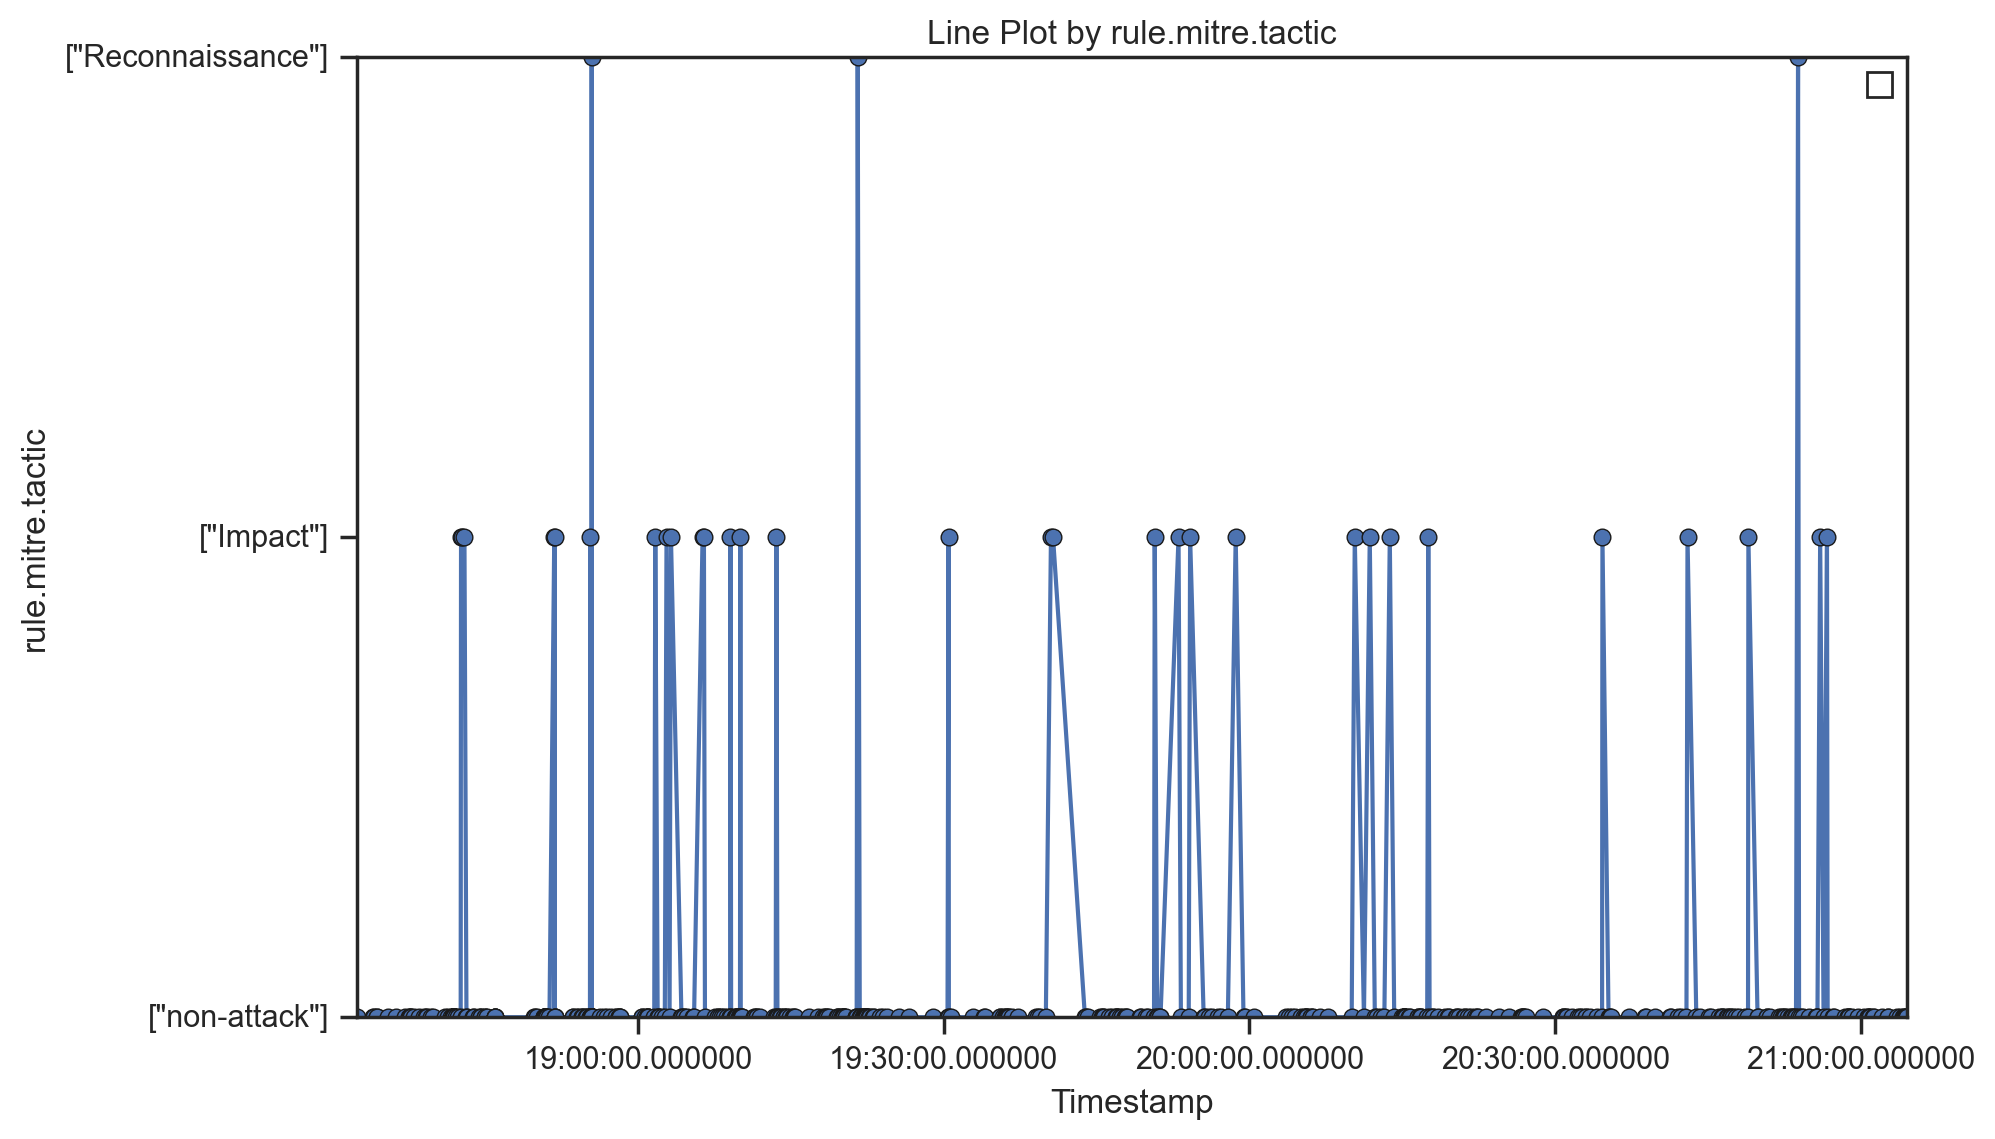

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%b %d, %Y @ %H:%M:%S.%f')
df_copy = df.sort_values(by='timestamp').iloc[500:1000]
# Plotting
plt.figure(figsize=(10, 6))

# Plotting a line plot for "non-attack"
plt.plot(df_copy.dropna(subset='rule.mitre.tactic')['timestamp'], df_copy.dropna(subset='rule.mitre.tactic')['rule.mitre.tactic'],marker='o')

plt.xlabel('Timestamp')
plt.ylabel('rule.mitre.tactic')
plt.title('Line Plot by rule.mitre.tactic')
plt.legend()
plt.show()

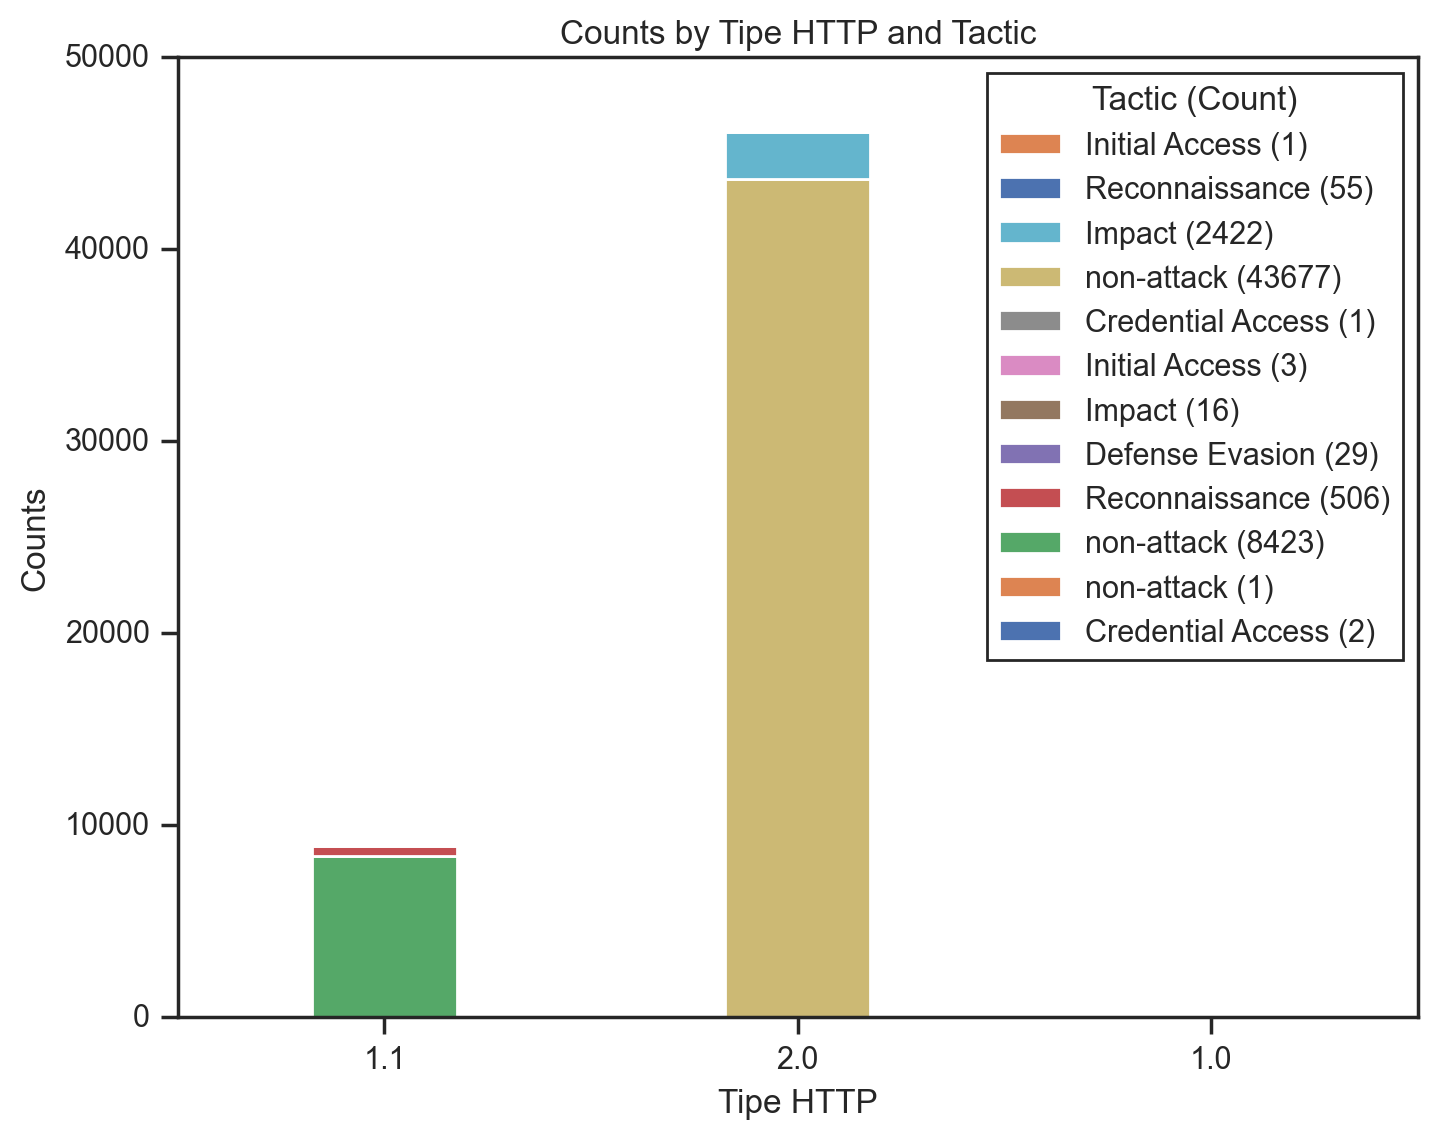

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
tipe_http = ['1.0', '1.0', '1.1', '1.1', '1.1', '1.1', '1.1', '1.1', '2.0', '2.0', '2.0', '2.0']
tactics = ['Credential Access', 'non-attack', 'non-attack', 'Reconnaissance', 'Defense Evasion', 'Impact', 'Initial Access', 'Credential Access',
           'non-attack', 'Impact', 'Reconnaissance', 'Initial Access']
counts = [2, 1, 8423, 506, 29, 16, 3, 1, 43677, 2422, 55, 1]

# Unique tipe_http and tactics for labeling
unique_tipe_http = list(set(tipe_http))
unique_tactics = list(set(tactics))

# Create nested bar chart
fig, ax = plt.subplots()

width = 0.35  # the width of the bars

# For accumulating the starting position of the bars
accumulated = {http: 0 for http in unique_tipe_http}

for tipe, tactic, count in zip(tipe_http, tactics, counts):
    pos = unique_tipe_http.index(tipe)
    ax.bar(pos, count, width, label=f"{tactic} ({count})", bottom=accumulated[tipe])
    accumulated[tipe] += count

# Labeling and other settings
ax.set_xticks(np.arange(len(unique_tipe_http)))
ax.set_xticklabels(unique_tipe_http)
ax.set_xlabel('Tipe HTTP')
ax.set_ylabel('Counts')
ax.set_title('Counts by Tipe HTTP and Tactic')

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Tactic (Count)', loc='upper right')

plt.show()


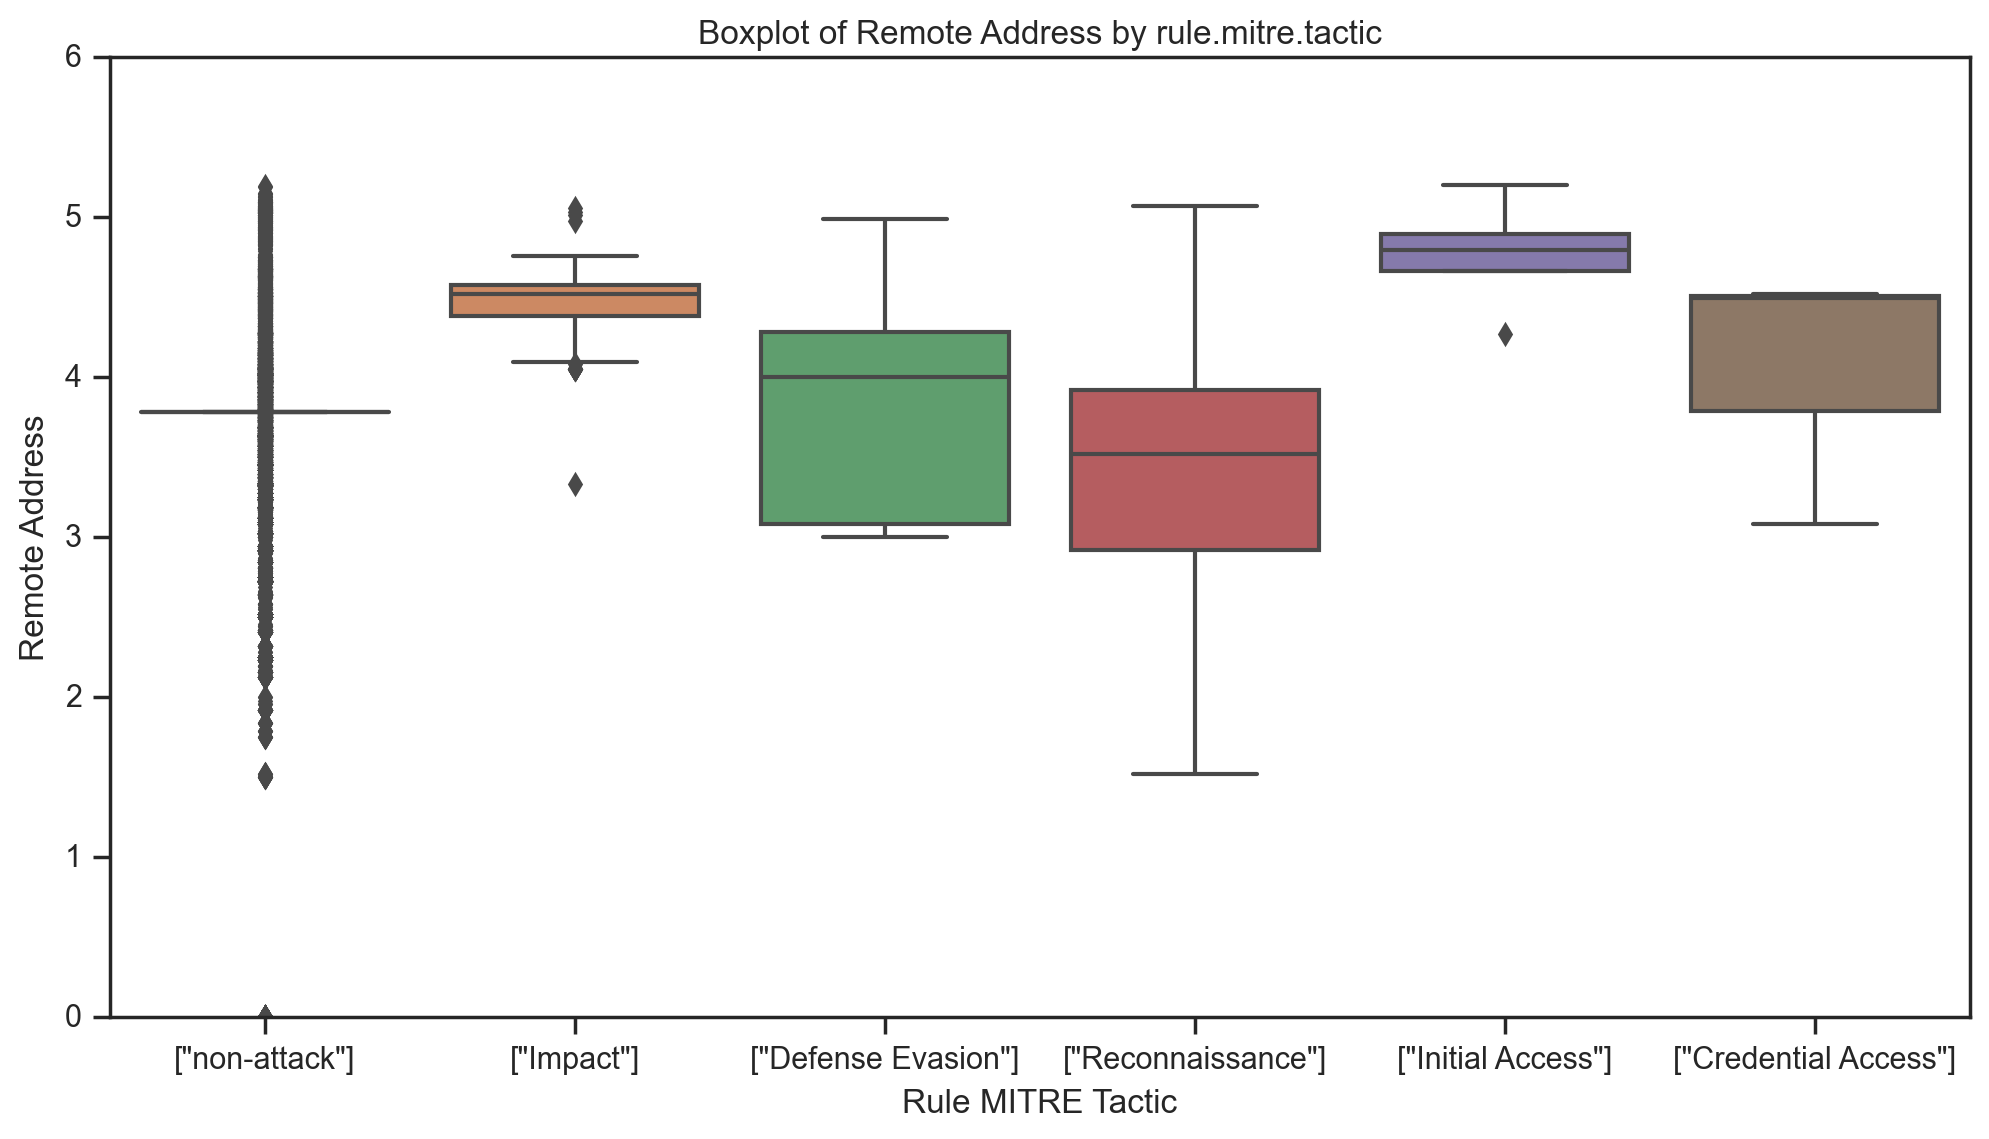

In [ ]:
# sns.boxplot(df_bersih["remote_addr"])
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame df_1

# Calculate the length of each 'request' string and store it in a new column

# Create a boxplot with hue 'rule.mitre.tactic'
plt.figure(figsize=(12, 6))
sns.boxplot(x='rule.mitre.tactic', y="get_entropy", data=df_bersih)
plt.title('Boxplot of Remote Address by rule.mitre.tactic')
plt.xlabel('Rule MITRE Tactic')
plt.ylabel('Remote Address')
plt.show()

In [ ]:
# agent.ip sama hostname cuman 1 value. Http referer 2 sama kyk htttp referer
df = df.drop(['agent.ip', 'hostname', 'http_referer2', 'http_x_forwarded_for',
             'upstream_status','data.srcip', 'body_bytes_sent'], axis=1)
# http_x_forwarded_for ini cuman ada 2 nilai yang gak null, dan setelah
# dianalisis tidak ada hubungan langsung dengan target
# upstream status sama status sama persis

# data.srcip sama kyk remote_address
# body bytes sent sama bytes sent sama

In [ ]:
df[(df['request_method'] == 'POST') & (df['status'] < 400)]['rule.mitre.tactic'].value_counts()

["Impact"]               1784
["Credential Access"]       1
Name: rule.mitre.tactic, dtype: int64

In [ ]:
df.loc[df[(df['request_method'] == 'POST') & (df['status'] < 400)].index.tolist(),"rule.mitre.tactic"] = '["Impact"]'

In [ ]:
df[(df.status==200) & (df.set=='test') & (df['rule.mitre.tactic'].isnull())].index

Int64Index([65688, 66378, 66717], dtype='int64')

In [ ]:
df.head()

,id,timestamp,remote_addr,remote_user,time_local,request,status,http_referer,http_user_agent,time_iso8601,request_method,request_length,bytes_sent,request_time,upstream_connect_time,upstream_header_time,upstream_response_time,upstream_addr,connection,connection_requests,rule.mitre.tactic,set
0,0,"Aug 29, 2023 @ 17:00:03.058",114.4.220.184,-,30/Aug/2023:00:00:02 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,-,Mozilla/5.0 (Linux; Android 11; Redmi Note 8) ...,2023-08-30T00:00:02+07:00,GET,79,330,0.002,0.001,0.002,0.002,10.45.184.148:32442,688306444,2,"[""non-attack""]",train
1,1,"Aug 29, 2023 @ 17:00:33.070",10.200.160.148,-,30/Aug/2023:00:00:31 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,-,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,2023-08-30T00:00:31+07:00,GET,79,330,0.002,0,0.002,0.002,10.45.184.154:32442,688306865,2,"[""non-attack""]",train
2,2,"Aug 29, 2023 @ 17:00:33.072",180.248.46.18,-,30/Aug/2023:00:00:31 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,-,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,2023-08-30T00:00:31+07:00,GET,92,330,0.003,0.001,0.002,0.002,10.45.184.148:32442,688306855,2,"[""non-attack""]",train
3,3,"Aug 29, 2023 @ 17:00:33.076",125.166.3.1,-,30/Aug/2023:00:00:32 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,-,Mozilla/5.0 (Linux; Android 12; M2003J15SC) Ap...,2023-08-30T00:00:32+07:00,GET,81,330,0.002,0,0.002,0.002,10.45.184.154:32442,688306869,2,"[""non-attack""]",train
4,4,"Aug 29, 2023 @ 17:00:59.118",103.108.23.13,-,30/Aug/2023:00:00:58 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,-,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,2023-08-30T00:00:58+07:00,GET,82,330,0.003,0.001,0.003,0.003,10.45.184.154:32442,688307225,2,"[""non-attack""]",train


In [ ]:
df.loc[[65688, 66378, 66717]]

,id,timestamp,remote_addr,remote_user,time_local,request,status,http_referer,http_user_agent,time_iso8601,request_method,request_length,bytes_sent,request_time,upstream_connect_time,upstream_header_time,upstream_response_time,upstream_addr,connection,connection_requests,rule.mitre.tactic,set,angka_http
65688,65689,"Sep 6, 2023 @ 01:17:36.046",192.18.139.147,-,06/Sep/2023:08:17:34 +0700,GET //wp-content/plugins/wpcargo/includes/barc...,200,www.google.com,Mozlila/5.0 (Linux; Android 7.0; SM-G892A Buli...,2023-09-06T08:17:34+07:00,GET,806,1223,0.005,0.000,0.004,0.004,175.45.184.137:80,728872192,1,"[""Credential Access""]",test,1.1
66378,66379,"Sep 6, 2023 @ 01:32:49.176",175.45.184.75,-,06/Sep/2023:08:32:48 +0700,GET /pegawai-service/api/v1/pegawai/search?id_...,200,-,-,2023-09-06T08:32:48+07:00,GET,124,334,0.116,0.000,0.076,0.076,175.45.184.137:32773,728988785,1,"[""Credential Access""]",test,1.0
66717,66718,"Sep 6, 2023 @ 01:40:59.719",175.45.184.75,-,06/Sep/2023:08:40:59 +0700,GET /pegawai-service/api/v1/pegawai/search?id_...,200,-,-,2023-09-06T08:40:59+07:00,GET,122,334,0.116,0.000,0.077,0.077,175.45.184.137:32775,729040907,1,"[""Credential Access""]",test,1.0


In [ ]:
df.loc[df[(df.status==200) & (df.set=='test') & (df['rule.mitre.tactic'].isnull())].index.tolist(),'rule.mitre.tactic'] = '["Credential Access"]'

In [ ]:
# len(df[(df['request_method'] == 'POST') & (df['status'] < 400)].index.tolist())

2438

In [ ]:
# yang POST dan upstream status < 400 itu pasti impact dan bukan
# https://admisi.notrealdomain.com/wp-admin/
# yang https://admisi.notrealdomain.com/wp-admin/ itu credential access
# df_1 = df[(df['request_method'] != 'POST') | (df['status'] >= 400)]

In [ ]:
# df_1 = df_1[df_1.status != 200]
# yang impact dan credential access nya udah dibuang, yg 200 itu fix Initial Access

In [ ]:
df.shape[0] - df_1.shape[0]

1785

In [ ]:
df_1 = df.copy()

In [ ]:
df_1['angka_http'] = df_1['request'].str[-3:].astype(float)

In [ ]:
df_1['request'] = df_1['request'].apply(lambda x: x.split()[1])

In [ ]:
df_bersih.groupby('angka_http')['rule.mitre.tactic'].value_counts()

angka_http  rule.mitre.tactic    
1.0         ["Credential Access"]        2
            ["non-attack"]               1
1.1         ["non-attack"]            8423
            ["Reconnaissance"]         506
            ["Defense Evasion"]         29
            ["Impact"]                  16
            ["Initial Access"]           3
            ["Credential Access"]        1
2.0         ["non-attack"]           43677
            ["Impact"]                2422
            ["Reconnaissance"]          55
            ["Initial Access"]           1
Name: rule.mitre.tactic, dtype: int64

In [ ]:
minlst = []
seclst = []
hrlst = []
yrlst = []
monthlst = []
datelst = []

for item in list(df_1.timestamp):
    spl = item.split(":")
    seclst.append(spl[-1])
    minlst.append(spl[-2])
    spl2 = spl[0].replace(",", "").replace("@", "").split()
    datelst.append(spl2[1])
    yrlst.append(spl2[2])
    hrlst.append(spl2[3])
    monthlst.append(spl2[0])

df_1["minute"] = np.array(minlst).astype(int)
df_1["second"] = np.array(seclst).astype(float)
df_1["hour"] = np.array(hrlst).astype(int)
df_1["month"] = monthlst
df_1["date"] = np.array(datelst).astype(int)

In [ ]:
df_1 = df_1.drop(['timestamp','time_iso8601','time_local'], axis=1)

In [ ]:
!pip install pyquery --q
!pip install ipaddress --q

In [ ]:
from math import log
from re import compile
from urllib.parse import urlparse
from socket import gethostbyname
from pyquery import PyQuery
from requests import get
from json import dump
from string import ascii_lowercase
from numpy import array

In [ ]:
df_1.request.apply(lambda x: urlparse(x)[5]).unique()

array([''], dtype=object)

In [ ]:
df

,id,timestamp,remote_addr,remote_user,time_local,request,status,http_referer,http_user_agent,time_iso8601,request_method,request_length,bytes_sent,request_time,upstream_connect_time,upstream_header_time,upstream_response_time,upstream_addr,connection,connection_requests,rule.mitre.tactic,set
0,0,"Aug 29, 2023 @ 17:00:03.058",114.4.220.184,-,30/Aug/2023:00:00:02 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,-,Mozilla/5.0 (Linux; Android 11; Redmi Note 8) ...,2023-08-30T00:00:02+07:00,GET,79,330,0.002,0.001,0.002,0.002,10.45.184.148:32442,688306444,2,"[""non-attack""]",train
1,1,"Aug 29, 2023 @ 17:00:33.070",10.200.160.148,-,30/Aug/2023:00:00:31 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,-,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,2023-08-30T00:00:31+07:00,GET,79,330,0.002,0,0.002,0.002,10.45.184.154:32442,688306865,2,"[""non-attack""]",train
2,2,"Aug 29, 2023 @ 17:00:33.072",180.248.46.18,-,30/Aug/2023:00:00:31 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,-,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,2023-08-30T00:00:31+07:00,GET,92,330,0.003,0.001,0.002,0.002,10.45.184.148:32442,688306855,2,"[""non-attack""]",train
3,3,"Aug 29, 2023 @ 17:00:33.076",125.166.3.1,-,30/Aug/2023:00:00:32 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,-,Mozilla/5.0 (Linux; Android 12; M2003J15SC) Ap...,2023-08-30T00:00:32+07:00,GET,81,330,0.002,0,0.002,0.002,10.45.184.154:32442,688306869,2,"[""non-attack""]",train
4,4,"Aug 29, 2023 @ 17:00:59.118",103.108.23.13,-,30/Aug/2023:00:00:58 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,-,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,2023-08-30T00:00:58+07:00,GET,82,330,0.003,0.001,0.003,0.003,10.45.184.154:32442,688307225,2,"[""non-attack""]",train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68074,68075,"Sep 6, 2023 @ 02:12:49.915",203.78.117.29,-,06/Sep/2023:09:12:47 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,-,Mozilla/5.0 (Linux; Android 13; SAMSUNG SM-A04...,2023-09-06T09:12:47+07:00,GET,103,330,0.002,0.000,0.001,0.001,10.45.184.148:32442,729254342,2,NaN,test
68075,68076,"Sep 6, 2023 @ 02:12:51.882",125.166.3.60,-,06/Sep/2023:09:12:51 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,-,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,2023-09-06T09:12:51+07:00,GET,88,330,0.001,0.001,0.002,0.002,10.45.184.154:32442,729254818,2,NaN,test
68076,68077,"Sep 6, 2023 @ 02:12:51.888",10.200.16.80,-,06/Sep/2023:09:12:51 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,-,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,2023-09-06T09:12:51+07:00,GET,81,330,0.002,0.000,0.002,0.002,10.45.184.154:32442,729254836,2,NaN,test
68077,68078,"Sep 6, 2023 @ 02:12:53.879",103.127.65.33,-,06/Sep/2023:09:12:52 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,-,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,2023-09-06T09:12:52+07:00,GET,81,330,0.002,0.000,0.002,0.002,10.45.184.148:32442,729254963,2,NaN,test


In [ ]:
urlparse("//vendor/phpunit/phpunit/src/Util/Log/CasperSecurity.php?f=f")

ParseResult(scheme='', netloc='vendor', path='/phpunit/phpunit/src/Util/Log/CasperSecurity.php', params='', query='f=f', fragment='')

In [ ]:
from urllib.parse import urlparse
# df_1['url_parse_1'] = df_1.request.apply(lambda x: urlparse(x)[1])
# df_1['url_parse_2'] = df_1.request.apply(lambda x: urlparse(x)[2])
# df_1['url_parse_4'] = df_1.request.apply(lambda x: urlparse(x)[4])

In [ ]:
df_1['request_length'] = df_1['request'].apply(len)

In [ ]:
df_1['num_encoded_char'] = df_1['request'].apply(lambda x: len([i for i in x if i == '%']))

In [ ]:
def get_entropy(text):
    text = text.lower()
    probs = [text.count(c) / len(text) for c in set(text)]
    entropy = -sum([p * log(p) / log(2.0) for p in probs])
    return entropy
df_1['get_entropy'] = df_1['request'].apply(get_entropy)

In [ ]:
# df_1['../../../'] = df_1.request.str.contains('../../../')
# df['passwd'] = df_1.request.str.contains('passwd')
# df['env.bak'] = df_1.request.str.contains('env.bak')
# df['x1x1'] = df_1.request.str.contains('x1x1')

In [ ]:
import ipaddress
df_1['remote_addr_int']=[int(ipaddress.IPv4Address(i)) for i in df_1.remote_addr.tolist()]

In [ ]:
df_1.to_csv('bersih2.csv', index=False)

In [ ]:
df_1['upstream_connect_time'] = df_1['upstream_connect_time'].replace({'-, -, -':'0', '-':'0', '-, 0.001':0.001, '-, 0.013':0.013,
             '-, 0.002':'0.002', '0.001, 0.001':0.001, '-, 0.000':0, '0.001, 0.000':0.0005,'-, -':0,
                                      }).astype(float)

In [ ]:
df_1['upstream_header_time'] = df_1.upstream_header_time.replace({'-, -, -':'0', '-':'0', '-, 0.001':0.001, '-, 0.013':0.013,
             '-, 0.002':'0.002', '0.001, 0.001':0.001, '-, 0.000':0, '0.001, 0.000':0.0005,
                                '-, 0.046':0.046, '-, -':0,'0.016, 0.017':0.0165,'-, 0.020':0.020,
                                   '-, 0.015':0.015, '-, 0.021':0.021, '-, 0.010':0.010, '-, 0.009':0.009
                                      }).astype(float)

In [ ]:
df_1['upstream_response_time'] = df_1['upstream_response_time'].replace({'-, -, -':'0', '-':'0', '-, 0.001':0.001, '-, 0.013':0.013,
             '-, 0.002':'0.002', '0.001, 0.001':0.001, '-, 0.000':0, '0.001, 0.000':0.0005,
                                '-, 0.046':0.046, '-, -':0,'0.016, 0.017':0.0165, '0.000, 0.001, 0.000':0.00033,
                                        '0.001, 0.000, 0.000':0.00033, '0.001, 0.000, 0.001':0.001,
                                        '0.000, 0.000, 0.001':0.001,'0.001, 0.001, 0.000':0.001,
                                        '0.000, 0.000, 0.000':0,'3.007, 0.002':3.005,'3.007, 0.001':3.004,
                                        '0.029, 0.029':0.029,'3.006, 0.002':3.004, '1.816, 0.001':1.816,
                                        '3.006, 0.001':3.004
                                      }).astype(str).apply(lambda x: x.split(',')[0]).astype(float)

In [ ]:
df_1.to_csv('bersih_akhir.csv',index=False)

In [ ]:
X[]

,timestamp,remote_addr,remote_user,time_local,request,status,http_referer,http_user_agent,time_iso8601,request_method,request_length,bytes_sent,request_time,upstream_connect_time,upstream_header_time,upstream_response_time,upstream_addr,connection,connection_requests,angka_http
0,"Aug 29, 2023 @ 17:00:03.058",114.4.220.184,-,30/Aug/2023:00:00:02 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,-,Mozilla/5.0 (Linux; Android 11; Redmi Note 8) ...,2023-08-30T00:00:02+07:00,GET,79,330,0.002,0.001,0.002,0.002,10.45.184.148:32442,688306444,2,2.0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

LABEL = 'rule.mitre.tactic'
X = df_1[df_1['set']=='train'].drop(['set','id'],axis=1).fillna('')
y = X[LABEL]
X.drop([LABEL], axis=1, inplace=True)

cbc = CatBoostClassifier(cat_features=X.select_dtypes('object').columns.tolist(),
                           random_state=42,verbose=1,
                         class_weights= {'["non-attack"]':1,'["Reconnaissance"]':,
                                         '["Defense Evasion"]':1,'["Impact"]':1,
                                        '["Initial Access"]':1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the Bag of Words training data


cbc.fit(X_train, y_train)
y_pred = cbc.predict(X_test)
print(f1_score(y_test,y_pred,average='micro'))

Learning rate set to 0.095924
0:	learn: 1.2611300	total: 78ms	remaining: 1m 17s
1:	learn: 1.0435588	total: 151ms	remaining: 1m 15s
2:	learn: 0.8872476	total: 199ms	remaining: 1m 6s
3:	learn: 0.7679326	total: 248ms	remaining: 1m 1s
4:	learn: 0.6725335	total: 306ms	remaining: 1m
5:	learn: 0.5946442	total: 373ms	remaining: 1m 1s
6:	learn: 0.5295915	total: 449ms	remaining: 1m 3s
7:	learn: 0.4748334	total: 469ms	remaining: 58.2s
8:	learn: 0.4281684	total: 539ms	remaining: 59.4s
9:	learn: 0.3879253	total: 570ms	remaining: 56.4s
10:	learn: 0.3520923	total: 637ms	remaining: 57.3s
11:	learn: 0.3209663	total: 722ms	remaining: 59.4s
12:	learn: 0.2934676	total: 809ms	remaining: 1m 1s
13:	learn: 0.2702015	total: 829ms	remaining: 58.4s
14:	learn: 0.2490702	total: 870ms	remaining: 57.1s
15:	learn: 0.2299415	total: 945ms	remaining: 58.1s
16:	learn: 0.2131457	total: 1.03s	remaining: 59.4s
17:	learn: 0.1979776	total: 1.11s	remaining: 1m
18:	learn: 0.1843684	total: 1.2s	remaining: 1m 1s
19:	learn: 0.1724

KeyboardInterrupt: 

In [ ]:
cbc = CatBoostClassifier(cat_features=X.select_dtypes('object').columns.tolist(),
                           random_state=42,verbose=1,
                         class_weights= {'["non-attack"]':1,'["Reconnaissance"]':5,
                                         '["Defense Evasion"]':1,'["Impact"]':1,
                                        '["Initial Access"]':1})
cbc.fit(X, y)

Learning rate set to 0.097022
0:	learn: 1.2908056	total: 43.9ms	remaining: 43.8s
1:	learn: 1.0814999	total: 130ms	remaining: 1m 5s
2:	learn: 0.9297345	total: 212ms	remaining: 1m 10s
3:	learn: 0.8131309	total: 273ms	remaining: 1m 8s
4:	learn: 0.7201105	total: 359ms	remaining: 1m 11s
5:	learn: 0.6443830	total: 445ms	remaining: 1m 13s
6:	learn: 0.5808825	total: 515ms	remaining: 1m 13s
7:	learn: 0.5270468	total: 587ms	remaining: 1m 12s
8:	learn: 0.4816133	total: 714ms	remaining: 1m 18s
9:	learn: 0.4437447	total: 792ms	remaining: 1m 18s
10:	learn: 0.4091457	total: 859ms	remaining: 1m 17s
11:	learn: 0.3787872	total: 958ms	remaining: 1m 18s
12:	learn: 0.3541763	total: 1.06s	remaining: 1m 20s
13:	learn: 0.3304808	total: 1.17s	remaining: 1m 22s
14:	learn: 0.3099377	total: 1.24s	remaining: 1m 21s
15:	learn: 0.2925164	total: 1.3s	remaining: 1m 20s
16:	learn: 0.2760690	total: 1.34s	remaining: 1m 17s
17:	learn: 0.2612005	total: 1.43s	remaining: 1m 17s
18:	learn: 0.2480443	total: 1.52s	remaining: 1m

In [ ]:
preds = cbc.predict(df_1[df_1['set']=='test'].drop(['set','id','rule.mitre.tactic'], axis=1).fillna(""))

In [ ]:
# proba = cbc.predict_proba(df_1[df_1['set']=='test'].drop(['set','id','rule.mitre.tactic'], axis=1).fillna(""))

In [ ]:
pd.Series(np.argmax(proba, axis=1)).value_counts()

4    12944
1      653
3        1
0        1
dtype: int64

In [ ]:
cbc.predict_proba

["non-attack"]         12944
["Impact"]               653
["Reconnaissance"]         1
["Defense Evasion"]        1
dtype: int64

In [ ]:
subs = pd.DataFrame({"id":df_1[df_1['set']=='test'].id,
                     "rule.mitre.tactic":preds.flatten()})

In [ ]:
subs['rule.mitre.tactic'].value_counts()

["non-attack"]           12942
["Impact"]                 653
["Credential Access"]        3
["Reconnaissance"]           1
Name: rule.mitre.tactic, dtype: int64

In [ ]:
df_test[(df_test['request_method'] == 'POST') & (df_test['status'] < 400)]['id'].tolist()

[54524,
 54526,
 54535,
 54539,
 54559,
 54594,
 54629,
 54631,
 54633,
 54636,
 54640,
 54647,
 54664,
 54666,
 54671,
 54672,
 54682,
 54732,
 54734,
 54741,
 54788,
 54811,
 54854,
 54871,
 54896,
 54898,
 54927,
 54928,
 54934,
 54939,
 54967,
 55035,
 55039,
 55044,
 55050,
 55082,
 55109,
 55134,
 55138,
 55172,
 55207,
 55213,
 55218,
 55257,
 55280,
 55288,
 55359,
 55406,
 55410,
 55417,
 55449,
 55456,
 55459,
 55490,
 55493,
 55499,
 55576,
 55587,
 55590,
 55591,
 55601,
 55624,
 55625,
 55630,
 55649,
 55654,
 55656,
 55685,
 55688,
 55689,
 55690,
 55692,
 55730,
 55753,
 55759,
 55778,
 55781,
 55803,
 55806,
 55832,
 55838,
 55847,
 55858,
 55882,
 55883,
 55886,
 55933,
 55981,
 55989,
 56001,
 56026,
 56095,
 56102,
 56123,
 56174,
 56189,
 56190,
 56193,
 56219,
 56243,
 56269,
 56307,
 56316,
 56400,
 56423,
 56430,
 56504,
 56523,
 56527,
 56549,
 56553,
 56592,
 56623,
 56651,
 56707,
 56785,
 56819,
 56840,
 56862,
 56865,
 56880,
 56883,
 56898,
 56901,
 56987,


In [ ]:
idx_impact = df_test[(df_test['request_method'] == 'POST') & (df_test['status'] < 400)]['id']-1

In [ ]:
subs.loc[idx_impact.values.tolist(),"rule.mitre.tactic"] = '["Impact"]'

In [ ]:
subs.loc[[65688, 66378, 66717],"rule.mitre.tactic"] = '["Credential Access"]'

In [ ]:
subs.to_csv('baseline 5.csv', index=False)

In [ ]:
urlparse('/auth/resources/ofl9o/login/ub/')

ParseResult(scheme='', netloc='', path='/auth/resources/ofl9o/login/ub/', params='', query='', fragment='')

In [ ]:
df_1.to_csv('bersih.csv', index=False)

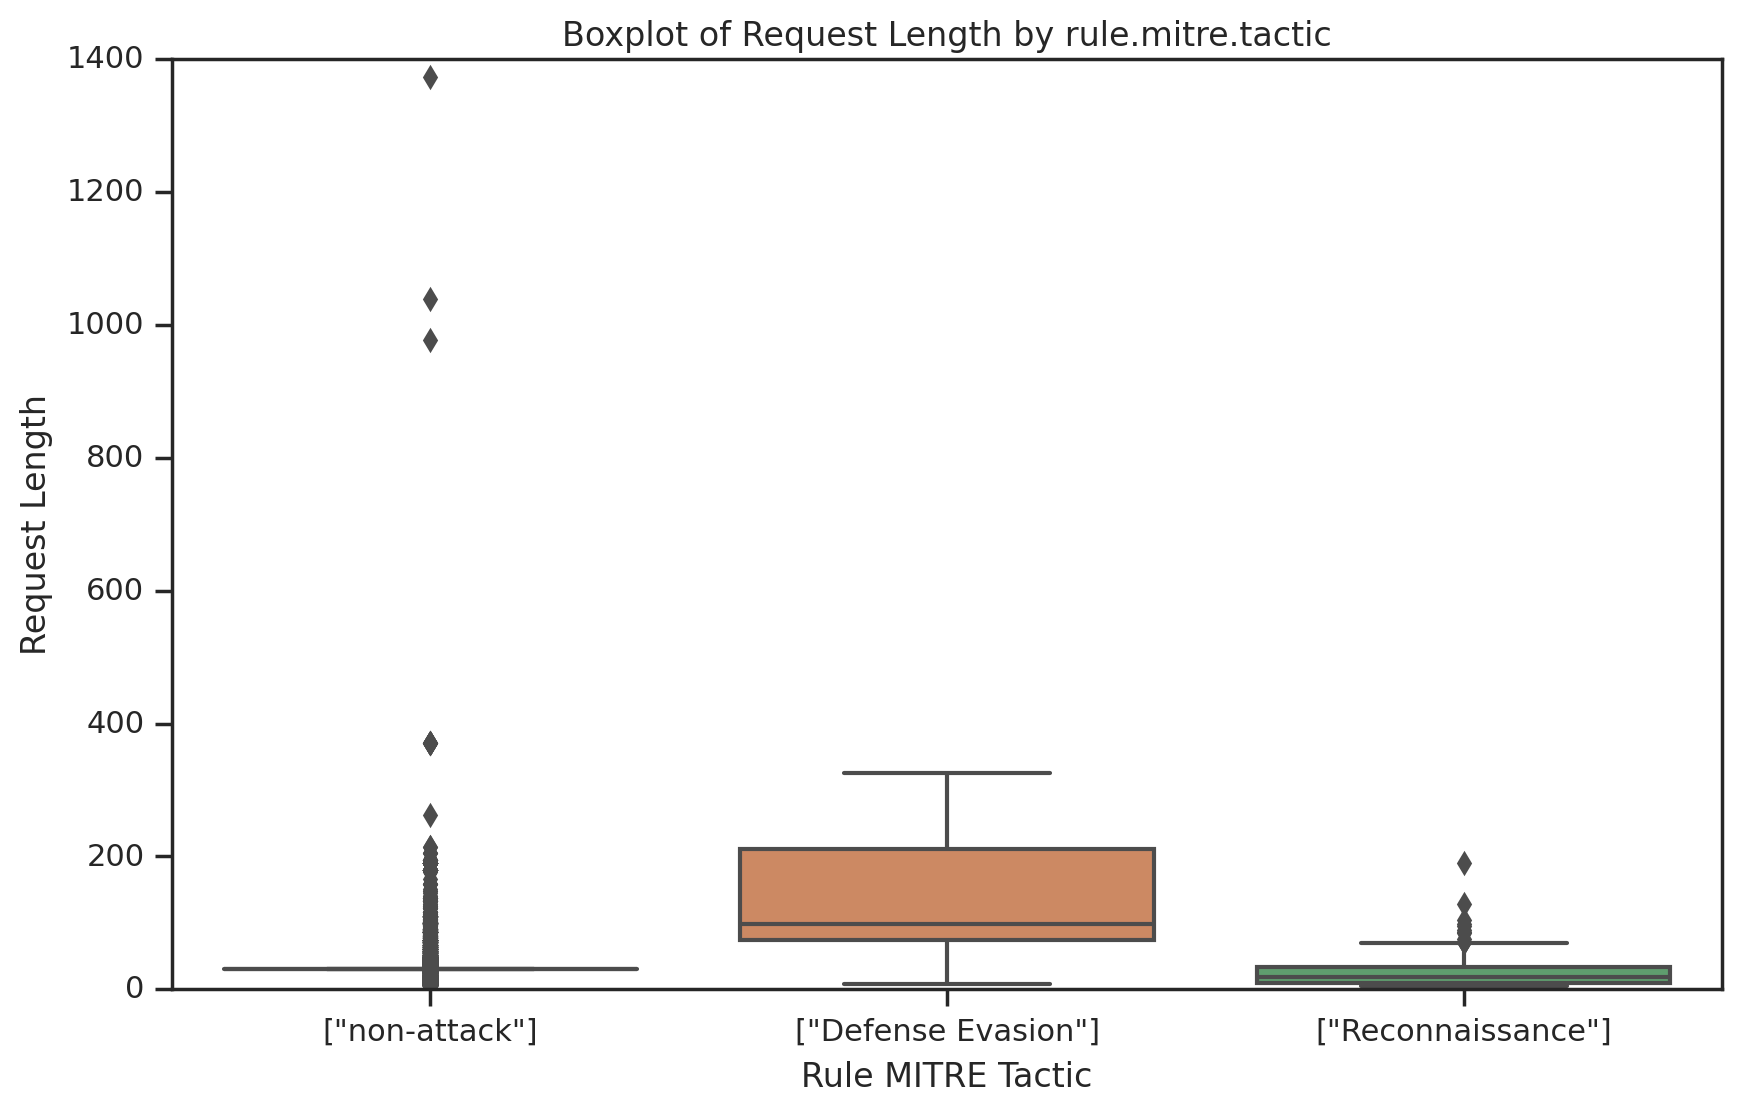

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame df_1

# Calculate the length of each 'request' string and store it in a new column

# Create a boxplot with hue 'rule.mitre.tactic'
plt.figure(figsize=(10, 6))
sns.boxplot(x='rule.mitre.tactic', y='request_length', data=df_bersih)
plt.title('Boxplot of Request Length by rule.mitre.tactic')
plt.xlabel('Rule MITRE Tactic')
plt.ylabel('Request Length')
plt.show()

In [ ]:
df_1['remote_user'].value_counts()

-                      52540
GapuraUb2020-Mobile      141
google-oauth-client       10
Name: remote_user, dtype: int64

In [ ]:
df_1[df_1['request']=='/auth/resources/ofl9o/login/ub/'].sort_values('rule.mitre.tactic').to_csv('a.csv')

In [ ]:
df_1[df_1['request']=='/auth/resources/ofl9o/login/ub/']['rule.mitre.tactic'].value_counts()

["non-attack"]        39773
["Reconnaissance"]       13
Name: rule.mitre.tactic, dtype: int64

In [ ]:
df_1.groupby('remote_user')['rule.mitre.tactic'].value_counts()

remote_user          rule.mitre.tactic  
-                    ["non-attack"]         51950
                     ["Reconnaissance"]       561
                     ["Defense Evasion"]       29
GapuraUb2020-Mobile  ["non-attack"]           141
google-oauth-client  ["non-attack"]            10
Name: rule.mitre.tactic, dtype: int64

In [ ]:
df_1[df_1['rule.mitre.tactic']=='["Reconnaissance"]']['request_time'].value_counts()

0.001    275
0.002     68
0.003     21
0.000     16
0.009     13
        ... 
0.374      1
0.364      1
0.338      1
0.761      1
0.425      1
Name: request_time, Length: 118, dtype: int64

In [ ]:
df_1.groupby('request_method')['rule.mitre.tactic'].value_counts()

request_method  rule.mitre.tactic  
GET             ["non-attack"]         51695
                ["Reconnaissance"]       554
                ["Defense Evasion"]       29
HEAD            ["non-attack"]            16
POST            ["non-attack"]           390
                ["Reconnaissance"]         7
Name: rule.mitre.tactic, dtype: int64

In [ ]:
# df = pd.read_csv("data/train.csv")
# df = df.drop(['agent.ip', 'hostname', 'http_referer2', 'http_x_forwarded_for',
#              'upstream_status'], axis=1)
# df_1 = df[(df['request_method'] != 'POST') | (df['status'] >= 400)]
# df_1 = df_1[df_1.status != 200]
# df_1['angka_http'] = df_1['request'].str[-3:].astype(float)
# df_1['request'] = df_1['request'].apply(lambda x: x.split()[1])

In [ ]:
df_1['rule.mitre.tactic'].value_counts()

["non-attack"]         52101
["Reconnaissance"]       561
["Defense Evasion"]       29
Name: rule.mitre.tactic, dtype: int64

In [ ]:
filtered_df['rule.mitre.tactic'].value_counts()

["non-attack"]         51776
["Reconnaissance"]       561
["Defense Evasion"]       28
Name: rule.mitre.tactic, dtype: int64

In [ ]:
filtered_df = df_1[(df_1['status'] >= 400) & (df_1['status'] <= 499)]
filtered_df.groupby('request')['rule.mitre.tactic'].value_counts().to_csv("b.csv")

In [ ]:
df_1[(df_1['angka_http']>=1) & (df_1['angka_http']<2)].to_csv("b.csv")

In [ ]:
df_1.groupby('request_method')['rule.mitre.tactic'].value_counts().to_csv("b.csv")

In [ ]:
df_1.groupby('status')['rule.mitre.tactic'].value_counts()

status  rule.mitre.tactic  
301     ["Defense Evasion"]        1
400     ["non-attack"]           483
        ["Reconnaissance"]         4
403     ["non-attack"]           142
        ["Reconnaissance"]         9
404     ["non-attack"]         51056
        ["Reconnaissance"]       548
        ["Defense Evasion"]       28
405     ["non-attack"]             2
407     ["non-attack"]            50
413     ["non-attack"]             1
422     ["non-attack"]            42
500     ["non-attack"]           116
502     ["non-attack"]           158
504     ["non-attack"]            51
Name: rule.mitre.tactic, dtype: int64

In [ ]:
df_1.groupby('request')['rule.mitre.tactic'].value_counts().to_csv("b.csv")

In [ ]:
# bikin model untuk kasus 404

In [ ]:
# mau coba 1 vs rest classifier, jadi coba ressoninascance dia 1 , sisanya 0
# liat feature yg paling pengaruh apa

In [ ]:
filtered_df

,id,timestamp,remote_addr,remote_user,time_local,request,status,body_bytes_sent,http_referer,http_user_agent,time_iso8601,request_method,request_length,bytes_sent,request_time,upstream_connect_time,upstream_header_time,upstream_response_time,upstream_addr,upstream_status,connection,connection_requests,data.srcip,rule.mitre.tactic
1033,1033,"Aug 29, 2023 @ 21:10:55.738",195.201.58.10,-,30/Aug/2023:04:10:55 +0700,GET //xmlrpc.php?rsd HTTP/1.1,404,27,-,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-08-30T04:10:55+07:00,GET,338,260,0.180,0,0.001,0.001,175.45.184.15:80,404,688475648,3,195.201.58.10,"[""Reconnaissance""]"
1038,1038,"Aug 29, 2023 @ 21:10:59.768",195.201.58.10,-,30/Aug/2023:04:10:57 +0700,GET //wp-includes/wlwmanifest.xml HTTP/1.1,404,8552,-,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-08-30T04:10:57+07:00,GET,607,8963,0.984,0,0.01,0.01,175.45.185.12:80,404,688475689,2,195.201.58.10,"[""Reconnaissance""]"
1045,1045,"Aug 29, 2023 @ 21:11:03.754",195.201.58.10,-,30/Aug/2023:04:11:02 +0700,GET //wp1/wp-includes/wlwmanifest.xml HTTP/1.1,404,8552,-,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-08-30T04:11:02+07:00,GET,611,8963,0.206,0.001,0.012,0.012,175.45.185.12:80,404,688475689,14,195.201.58.10,"[""Reconnaissance""]"
1052,1052,"Aug 29, 2023 @ 21:10:47.736",195.201.58.10,-,30/Aug/2023:04:10:46 +0700,GET //wp2/wp-includes/wlwmanifest.xml HTTP/1.1,404,281,-,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-08-30T04:10:46+07:00,GET,399,456,0.191,0,0,0,10.45.184.59:8001,404,688475545,16,195.201.58.10,"[""Reconnaissance""]"
1063,1063,"Aug 29, 2023 @ 21:11:27.836",195.201.58.10,-,30/Aug/2023:04:11:27 +0700,GET //sito/wp-includes/wlwmanifest.xml HTTP/1.1,404,3650,-,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-08-30T04:11:27+07:00,GET,351,3851,0.187,0,0.001,0.001,175.45.185.77:80,404,688475885,19,195.201.58.10,"[""Reconnaissance""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52517,52517,"Sep 4, 2023 @ 22:57:06.902",192.18.134.47,-,05/Sep/2023:05:57:06 +0700,GET /wp-content/ALFA_DATA/alfacgiapi/ HTTP/1.1,404,74,-,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,2023-09-05T05:57:06+07:00,GET,274,228,0.001,0.001,0.001,0.001,10.45.184.148:32442,404,721320021,1,192.18.134.47,"[""Reconnaissance""]"
52686,52686,"Sep 4, 2023 @ 22:42:33.928",74.249.255.87,-,05/Sep/2023:05:42:33 +0700,GET //ws.php HTTP/2.0,404,962,http://apps.notrealdomain.com//ws.php,Go-http-client/2.0,2023-09-05T05:42:33+07:00,GET,36,1086,0.004,0,0.003,0.003,175.45.184.47:83,404,721290287,156,74.249.255.87,"[""Reconnaissance""]"
52803,52803,"Sep 4, 2023 @ 22:56:50.868",192.18.134.47,-,05/Sep/2023:05:56:49 +0700,GET /style.php HTTP/1.1,404,74,-,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,2023-09-05T05:56:49+07:00,GET,251,228,0.002,0,0,0,10.45.184.154:32442,404,721319351,1,192.18.134.47,"[""Reconnaissance""]"
52808,52808,"Sep 4, 2023 @ 22:56:18.822",192.18.134.47,-,05/Sep/2023:05:56:17 +0700,GET /404.php HTTP/1.1,404,74,-,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,2023-09-05T05:56:17+07:00,GET,249,228,0.002,0,0.001,0.001,10.45.184.154:32442,404,721318542,1,192.18.134.47,"[""Reconnaissance""]"


In [ ]:
filtered_df = df_1[(df_1['status'] >= 400) & (df_1['status'] <= 499)]
filtered_df.to_csv("a.csv", index=False)

In [ ]:
df_1 = df_1[df_1['http_referer']!='https://admisi.notrealdomain.com/wp-admin/']
#  ini fix ["Credential Access"]

In [ ]:
df_1.groupby('status')['rule.mitre.tactic'].value_counts()

status  rule.mitre.tactic  
200     ["Initial Access"]         4
301     ["Defense Evasion"]        1
400     ["non-attack"]           483
        ["Reconnaissance"]         4
403     ["non-attack"]           142
        ["Reconnaissance"]         9
404     ["non-attack"]         51056
        ["Reconnaissance"]       548
        ["Defense Evasion"]       28
405     ["non-attack"]             2
407     ["non-attack"]            50
413     ["non-attack"]             1
422     ["non-attack"]            42
500     ["non-attack"]           116
502     ["non-attack"]           158
504     ["non-attack"]            51
Name: rule.mitre.tactic, dtype: int64

In [ ]:
df_1[df_1['request_method'] == 'POST'].to_csv("a.csv", index=False)

In [ ]:
df_1.to_csv("a.csv", index=False)

In [ ]:
df[(df['request_method']=='POST') & (df['http_referer'].str.contains('https://vlm2.notrealdomain')) & (df['upstream_status']==200)]['rule.mitre.tactic'].value_counts()

["Impact"]    1307
Name: rule.mitre.tactic, dtype: int64

In [ ]:
df_1[df_1['http_referer']!=df_1['http_referer2']]

,id,timestamp,remote_addr,remote_user,time_local,request,status,body_bytes_sent,http_referer,http_user_agent,http_x_forwarded_for,time_iso8601,request_method,request_length,bytes_sent,http_referer2,request_time,upstream_connect_time,upstream_header_time,upstream_response_time,upstream_addr,upstream_status,connection,connection_requests,data.srcip,rule.mitre.tactic


In [ ]:
df_1.nunique()

id                        53173
timestamp                 52748
remote_addr               18817
remote_user                   3
time_local                39070
request                    4710
status                       14
body_bytes_sent             552
http_referer                604
http_user_agent            2572
http_x_forwarded_for          3
time_iso8601              39070
request_method                3
request_length             1145
bytes_sent                  706
http_referer2               604
request_time                884
upstream_connect_time        54
upstream_header_time        556
upstream_response_time      649
upstream_addr                47
upstream_status              14
connection                45389
connection_requests         327
data.srcip                18817
rule.mitre.tactic             6
dtype: int64

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

# Membaca data dari CSV (ganti dengan nama file yang sesuai)
data = pd.read_csv('nama_file.csv')

# Memilih kolom target
target = 'connection'  # Ganti dengan nama kolom target yang sesuai

# Pisahkan data menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(data[features], data[target], test_size=0.2, stratify=data[target], random_state=42)

# Inisialisasi model CatBoostClassifier
model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, random_seed=42)

# Melatih model
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=100)

# Prediksi dengan model yang telah dilatih
y_pred = model.predict(X_val)

# Menghitung F1-score
f1 = f1_score(y_val, y_pred)

# Menghitung akurasi
accuracy = accuracy_score(y_val, y_pred)

print("F1-score: {:.4f}".format(f1))
print("Akurasi: {:.4f}".format(accuracy))


,rule.mitre.tactic,connection_requests
0,"[""non-attack""]",2
1,"[""non-attack""]",2
2,"[""non-attack""]",2
3,"[""non-attack""]",2
4,"[""non-attack""]",2
...,...,...
54475,"[""non-attack""]",2
54476,"[""non-attack""]",1
54477,"[""non-attack""]",2
54478,"[""non-attack""]",2


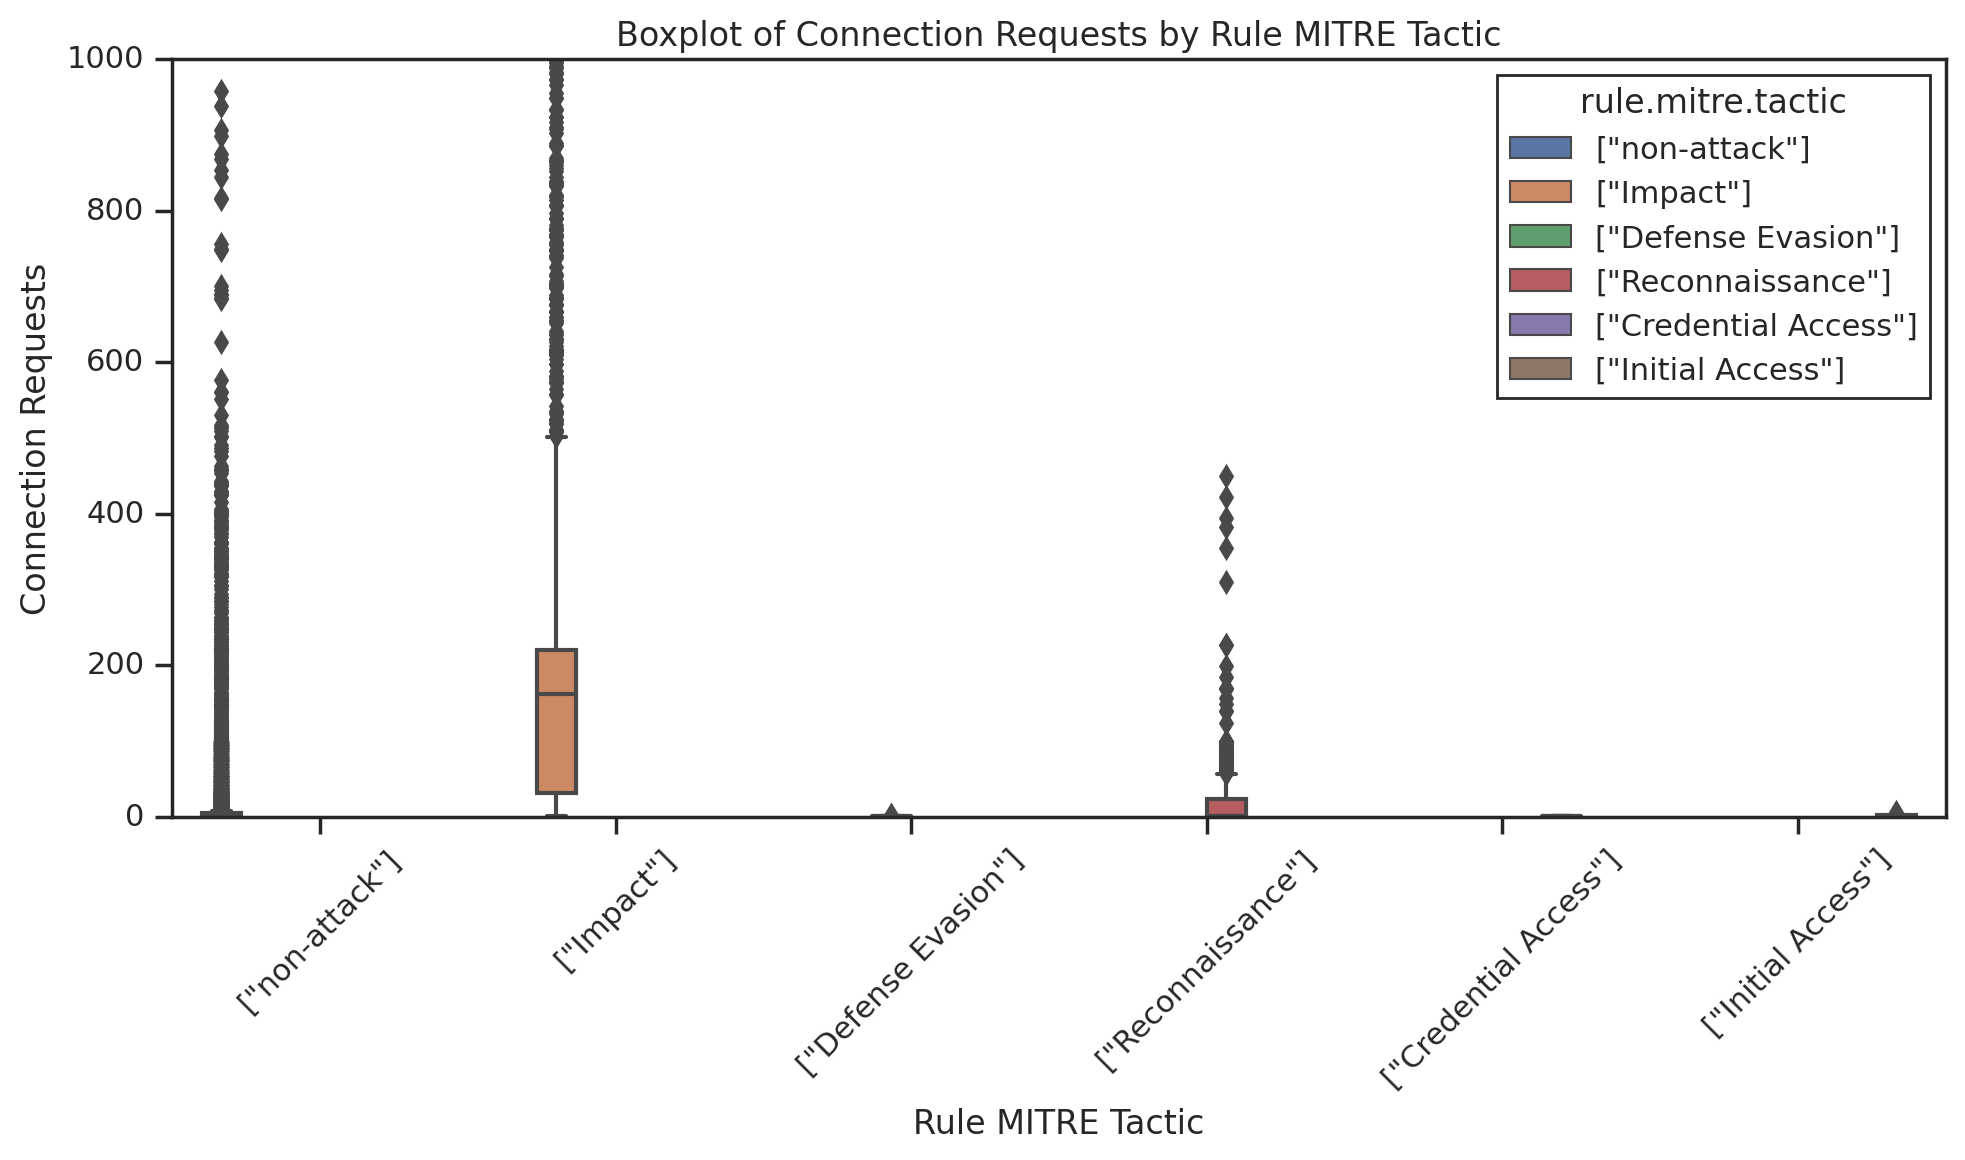

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dataframe df telah diambil sebelumnya

# Buat boxplot dengan Seaborn
plt.figure(figsize=(10, 6))  # Ukuran plot
sns.boxplot(data=df, x='rule.mitre.tactic', y='connection_requests', hue='rule.mitre.tactic')

# Atur label sumbu dan judul
plt.xlabel('Rule MITRE Tactic')
plt.ylabel('Connection Requests')
plt.title('Boxplot of Connection Requests by Rule MITRE Tactic')

# Tampilkan plot
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca jika panjang
plt.tight_layout()  # Agar tidak ada potongan ketika disimpan sebagai gambar
plt.show()


In [ ]:
df.head()

,id,timestamp,remote_addr,remote_user,hostname,time_local,request,status,body_bytes_sent,http_referer,http_user_agent,http_x_forwarded_for,time_iso8601,request_method,request_length,bytes_sent,http_referer2,request_time,upstream_connect_time,upstream_header_time,upstream_response_time,upstream_addr,upstream_status,connection,connection_requests,data.srcip,agent.ip,rule.mitre.tactic
0,0,"Aug 29, 2023 @ 17:00:03.058",114.4.220.184,-,vm-director-nginx,30/Aug/2023:00:00:02 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,118,-,Mozilla/5.0 (Linux; Android 11; Redmi Note 8) ...,-,2023-08-30T00:00:02+07:00,GET,79,330,-,0.002,0.001,0.002,0.002,10.45.184.148:32442,404,688306444,2,114.4.220.184,192.168.1.99,"[""non-attack""]"
1,1,"Aug 29, 2023 @ 17:00:33.070",10.200.160.148,-,vm-director-nginx,30/Aug/2023:00:00:31 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,118,-,Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...,-,2023-08-30T00:00:31+07:00,GET,79,330,-,0.002,0,0.002,0.002,10.45.184.154:32442,404,688306865,2,10.200.160.148,192.168.1.99,"[""non-attack""]"
2,2,"Aug 29, 2023 @ 17:00:33.072",180.248.46.18,-,vm-director-nginx,30/Aug/2023:00:00:31 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,118,-,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,-,2023-08-30T00:00:31+07:00,GET,92,330,-,0.003,0.001,0.002,0.002,10.45.184.148:32442,404,688306855,2,180.248.46.18,192.168.1.99,"[""non-attack""]"
3,3,"Aug 29, 2023 @ 17:00:33.076",125.166.3.1,-,vm-director-nginx,30/Aug/2023:00:00:32 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,118,-,Mozilla/5.0 (Linux; Android 12; M2003J15SC) Ap...,-,2023-08-30T00:00:32+07:00,GET,81,330,-,0.002,0,0.002,0.002,10.45.184.154:32442,404,688306869,2,125.166.3.1,192.168.1.99,"[""non-attack""]"
4,4,"Aug 29, 2023 @ 17:00:59.118",103.108.23.13,-,vm-director-nginx,30/Aug/2023:00:00:58 +0700,GET /auth/resources/ofl9o/login/ub/ HTTP/2.0,404,118,-,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,-,2023-08-30T00:00:58+07:00,GET,82,330,-,0.003,0.001,0.003,0.003,10.45.184.154:32442,404,688307225,2,103.108.23.13,192.168.1.99,"[""non-attack""]"


## Multi output label

In [ ]:
df = pd.read_excel(r"./enterprise-attack-v13.1.xlsx")
df = df.dropna(subset='tactics')
df['tactics'] = df['tactics'].apply(lambda x: x.split(', '))


import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(df['tactics'])
label = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)
df[label.columns.tolist()] = label
display(df.head(2))

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

def clean_text(text):

    # lower text
    text = text.lower()

    # change punctuation to single space
    text_without_punctuation = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text_without_punctuation)

    # remove special character
    pattern = r'[^a-zA-Z0-9\s]'
    cleaned_text = re.sub(pattern, '', text)

    cleaned_text = word_tokenize(cleaned_text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in cleaned_text if word not in stop_words]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a cleaned sentence
    cleaned_text = ' '.join(words)

    return cleaned_text

In [ ]:
df['clean_description'] = df['description'].apply(clean_text)
df['clean_detection'] = df['detection'].fillna("").apply(clean_text)

In [ ]:
from scipy.stats import chi2_contingency

df_label = df.loc[:,"Collection":"Resource Development"]
# Inisialisasi matriks p-value
n = len(df_label.columns)
p_value_matrix = pd.DataFrame(index=df_label.columns, columns=df_label.columns, dtype=float)

# Loop melalui semua pasangan kolom
for col1 in df_label.columns:
    for col2 in df_label.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(df_label[col1], df_label[col2])
            _, p, _, _ = chi2_contingency(contingency_table)
            p_value_matrix.loc[col1, col2] = p

def color_cell(value):
    # print(value)
    if value == '':
      return ''
    elif float(value) < 0.05:
        return 'background-color: #98FB98; color: black'
    elif float(value) >= 0.05:
        return 'background-color: #FFC0CB; color: black'
    else:
        return ''

styled_p_value_matrix = p_value_matrix.round(3).astype(str).replace({'nan':''}).style.applymap(color_cell)
styled_p_value_matrix

In [ ]:
from tqdm import tqdm
list_luar = []
for i,j in tqdm(zip(df[['description','detection']].fillna("").values.tolist(),df.loc[:,"Collection":"Resource Development"].values.tolist())):
  list_dalem = []
  list_dalem.append(tuple(i))
  list_dalem.extend(j)
  list_luar.append(tuple(list_dalem))

In [ ]:
from transformers import AutoTokenizer, TFBertModel

MODEL = "indolem/indobert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# from_pt = True -> karena model asli merupakan PyTorch Model, bukan TF Model
bert_model = TFBertModel.from_pretrained(MODEL, \
                                         from_pt = True)

In [ ]:
DEBUG = True
MAX_LENGTH = 64

documents = [doc for (doc, _, _, _, _, _, _, _, _, _, _, _, _, _, _) in list_luar]
labels_1 = [label for (_, label, _, _, _, _, _, _, _, _, _, _, _, _, _) in list_luar]
labels_2 = [label for (_, _, label, _, _, _, _, _, _, _, _, _, _, _, _) in list_luar]
labels_3 = [label for (_, _, _, label, _, _, _, _, _, _, _, _, _, _, _) in list_luar]
labels_4 = [label for (_, _, _, _, label, _, _, _, _, _, _, _, _, _, _) in list_luar]
labels_5 = [label for (_, _, _, _, _, label, _, _, _, _, _, _, _, _, _) in list_luar]
labels_6 = [label for (_, _, _, _, _, _, label, _, _, _, _, _, _, _, _) in list_luar]
labels_7 = [label for (_, _, _, _, _, _, _, label, _, _, _, _, _, _, _) in list_luar]
labels_8 = [label for (_, _, _, _, _, _, _, _, label, _, _, _, _, _, _) in list_luar]
labels_9 = [label for (_, _, _, _, _, _, _, _, _, label, _, _, _, _, _) in list_luar]
labels_10 = [label for (_, _, _, _, _, _, _, _, _, _, label, _, _, _, _) in list_luar]
labels_11 = [label for (_, _, _, _, _, _, _, _, _, _, _, label, _, _, _) in list_luar]
labels_12 = [label for (_, _, _, _, _, _, _, _, _, _, _, _, label, _, _) in list_luar]
labels_13 = [label for (_, _, _, _, _, _, _, _, _, _, _, _, _, label, _) in list_luar]
labels_14 = [label for (_, _, _, _, _, _, _, _, _, _, _, _, _, _, label) in list_luar]

# lihat https://huggingface.co/transformers/preprocessing.html
# yang kita lakukan kali ini adalah: kita padding ke panjang input maksimal
# yang ditemukan di data
def tokenize(documents, is_tuple = False):
  if not is_tuple:
    return tokenizer(documents, padding='max_length', max_length=MAX_LENGTH, truncation=True)
  return tokenizer(documents[0], documents[1], padding='max_length', max_length=MAX_LENGTH, truncation=True)

encoded_inputs = tokenize(documents)

# ubah ke numpy array
X_train_ids = np.array(encoded_inputs['input_ids'])
X_train_tid = np.array(encoded_inputs['token_type_ids'])
X_train_ams = np.array(encoded_inputs['attention_mask'])
Y_train_1 = np.array(labels_1)
Y_train_2 = np.array(labels_2)
Y_train_3 = np.array(labels_3)
Y_train_4 = np.array(labels_4)
Y_train_5 = np.array(labels_5)
Y_train_6 = np.array(labels_6)
Y_train_7 = np.array(labels_7)
Y_train_8 = np.array(labels_8)
Y_train_9 = np.array(labels_9)
Y_train_10 = np.array(labels_10)
Y_train_11 = np.array(labels_11)
Y_train_12 = np.array(labels_12)
Y_train_13 = np.array(labels_13)
Y_train_14 = np.array(labels_14)

In [ ]:
from sklearn.model_selection import train_test_split

# Split data menjadi data pelatihan (80%) dan data pengujian (20%)
X_train_ids, X_test_ids, X_train_tid, X_test_tid, X_train_ams, X_test_ams, Y_train_1, Y_test_1, Y_train_2, Y_test_2, Y_train_3, Y_test_3, Y_train_4, Y_test_4, Y_train_5, Y_test_5, Y_train_6, Y_test_6, Y_train_7, Y_test_7, Y_train_8, Y_test_8, Y_train_9, Y_test_9, Y_train_10, Y_test_10, Y_train_11, Y_test_11, Y_train_12, Y_test_12, Y_train_13, Y_test_13, Y_train_14, Y_test_14 = train_test_split(
    X_train_ids, X_train_tid, X_train_ams, Y_train_1, Y_train_2, Y_train_3, Y_train_4, Y_train_5, Y_train_6, Y_train_7, Y_train_8, Y_train_9, Y_train_10, Y_train_11, Y_train_12, Y_train_13, Y_train_14,
    test_size=0.2, random_state=42
)

In [ ]:
def binary_output(intermediate, weight_initializer, num):
  return tf.keras.layers.Dense(1,
                      activation = "sigmoid",
                      kernel_initializer = weight_initializer,
                      bias_initializer = 'zeros',
                      name = f'output_{num}')(intermediate)

In [ ]:
import tensorflow as tf

# Devlin et al. (penulis BERT) mengusulkan learning rate
# 3e-4, 1e-4, 5e-5, dan 3e-5 sebagai starting point, untuk Adam optimizer
LEARNING_RATE = 3e-5
RANDOM_STATE = 42

weight_initializer = tf.keras.initializers.GlorotNormal(seed = RANDOM_STATE)

input_ids_layer = tf.keras.layers.Input(shape=(MAX_LENGTH,),
                                        name='input_ids',
                                        dtype='int32')

input_attention_mask = tf.keras.layers.Input(shape=(MAX_LENGTH,),
                                             name='input_attention_mask',
                                             dtype='int32')

input_type_ids = tf.keras.layers.Input(shape=(MAX_LENGTH,),
                                       name='input_type_ids',
                                       dtype='int32')

# ambil hidden state terakhir
#last_hidden_state = bert_model([input_ids_layer, input_attention_mask, input_type_ids]).last_hidden_state
last_hidden_state = bert_model([input_ids_layer, input_attention_mask, input_type_ids]).pooler_output

#cls_last_output = last_hidden_state[:, 0, :]

drop_1_out  = tf.keras.layers.Dropout(0.2)(last_hidden_state)
intermediate = tf.keras.layers.Dense(32,
                                     activation = tf.keras.activations.relu,
                                     kernel_initializer = weight_initializer,
                                     bias_initializer = 'zeros',
                                     name = 'intermediate')(drop_1_out)

output_1 = binary_output(intermediate, weight_initializer, 1)
output_2 = binary_output(intermediate, weight_initializer, 2)
output_3 = binary_output(intermediate, weight_initializer, 3)
output_4 = binary_output(intermediate, weight_initializer, 4)
output_5 = binary_output(intermediate, weight_initializer, 5)
output_6 = binary_output(intermediate, weight_initializer, 6)
output_7 = binary_output(intermediate, weight_initializer, 7)
output_8 = binary_output(intermediate, weight_initializer, 8)
output_9 = binary_output(intermediate, weight_initializer, 9)
output_10 = binary_output(intermediate, weight_initializer, 10)
output_11 = binary_output(intermediate, weight_initializer, 11)
output_12 = binary_output(intermediate, weight_initializer, 12)
output_13 = binary_output(intermediate, weight_initializer, 13)
output_14 = binary_output(intermediate, weight_initializer, 14)

model = tf.keras.Model([input_ids_layer, input_attention_mask, input_type_ids],
 [output_1, output_2, output_3, output_4, output_5, output_6, output_7, output_8, output_9, output_10, output_11, output_12, output_13, output_14])

losses = {
    "output_1": tf.keras.losses.BinaryCrossentropy(),
    "output_2": tf.keras.losses.BinaryCrossentropy(),
    "output_3": tf.keras.losses.BinaryCrossentropy(),
    "output_4": tf.keras.losses.BinaryCrossentropy(),
    "output_5": tf.keras.losses.BinaryCrossentropy(),
    "output_6": tf.keras.losses.BinaryCrossentropy(),
    "output_7": tf.keras.losses.BinaryCrossentropy(),
    "output_8": tf.keras.losses.BinaryCrossentropy(),
    "output_9": tf.keras.losses.BinaryCrossentropy(),
    "output_10": tf.keras.losses.BinaryCrossentropy(),
    "output_11": tf.keras.losses.BinaryCrossentropy(),
    "output_12": tf.keras.losses.BinaryCrossentropy(),
    "output_13": tf.keras.losses.BinaryCrossentropy(),
    "output_14": tf.keras.losses.BinaryCrossentropy()
}

# bobot loss untuk masing-masing output; sementara kita set sama
loss_weights = {
    "output_1": 1.0,
    "output_2": 1.0,
    "output_3": 1.0,
    "output_4": 1.0,
    "output_5": 1.0,
    "output_6": 1.0,
    "output_7": 1.0,
    "output_8": 1.0,
    "output_9": 1.0,
    "output_10": 1.0,
    "output_11": 1.0,
    "output_12": 1.0,
    "output_13": 1.0,
    "output_14": 1.0
}

model.compile(tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
              loss = losses,
              metrics = ["accuracy"])

print(model.summary())

In [ ]:
# buat setiap layer trainable
# termasuk BERT itu sendiri
# kita juga bisa freeze weights di BERT.

# jika ALL = True, maka semuanya trainable
# jika ALL = False, weights pada BERT kita freeze

ALL = True

if not ALL:
  for layer in bert_model.layers:
    layer.trainable = False

print(model.summary())

In [ ]:
BATCH_SIZE = 2
EPOCHS = 10

# Fit the model
# Tinggal tambahkan callback untuk save the best model on Validation data

# sementara, hanya untuk contoh, validation_data saya set ke training data itu sendiri

with tf.device('/device:GPU:0'):
  model.fit(x = [X_train_ids, X_train_tid, X_train_ams],
            y = {
                    "output_1": Y_train_1,
                    "output_2": Y_train_2,
                    "output_3": Y_train_3,
                    "output_4": Y_train_4,
                    "output_5": Y_train_5,
                    "output_6": Y_train_6,
                    "output_7": Y_train_7,
                    "output_8": Y_train_8,
                    "output_9": Y_train_9,
                    "output_10": Y_train_10,
                    "output_11": Y_train_11,
                    "output_12": Y_train_12,
                    "output_13": Y_train_13,
                    "output_14": Y_train_14
                },
            validation_data = ([X_test_ids, X_test_tid, X_test_ams], {
                    "output_1": Y_test_1,
                    "output_2": Y_test_2,
                    "output_3": Y_test_3,
                    "output_4": Y_test_4,
                    "output_5": Y_test_5,
                    "output_6": Y_test_6,
                    "output_7": Y_test_7,
                    "output_8": Y_test_8,
                    "output_9": Y_test_9,
                    "output_10": Y_test_10,
                    "output_11": Y_test_11,
                    "output_12": Y_test_12,
                    "output_13": Y_test_13,
                    "output_14": Y_test_14
                }),
            batch_size = BATCH_SIZE,
            epochs = EPOCHS)

In [ ]:
model.predict([X_test_ids, X_test_tid, X_test_ams])

## Data Preparation

Untuk contoh, kita memakai dataset gemastik tahun lalu

In [ ]:
meta_url = 'https://drive.google.com/uc?export=download&confirm=pbef&id='
id = '1GunhZMQg2UnA4I4bXwC8waWFf7olS7NY'
output_path = 'train.csv'

gdown.download(meta_url+id, output_path)

Downloading...
From: https://drive.google.com/uc?export=download&confirm=pbef&id=1GunhZMQg2UnA4I4bXwC8waWFf7olS7NY
To: /home/admin/train.csv
100% 229M/229M [00:04<00:00, 49.6MB/s] 


'train.csv'

In [ ]:
meta_url = 'https://drive.google.com/uc?export=download&confirm=pbef&id='
id = '1GuspINDSUvXviqkVESQMhWgdLjY-fMFU'
output_path = 'test.csv'

gdown.download(meta_url+id, output_path)

Downloading...
From: https://drive.google.com/uc?export=download&confirm=pbef&id=1GuspINDSUvXviqkVESQMhWgdLjY-fMFU
To: /home/admin/test.csv
100% 98.3M/98.3M [00:04<00:00, 22.6MB/s]


'test.csv'

In [ ]:
df_train = pd.read_csv("./train.csv")
df_train['set'] = 'train'
df_test = pd.read_csv("./test.csv")
df_test['set'] = 'test'

df = pd.concat([df_train, df_test])
display(df.head(2))
display(df.tail(2))

,id,sumber,kodekat,kodesubkat,kategori,subkategori,katakunci,tanggal,judul_berita,konten_berita,nama_tokoh,jabatan,organisasi,lokasi,alias,kutipan,sentimen_kutipan,sentimen_berita,set
0,00e3395ef29,Antara,J,J,Informasi dan Komunikasi,Informasi dan Komunikasi,Laporan keuangan,2021-02-05,ASN penyeleweng dana infak Masjid Raya divonis...,Padang (ANTARA) - Oknum Aparatur Sipil Negara ...,['Rinto'],['Hakim Ketua Yose'],[],"['Padang', 'Sumbar', 'Provinsi Sumbar', 'Inspe...","['dibayar paling lama', '¬©']","['""Menyatakan terdakwa terbukti secara sah dan...",Negatif,Negatif,train
1,019a47ed0bc,Detik,A,A2,"Pertanian, Kehutanan, dan Perikanan",Kehutanan dan Penebangan Kayu,hasil hutan,2021-01-19,10 Alasan MK Kategorikan Ganja Hidroponik seba...,Jakarta -\n\nMahkamah Konstitusi (MK) memasukk...,"['Dengler', 'Recommended Methods For', 'I']",[],"['Mahkamah Konstitusi (MK)', 'MK', 'KBBI: poho...","['Jakarta', 'Yogyakarta', 'Manual', '>>']",[],[],Netral,Negatif,train


,id,sumber,kodekat,kodesubkat,kategori,subkategori,katakunci,tanggal,judul_berita,konten_berita,nama_tokoh,jabatan,organisasi,lokasi,alias,kutipan,sentimen_kutipan,sentimen_berita,set
22663,fffb5bfd7d5,Antara,K,K1,Jasa Perantara Keuangan dan Asuransi,Jasa Perantara Keuangan,kredit,2021-06-16,Legislator: Perbankan berperan penting dukung ...,"Di samping itu, perbankan menjadi tulang pungg...","['Dito Ganinduto', 'Dito', 'Ahmad Buchori']",['Ketua Komisi XI DPR RI'],"['DPR', 'OJK', 'Pemda Jabar- DKI']",['Jakarta'],[],"['‚ÄúDi samping itu, perbankan menjadi tulang ...",Positif,NaN,test
22664,fffe2ad3afd,Okezone,K,K1,Jasa Perantara Keuangan dan Asuransi,Jasa Perantara Keuangan,kredit,2021-03-30,Pengusaha Mikro Bakal Dapat BLT dan Kredit Mac...,JAKARTA - Provinsi Bali merupakan satu-satunya...,[],['Wakil Menteri BUMN II'],"['Bank Indonesia', '*', 'BLT', 'UNTUK ANDA']","['Provinsi Bali', 'Bali']",['wisatawan mancanegara'],"['mengatakan, pihaknya kini sedang pertimbangk...",Positif,NaN,test


In [ ]:
LABEL = 'sentimen_berita'

In [ ]:
# Masukkin ke chatGPT
df.sample(100).to_csv('sample_df.csv', index=False)

### Simple Processing (disesuaikan dengan data)

Gunakan simple intuisi untuk proses kolom

Kodekat dan kodesubkat sama valuenya dengan kategori dan subkategori

In [ ]:
print(np.sort(df['kodekat'].unique()))
df[['kodekat','kodesubkat','kategori','subkategori']].nunique()

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M, N' 'P' 'Q' 'R' 'S']


kodekat        17
kodesubkat     51
kategori       17
subkategori    51
dtype: int64

In [ ]:
df.drop(['kodekat','kodesubkat'], inplace=True, axis=1)

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

sentimen_berita    22665
dtype: int64

In [ ]:
# Konversi kolom 'tanggal' ke dalam format datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

# Buat kolom 'hari', 'bulan', dan 'tahun'
df['hari'] = df['tanggal'].dt.day
df['bulan'] = df['tanggal'].dt.month
df['tahun'] = df['tanggal'].dt.year

In [ ]:
df.drop('tahun', axis=1, inplace=True)
df.drop('tanggal', axis=1, inplace=True)
# karena cuman tahun 2021

In [ ]:
df['katakunci'].unique()[:10]

array(['laporan keuangan', 'hasil hutan', 'listrik pln',
       'jumlah penonton', 'banjir', 'konsumsi gas', 'teknologi',
       'harga emas', 'penerbitan', 'proyek pembangunan'], dtype=object)

In [ ]:
df['katakunci'] = df['katakunci'].str.lower()

In [ ]:
df.nunique()

id                  75554
sumber                  3
kategori               17
subkategori            51
katakunci             368
tanggal               181
judul_berita        55871
konten_berita       56095
nama_tokoh          40570
jabatan             32047
organisasi          35358
lokasi              33802
alias                8377
kutipan             49584
sentimen_kutipan        3
sentimen_berita         3
set                     2
hari                   31
bulan                   6
dtype: int64

## Baseline Model

### Pycaret

In [ ]:
from pycaret import classification
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

s = classification.setup(df[df['set']=='train'].drop(['set','id'],axis=1).sample(5000), target='sentimen_berita', fold=3, use_gpu=True)

model = classification.compare_models()

### CatBoost

In [ ]:
df[df['set']=='train'].shape

(52889, 18)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

X = df[df['set']=='train'].drop(['set','id'],axis=1)
y = X[LABEL].replace({'Negatif':0, 'Netral':1, 'Positif':2})
X.drop(LABEL, axis=1, inplace=True)

# Initialize CatBoostClassifier
model = CatBoostClassifier(cat_features=X.select_dtypes('object').columns.tolist(),
                           random_state=42, verbose=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the Bag of Words training data
model.fit(X_train, y_train)

# Predict on the Bag of Words test data
y_pred = model.predict(X_test)

print('1m -- 40K data')
# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.4f}")

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

1m -- 40K data
F1 Score: 0.7097
Accuracy Score: 0.7473


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

X = df[df['set']=='train'].drop(['set','id'],axis=1)
y = X[LABEL].replace({'Negatif':0, 'Netral':1, 'Positif':2})
X.drop(LABEL, axis=1, inplace=True)

text_feat = ['konten_berita','judul_berita']
# Initialize CatBoostClassifier
model = CatBoostClassifier(cat_features=X.select_dtypes('object').columns.drop(text_feat).tolist(),
                           text_features = text_feat,
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the Bag of Words training data
model.fit(X_train, y_train)

# Predict on the Bag of Words test data
y_pred = model.predict(X_test)

print('4m -- 40K data')
# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.4f}")

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

4m -- 40K data
F1 Score: 0.7524
Accuracy Score: 0.7840


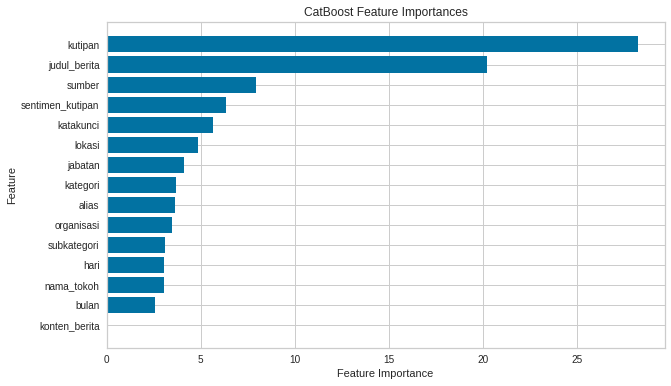

In [ ]:
from catboost import Pool
pool_data = Pool(data=X_train, label=y_train,
                  cat_features=X_train.select_dtypes('object').columns.tolist())
                  # text_features=text_feat)

feature_importances = model.get_feature_importance(data=pool_data)
feature_names = X_train.columns
df_impo = pd.DataFrame({'feat':feature_names,'impo':feature_importances})
df_impo = df_impo.sort_values(by='impo')

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), df_impo['impo'], align='center')
plt.yticks(range(len(feature_names)), df_impo['feat'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importances')
plt.show()

In [ ]:
preds = model.predict(df[df['set']=='test'].drop(['set','id'],axis=1))
subs = pd.DataFrame({"id":df[df['set']=='test']['id'].values, "sentimen_berita":preds.flatten()})
subs['sentimen_berita'] = subs['sentimen_berita'].replace({0:'Negatif', 1:'Netral', 2:'Positif'})
subs.to_csv('test_baseline.csv', index=False)

from tqdm import tqdm## Data Processing

In [ ]:
from tqdm import tqdm
tqdm.pandas()

### Ubah List Feature jadi Teks

In [ ]:
df.head(2)

,id,sumber,kategori,subkategori,katakunci,judul_berita,konten_berita,nama_tokoh,jabatan,organisasi,lokasi,alias,kutipan,sentimen_kutipan,sentimen_berita,set,hari,bulan
0,00e3395ef29,Antara,Informasi dan Komunikasi,Informasi dan Komunikasi,laporan keuangan,ASN penyeleweng dana infak Masjid Raya divonis...,Padang (ANTARA) - Oknum Aparatur Sipil Negara ...,['Rinto'],['Hakim Ketua Yose'],[],"['Padang', 'Sumbar', 'Provinsi Sumbar', 'Inspe...","['dibayar paling lama', '¬©']","['""Menyatakan terdakwa terbukti secara sah dan...",Negatif,Negatif,train,5,2
1,019a47ed0bc,Detik,"Pertanian, Kehutanan, dan Perikanan",Kehutanan dan Penebangan Kayu,hasil hutan,10 Alasan MK Kategorikan Ganja Hidroponik seba...,Jakarta -\n\nMahkamah Konstitusi (MK) memasukk...,"['Dengler', 'Recommended Methods For', 'I']",[],"['Mahkamah Konstitusi (MK)', 'MK', 'KBBI: poho...","['Jakarta', 'Yogyakarta', 'Manual', '>>']",[],[],Netral,Negatif,train,19,1


In [ ]:
df_1 = df.copy()

In [ ]:
for col in ["nama_tokoh","jabatan","organisasi","lokasi","alias","kutipan"]:
    df_1[col] = df_1[col].progress_apply(eval)  # Mengubah string menjadi list

100% 75554/75554 [00:01<00:00, 71487.52it/s]
100% 75554/75554 [00:00<00:00, 92215.96it/s]
100% 75554/75554 [00:00<00:00, 79132.53it/s]
100% 75554/75554 [00:01<00:00, 46192.46it/s]
100% 75554/75554 [00:00<00:00, 108351.78it/s]
100% 75554/75554 [00:01<00:00, 43683.92it/s]


In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words("indonesian"))

def merge_clean_list(text_lists):

    final_text = []
    for phrase in text_lists:

        phrase = phrase.lower()
        phrase_without_punctuation = re.sub(r'[^\w\s]', ' ', phrase)
        phrase = re.sub(r'\s+', ' ', phrase_without_punctuation)

        pattern = r'[^a-zA-Z0-9\s]'
        cleaned_phrase = re.sub(pattern, '', phrase)

        tokens = word_tokenize(cleaned_phrase)
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        cleaned_phrase = '-'.join(filtered_tokens)
        final_text.append(cleaned_phrase)

    return ' '.join(final_text)

[nltk_data] Downloading package stopwords to /home/admin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/admin/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df_1['nama_tokoh'] = df_1['nama_tokoh'].progress_apply(merge_clean_list)
df_1['jabatan'] = df_1['jabatan'].progress_apply(merge_clean_list)
df_1['organisasi'] = df_1['organisasi'].progress_apply(merge_clean_list)
df_1['lokasi'] = df_1['lokasi'].progress_apply(merge_clean_list)
df_1['alias'] = df_1['alias'].progress_apply(merge_clean_list)

100% 75554/75554 [00:21<00:00, 3558.37it/s]
100% 75554/75554 [00:13<00:00, 5651.20it/s]
100% 75554/75554 [00:19<00:00, 3940.90it/s]
100% 75554/75554 [00:27<00:00, 2771.56it/s]
100% 75554/75554 [00:04<00:00, 17004.18it/s]


In [ ]:
# One encode dari kolom yang memiliki "," serta "dan"

# for ko in ['kategori', 'subkategori']:
#     df_1[ko] = df_1[ko].str.split('[,]| dan ')

    # one_hot_df = df_1[ko].str.join('|').str.get_dummies()
    # for col in one_hot_df:
    #     df_1[ko + '_' + col] = one_hot_df[col]

# df_1['kategori'] = df_1['kategori'].apply(merge_clean_list)
# df_1['subkategori'] = df_1['subkategori'].apply(merge_clean_list)

In [ ]:
df_1['kutipan'] = df_1['kutipan'].apply(lambda x: ' '.join(x).replace(r'"',""))

In [ ]:
for i in ['nama_tokoh', 'jabatan', 'organisasi', 'lokasi', 'alias', 'kategori', 'subkategori']:
    merged_text = ' '.join(df[i])
    unique_values = set(merged_text.split())
    unique_count = len(unique_values)
    print(i, unique_count)

nama_tokoh 51369
jabatan 35494
organisasi 41430
lokasi 18270
alias 6303
kategori 50
subkategori 132


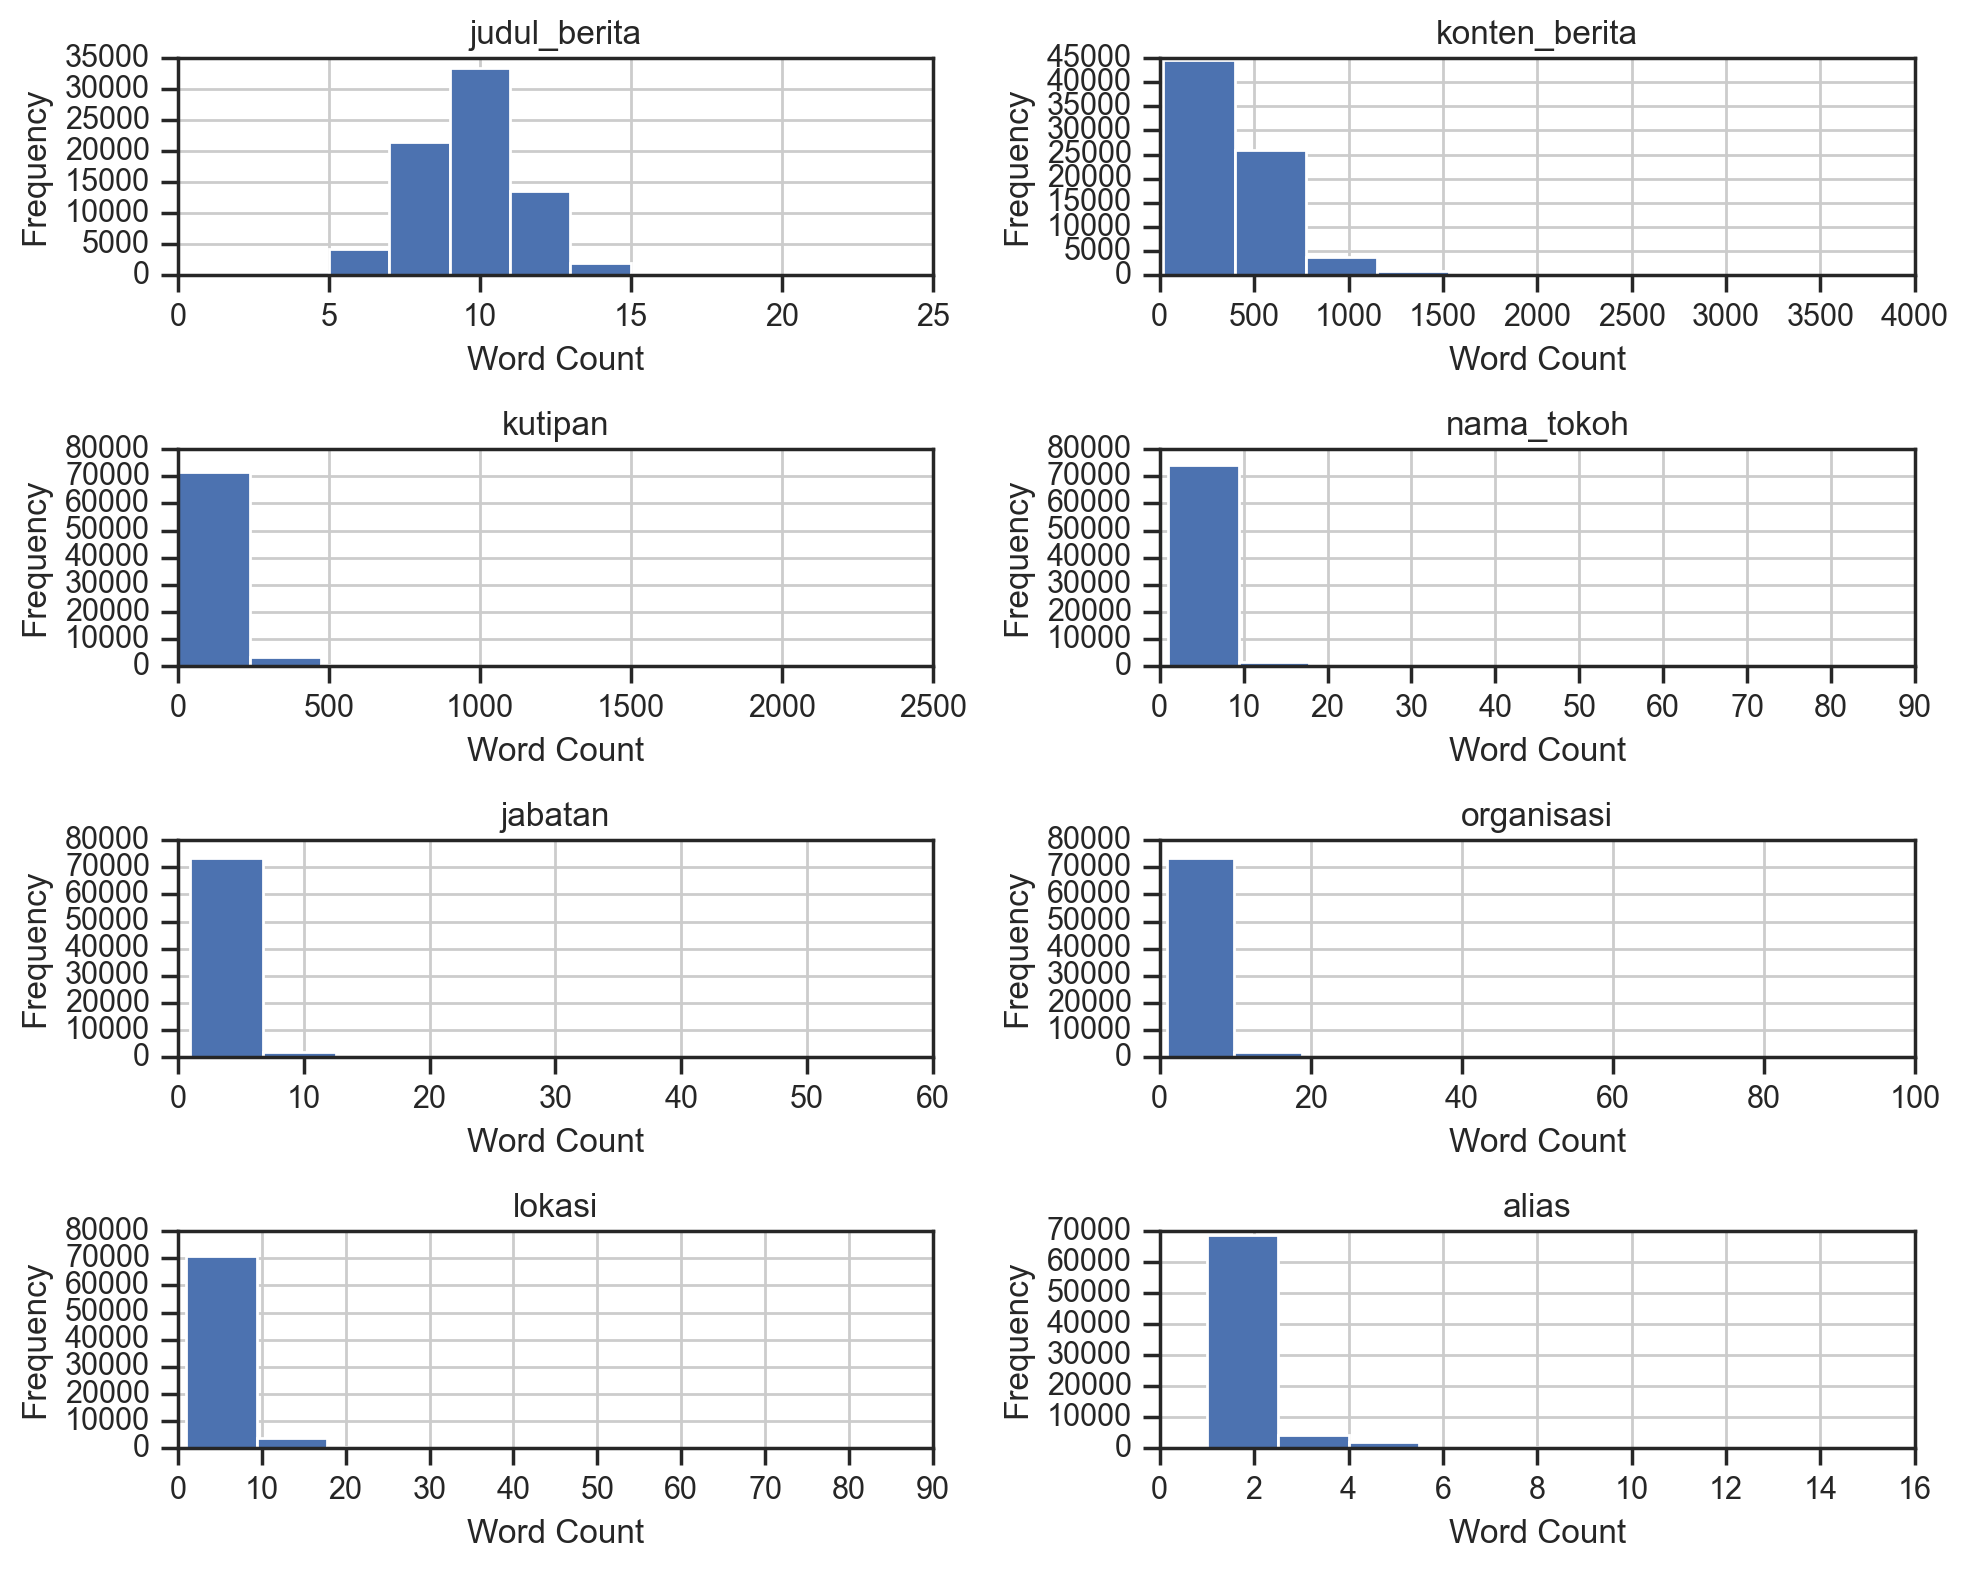

In [ ]:
import math

# List of columns you want to plot
col_lists = ['judul_berita', 'konten_berita', 'kutipan', 'nama_tokoh', 'jabatan', 'organisasi', 'lokasi', 'alias']

# Calculate the number of subplots
num_plots = len(col_lists)
num_rows = math.ceil(num_plots / 2)
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows*2))

# Flatten the axes array for easier iteration
axes = axes.ravel()

# Iterate through the columns and create histograms
for i, col in enumerate(col_lists):
    ax = axes[i]
    df_1[col].apply(lambda x: len(x.split(' '))).hist(ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Word Count')
    ax.set_ylabel('Frequency')

# If there are empty subplots, remove them
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i])

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

X = df_1[df_1['set']=='train'].drop(['set','id'],axis=1)
y = X[LABEL].replace({'Negatif':0, 'Netral':1, 'Positif':2})
X.drop(LABEL, axis=1, inplace=True)

# Initialize CatBoostClassifier
model = CatBoostClassifier(cat_features=X.select_dtypes('object').columns.tolist(),
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the Bag of Words training data
model.fit(X_train, y_train)

# Predict on the Bag of Words test data
y_pred = model.predict(X_test)

print('1m -- 20K data')
# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.4f}")

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

1m 56s -- 20K data
F1 Score: 0.7095
Accuracy Score: 0.7496


In [ ]:
preds = model.predict(df_1[df_1['set']=='test'].drop(['set','id'],axis=1))
subs = pd.DataFrame({"id":df_1[df_1['set']=='test']['id'].values, "sentimen_berita":preds.flatten()})
subs['sentimen_berita'] = subs['sentimen_berita'].replace({0:'Negatif', 1:'Netral', 2:'Positif'})
subs.to_csv('test_baseline 2.csv', index=False)

In [ ]:
# Sampling ke 20k/10k aja kalo bisa

### Reduksi Parse Feature dengan Dimension Reduction TF-IDF

In [ ]:
!pip install umap --q

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import umap
from sklearn.decomposition import PCA

# Digunakan untuk mengurangi kolom yang 1 nya sedikit dan 0 nya banyak (kasus ini mengurangi sebanyak 25%)
def reduce_small_tf(df, col, val=50):
    df_col = df[df.columns[df.columns.str.startswith(f"{col}")].tolist()]
    df_col_mean = df_col.mean().sort_values(ascending=False)
    thresh_col = np.percentile(df_col_mean, val)
    # thresh_col = val
    col_drop = df_col_mean[df_col_mean < thresh_col].index.tolist()
    df.drop(col_drop, axis=1, inplace=True)

def reduction_tfidf(df, col):
    vectorizer = TfidfVectorizer(min_df = 10, max_df = .6, ngram_range=(1, 2))
    tfidf = vectorizer.fit_transform(df[col])
    feature_names = vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(data=tfidf.toarray(), columns= col + "_" + feature_names)
    num_component = 100
    if tfidf_df.shape[1] > num_component:
        # embedding_tfidf_narasi = umap.umap_.UMAP(n_components=num_component, metric='hellinger', verbose=1).fit_transform(tfidf_df)
        embedding_tfidf_narasi = PCA(n_components=num_component).fit_transform(tfidf_df)
        tfidf_df = pd.DataFrame(embedding_tfidf_narasi, columns=[f"{col}_{i}" for i in range(num_component)])
    else:
        reduce_small_tf(tfidf_df, f'{col}_')
    return tfidf_df

tfidf_nama_tokoh = reduction_tfidf(df_1, 'nama_tokoh')
print('1 done')
tfidf_jabatan = reduction_tfidf(df_1, 'jabatan')
print('2 done')
tfidf_organisasi = reduction_tfidf(df_1, 'organisasi')
print('3 done')
tfidf_lokasi = reduction_tfidf(df_1, 'lokasi')
print('4 done')
tfidf_alias = reduction_tfidf(df_1, 'alias')
print('5 done')

In [ ]:
df_11 = df_1.copy()
df_11.drop(['nama_tokoh','jabatan','organisasi','lokasi','alias'], axis=1, inplace=True)
df_11 = pd.concat([df_11.reset_index(drop=True), tfidf_nama_tokoh, tfidf_jabatan, tfidf_organisasi, tfidf_lokasi, tfidf_alias], axis=1)

In [ ]:
df_11.shape

(75554, 513)

In [ ]:
import torch

# Check if CUDA (NVIDIA GPU support) is available
if torch.cuda.is_available():
    # Get the number of available GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Found {num_gpus} GPU(s):")
    for i in range(num_gpus):
        gpu_name = torch.cuda.get_device_name(i)
        print(f"GPU {i}: {gpu_name}")
else:
    print("No GPU found.")

Found 1 GPU(s):
GPU 0: NVIDIA A100-SXM4-80GB MIG 1g.10gb


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

X = df_11[df_11['set']=='train'].drop(['set','id'],axis=1).sample(10000)
y = X[LABEL].replace({'Negatif':0, 'Netral':1, 'Positif':2})
X.drop(LABEL, axis=1, inplace=True)

# Initialize CatBoostClassifier
model = CatBoostClassifier(cat_features=X.select_dtypes('object').columns.tolist(),
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the Bag of Words training data
model.fit(X_train, y_train)

# Predict on the Bag of Words test data
y_pred = model.predict(X_test)

print('4m -- 10K data')
# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.4f}")

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

4m -- 10K data
F1 Score: 0.6041
Accuracy Score: 0.6665


### Reduksi Parse Feature dengan Feature Importances and TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier


def filter_feat_impo(df, col, val=50):
    vectorizer = TfidfVectorizer(min_df = 10, max_df = .6, ngram_range=(1, 2))
    tfidf = vectorizer.fit_transform(df[col])
    feature_names = vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(data=tfidf.toarray(), columns= col + "_" + feature_names)

    df = pd.concat([tfidf_df, df.drop([col], axis=1).reset_index(drop=True)], axis=1)
    df_sample = df.dropna(subset=LABEL).sample(2500)
    X = df_sample.drop([LABEL,'set','id'], axis=1)
    y = df_sample[LABEL].replace({'Negatif':0, 'Netral':1, 'Positif':2})
    print(X.shape)

    # Initialize CatBoostClassifier
    model = CatBoostClassifier(cat_features=X.select_dtypes('object').columns.tolist(),
                            random_state=42, verbose=0)

    model.fit(X, y)
    feature_importances = model.get_feature_importance()
    feature_names = X.columns
    df_impo = pd.DataFrame({'feat':feature_names,'impo':feature_importances})
    df_impo = df_impo.sort_values(by='impo')

    if df_impo.shape[0] < 100:
        high_impo_threshold = np.percentile(df_impo['impo'],val)
        high_impo_features = df_impo[df_impo['impo'] >= high_impo_threshold]
        high_impo_features = high_impo_features[high_impo_features['feat'].str.startswith(col+'_')]
    else:
        high_impo_features = df_impo[df_impo['feat'].str.startswith(col+'_')]
        high_impo_features = high_impo_features.nlargest(100, 'impo')

    return tfidf_df[high_impo_features['feat'].values.tolist()]

In [ ]:
df_1.head(2)

,id,sumber,kategori,subkategori,katakunci,judul_berita,konten_berita,nama_tokoh,jabatan,organisasi,lokasi,alias,kutipan,sentimen_kutipan,sentimen_berita,set,hari,bulan
0,00e3395ef29,Antara,Informasi dan Komunikasi,Informasi dan Komunikasi,laporan keuangan,ASN penyeleweng dana infak Masjid Raya divonis...,Padang (ANTARA) - Oknum Aparatur Sipil Negara ...,rinto,hakim-ketua-yose,,padang sumbar provinsi-sumbar inspektorat-sumb...,dibayar,Menyatakan terdakwa terbukti secara sah dan me...,Negatif,Negatif,train,5,2
1,019a47ed0bc,Detik,"Pertanian, Kehutanan, dan Perikanan",Kehutanan dan Penebangan Kayu,hasil hutan,10 Alasan MK Kategorikan Ganja Hidroponik seba...,Jakarta -\n\nMahkamah Konstitusi (MK) memasukk...,dengler recommended-methods-for i,,mahkamah-konstitusi-mk mk kbbi-pohonpo-hon-n-1...,jakarta yogyakarta manual,,,Netral,Negatif,train,19,1


In [ ]:
impo_nama_tokoh = filter_feat_impo(df_1, 'nama_tokoh')
print('1 done')
impo_jabatan = filter_feat_impo(df_1, 'jabatan')
print('2 done')
impo_organisasi = filter_feat_impo(df_1, 'organisasi')
print('3 done')
impo_lokasi = filter_feat_impo(df_1, 'lokasi')
print('4 done')
impo_alias = filter_feat_impo(df_1, 'alias')
print('5 done')

In [ ]:
df_12 = df_1.copy()
df_12.drop(['nama_tokoh','jabatan','organisasi','lokasi','alias'], axis=1, inplace=True)
df_12 = pd.concat([df_12.reset_index(drop=True), impo_nama_tokoh, impo_jabatan, impo_organisasi, impo_lokasi, impo_alias], axis=1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

X = df_12[df_12['set']=='train'].drop(['set','id'],axis=1).sample(10000)
y = X[LABEL].replace({'Negatif':0, 'Netral':1, 'Positif':2})
X.drop(LABEL, axis=1, inplace=True)

# Initialize CatBoostClassifier
model = CatBoostClassifier(cat_features=X.select_dtypes('object').columns.tolist(),
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the Bag of Words training data
model.fit(X_train, y_train)

# Predict on the Bag of Words test data
y_pred = model.predict(X_test)

print('2m 45s -- 10K data')
# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.4f}")

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

4m -- 10K data
F1 Score: 0.5944
Accuracy Score: 0.6540


### Reduksi Parse Feature dengan filter yang kemunculannya sedikit

In [ ]:
# # Digunakan untuk mengurangi kolom yang 1 nya sedikit dan 0 nya banyak (kasus ini mengurangi sebanyak 25%)
# def reduce_small_tf(df, col, val=25):
#     df_col = df[df.columns[df.columns.str.startswith(f"{col}")].tolist()]
#     df_col_mean = df_col.mean().sort_values(ascending=False)
#     thresh_col = np.percentile(df_col_mean, val)
#     # thresh_col = val
#     col_drop = df_col_mean[df_col_mean < thresh_col].index.tolist()
#     df.drop(col_drop, axis=1, inplace=True)

# reduce_small_tf(df_copy, 'kategori_')
# reduce_small_tf(df_copy, 'subkategori_')

### Reduksi Parse Feature dengan chi square test

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
one_hot_encoded = mlb.fit_transform(df_1['nama_tokoh'].apply(lambda x: x.split()))
one_hot_df_1 = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency


def test_chisquare(column_data, label_data, significance=0.01):
    column_data = column_data.values
    label_data = label_data.values

    contingency_table = np.zeros((len(set(column_data)), len(set(label_data))))

    for i, col_value in enumerate(set(column_data)):
        for j, label_value in enumerate(set(label_data)):
            contingency_table[i][j] = sum((column_data[k] == col_value) and (label_data[k] == label_value) for k in range(len(column_data)))

    _, p, _, _ = chi2_contingency(contingency_table)

    # print("P-value:", p)

    return p < significance

def select_significance_feat(df, tuple_cols, significance=0.01):
    drop_not_significant = []
    for i in tqdm(df.columns[df.columns.str.startswith(tuple_cols)].tolist()):
        significancy = test_chisquare(df.dropna(subset=LABEL)[i],df.dropna(subset=LABEL)[LABEL], significance)
        if not significancy:
            drop_not_significant.append(i)

    df.drop(drop_not_significant, axis=1, inplace=True)

# select fitur yang memiliki awalan sbb
select_significance_feat(df_copy, ('kategori_','subkategori_'))

In [ ]:
drop_not_significant = []
for i in tqdm(df_1.columns[df_1.columns.str.startswith(('kategori_','subkategori_'))].tolist()):
    significancy = test_chisquare(df_1.dropna(subset='sentimen_berita')[i],df_1.dropna(subset='sentimen_berita')['sentimen_berita'])
    if not significancy:
        drop_not_significant.append(i)

df_1.drop(drop_not_significant, axis=1, inplace=True)

100%|██████████| 45/45 [00:07<00:00,  6.37it/s]


In [ ]:
df_1.shape

(52889, 63)

### Translator (Jika ada B ing)

In [ ]:
from langdetect import detect
from googletrans import Translator

translator = Translator(service_urls=['translate.googleapis.com'])

def translate_to_indonesian(text):
  detected_language = detect(text)

  if detected_language == 'en':
      # print(detected_language, ":",text)
      translated_text = translator.translate(text, src=detected_language, dest='id')
      return translated_text.text
  else:
      return text

df["konten_berita"] = df["konten_berita"].progress_apply(translate_to_indonesian)

## Preprocess Teks

In [ ]:
import requests

# URL of the file you want to download
url = "https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content to a local file
    with open("colloquial-indonesian-lexicon.csv", "wb") as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

File downloaded successfully.


In [ ]:
slang_df = pd.read_csv("./colloquial-indonesian-lexicon.csv")
mapping_slang = dict(zip(slang_df['slang'], slang_df['formal']))

In [ ]:
print(mapping_slang.get('kakk','kakk'))
print(mapping_slang.get('kakak','kakak'))
print(mapping_slang.get('bgd','bgd'))

kak
kakak
banget


In [ ]:
text = 'Halo apa kabar kakk?'
from nltk.tokenize import word_tokenize
words = word_tokenize(text)
words

['Halo', 'apa', 'kabar', 'kakk', '?']

In [ ]:
from nlp_id.lemmatizer import Lemmatizer
lemmatizer = Lemmatizer()
lemmatizer.lemmatize('Saya sedang mencoba')

'saya sedang coba'

In [ ]:
import re
from nlp_id.lemmatizer import Lemmatizer
import nltk
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

lemmatizer = Lemmatizer()
stop_words = set(stopwords.words("indonesian"))

def clean_text(text):

    # lower text
    text = text.lower()

    # # change emoji
    # text = emoji.demojize(text, delimiters=("", " "))

    # change punctuation to single space
    text_without_punctuation = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text_without_punctuation)

    # remove special character
    pattern = r'[^a-zA-Z0-9\s]'
    cleaned_text = re.sub(pattern, '', text)

    # tokenize
    words = word_tokenize(cleaned_text)

    # remove stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # slang conversion
    filtered_words = [mapping_slang.get(word, word) for word in filtered_words]
    join_sentence = ' '.join(filtered_words)

    # lemmatization
    cleaned_text = lemmatizer.lemmatize(join_sentence)

    return cleaned_text

[nltk_data] Downloading package stopwords to /home/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df["konten_berita"].iloc[0]

In [ ]:
clean_text(df["konten_berita"].iloc[0])

In [ ]:
df_13 = df_1.copy()
df_13["clean_konten_berita"] = df_13["konten_berita"].progress_apply(clean_text)
df_13["clean_judul_berita"] = df_13["judul_berita"].progress_apply(clean_text)

100% 75554/75554 [03:56<00:00, 319.27it/s]
100% 75554/75554 [00:12<00:00, 6168.93it/s]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

X = df_13[df_13['set']=='train'].drop(['set','id',"clean_judul_berita","clean_konten_berita"],axis=1)
y = X[LABEL].replace({'Negatif':0, 'Netral':1, 'Positif':2})
X.drop(LABEL, axis=1, inplace=True)

text_feat = ["judul_berita",'konten_berita','nama_tokoh','alias']
# Initialize CatBoostClassifier
model = CatBoostClassifier(cat_features=X.select_dtypes('object').columns.drop(text_feat).tolist(),
                           text_features= text_feat,
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the Bag of Words training data
model.fit(X_train, y_train)

# Predict on the Bag of Words test data
y_pred = model.predict(X_test)

print('4m -- 20K data')
# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.4f}")

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

4m -- 20K data
F1 Score: 0.7522
Accuracy Score: 0.7834


In [ ]:
preds = model.predict(df_13[df_13['set']=='test'].drop(['set','id',"clean_judul_berita","clean_konten_berita",'sentimen_berita'],axis=1))
subs = pd.DataFrame({"id":df_13[df_13['set']=='test']['id'].values, "sentimen_berita":preds.flatten()})
subs['sentimen_berita'] = subs['sentimen_berita'].replace({0:'Negatif', 1:'Netral', 2:'Positif'})
subs.to_csv('test_baseline 4.csv', index=False)

## Wordcloud generation

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [ ]:
file_url = 'https://drive.google.com/uc?id=1dhCNM7eoZe1izg5G2NI2YUKdGCQLHRxl'
output_path = 'news_icon.jpg'

gdown.download(file_url, output_path)

mask = np.array(Image.open(r'./news_icon.jpg'))
wc = WordCloud(stopwords = ['yang','ya','nya','saja'],
               mask = mask,
               background_color = "white",
               max_words = 2000, max_font_size = 500,
               random_state = 42,
               width = mask.shape[1]*3,
               height = mask.shape[0]*3
              )
all_text = ' '.join(df_13['clean_konten_berita'])

Downloading...
From: https://drive.google.com/uc?id=1dhCNM7eoZe1izg5G2NI2YUKdGCQLHRxl
To: /home/admin/news_icon.jpg
100% 88.7k/88.7k [00:00<00:00, 1.92MB/s]


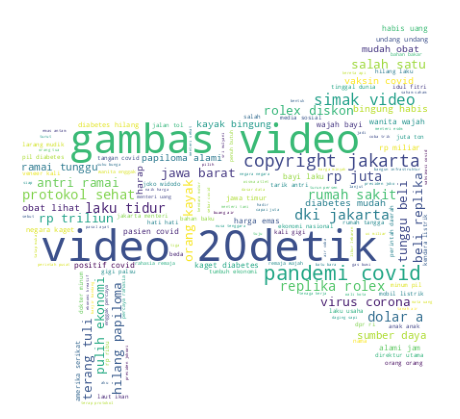

In [ ]:
wc.generate(all_text)
plt.figure(figsize=(8, 8))
plt.imshow(wc)

# Off the x and y axis
plt.axis('off')

# Save the WordCloud as a PDF file
output_pdf_path = 'wordcloud_output.pdf'
plt.savefig(output_pdf_path, format='pdf', bbox_inches='tight')

# Now show the output cloud
plt.show()

## Feature Engineering (1)

In [ ]:
!pip install nlp-id

In [ ]:
from collections import Counter
from nlp_id.postag import PosTag
postagger = PosTag()

def extract_postag(text):
  res = postagger.get_pos_tag(text)
  list_postag = [i[1] for i in res]
  adj = ' '.join([word for word, tag in res if tag == 'JJ'])
  counter = Counter(list_postag)
  return counter.get("NN",0), counter.get("PR",0), counter.get("VB",0), counter.get("NNP",0), counter.get("JJ",0), counter.get("ADV",0), adj

~2.5 ribu data, 1 menit

In [ ]:
df_postag = df_13['clean_konten_berita'].progress_apply(extract_postag).apply(pd.Series)
df_postag.columns = ['num_noun','num_pronoun','num_verb','num_proper_noun','num_adjective','num_adverb', 'adj']
df_13 = pd.concat([df_13, df_postag], axis=1)

In [ ]:
# Function to extract character and word counts
def extract_counts(text):
    total_characters = len(text)
    words = text.split()
    total_words = len(words)
    total_word_length = sum(len(word) for word in words)

    average_word_length = total_word_length / total_words if total_words > 0 else 0

    return total_characters, total_words, average_word_length

# Apply the extract_counts function to the 'narasi' column and create new columns
df_13[['total_characters', 'total_words', 'average_word_length']] = df_13['clean_konten_berita'].apply(extract_counts).apply(pd.Series)

# Display the resulting DataFrame
df_13.head()

,id,sumber,kategori,subkategori,katakunci,judul_berita,konten_berita,nama_tokoh,jabatan,organisasi,...,num_noun,num_pronoun,num_verb,num_proper_noun,num_adjective,num_adverb,adj,total_characters,total_words,average_word_length
0,00e3395ef29,Antara,Informasi dan Komunikasi,Informasi dan Komunikasi,laporan keuangan,ASN penyeleweng dana infak Masjid Raya divonis...,Padang (ANTARA) - Oknum Aparatur Sipil Negara ...,rinto,hakim-ketua-yose,,...,225,0,44,0,39,1,sipil raya sah salah lanjut putus adil putus a...,2209.0,359.0,5.155989
1,019a47ed0bc,Detik,"Pertanian, Kehutanan, dan Perikanan",Kehutanan dan Penebangan Kayu,hasil hutan,10 Alasan MK Kategorikan Ganja Hidroponik seba...,Jakarta -\n\nMahkamah Konstitusi (MK) memasukk...,dengler recommended-methods-for i,,mahkamah-konstitusi-mk mk kbbi-pohonpo-hon-n-1...,...,406,0,87,9,49,3,mahkamah sesuai cegah rusak tinggi sesuai putu...,4077.0,663.0,5.150830
2,01eb3258ed4,Antara,Pengadaan Listrik dan Gas,Ketenagalistrikan,listrik pln,Angkasa Pura minta maaf atas mati listrik di ...,Padang (ANTARA) - PT Angkasa Pura II selaku pe...,ikhwan-wahyudi adi-lazuardi,,pt-angkasa-pura-ii pln bim 1,...,137,0,30,0,17,0,internasional besar penting internasional norm...,1438.0,214.0,5.724299
3,02319ba7dbc,Okezone,Informasi dan Komunikasi,Informasi dan Komunikasi,jumlah penonton,"Liga 1 2021 Digelar dengan Kehadiran Penonton,...","JAKARTA ‚Äì Direktur Utama PT LIB, Akhmad Hadi...",akhmad-hadian-lukita akhmad akhmad-hadian joko...,direktur-utama-pt-lib presiden,the-jakmania kementerian-pemuda-olahraga-kemen...,...,173,0,50,7,29,5,utama mudah gampang sesuai salah rumit sehat t...,1954.0,321.0,5.090343
4,026dd5917f6,Detik,Informasi dan Komunikasi,Informasi dan Komunikasi,laporan keuangan,"Bill Gates Kuasai Tanah Pertanian, Netizen Ket...",Jakarta -\n\nAda hal baru yang mungkin belum b...,offut gates michael-larson donald-trump-pengha...,,,...,130,1,35,0,16,0,besar takut umum sama besar sabar besar takut ...,1273.0,202.0,5.306931


In [ ]:
X.select_dtypes('object').columns.drop(['clean_judul_berita'])

Index(['sumber', 'kategori', 'subkategori', 'katakunci', 'nama_tokoh',
       'jabatan', 'organisasi', 'lokasi', 'alias', 'kutipan',
       'sentimen_kutipan', 'clean_konten_berita', 'adj'],
      dtype='object')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

X = df_13[df_13['set']=='train'].drop(['set','id',"judul_berita","konten_berita"],axis=1).sample(20000)
y = X[LABEL].replace({'Negatif':0, 'Netral':1, 'Positif':2})
X.drop(LABEL, axis=1, inplace=True)

text_feat = ['clean_judul_berita', 'clean_konten_berita', 'kutipan']
# 'adj',
# Initialize CatBoostClassifier
model = CatBoostClassifier(cat_features=X.select_dtypes('object').columns.drop(text_feat).tolist(),
                           text_features=text_feat,
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the Bag of Words training data
model.fit(X_train, y_train)

# Predict on the Bag of Words test data
y_pred = model.predict(X_test)

print('1m 56s -- 20K data')
# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.4f}")

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

In [ ]:
preds = model.predict(df_13[df_13['set']=='test'].drop(['set','id',"judul_berita","konten_berita",'sentimen_berita'],axis=1))
subs = pd.DataFrame({"id":df_13[df_13['set']=='test']['id'].values, "sentimen_berita":preds.flatten()})
subs['sentimen_berita'] = subs['sentimen_berita'].replace({0:'Negatif', 1:'Netral', 2:'Positif'})
subs.to_csv('test_baseline 3.csv', index=False)

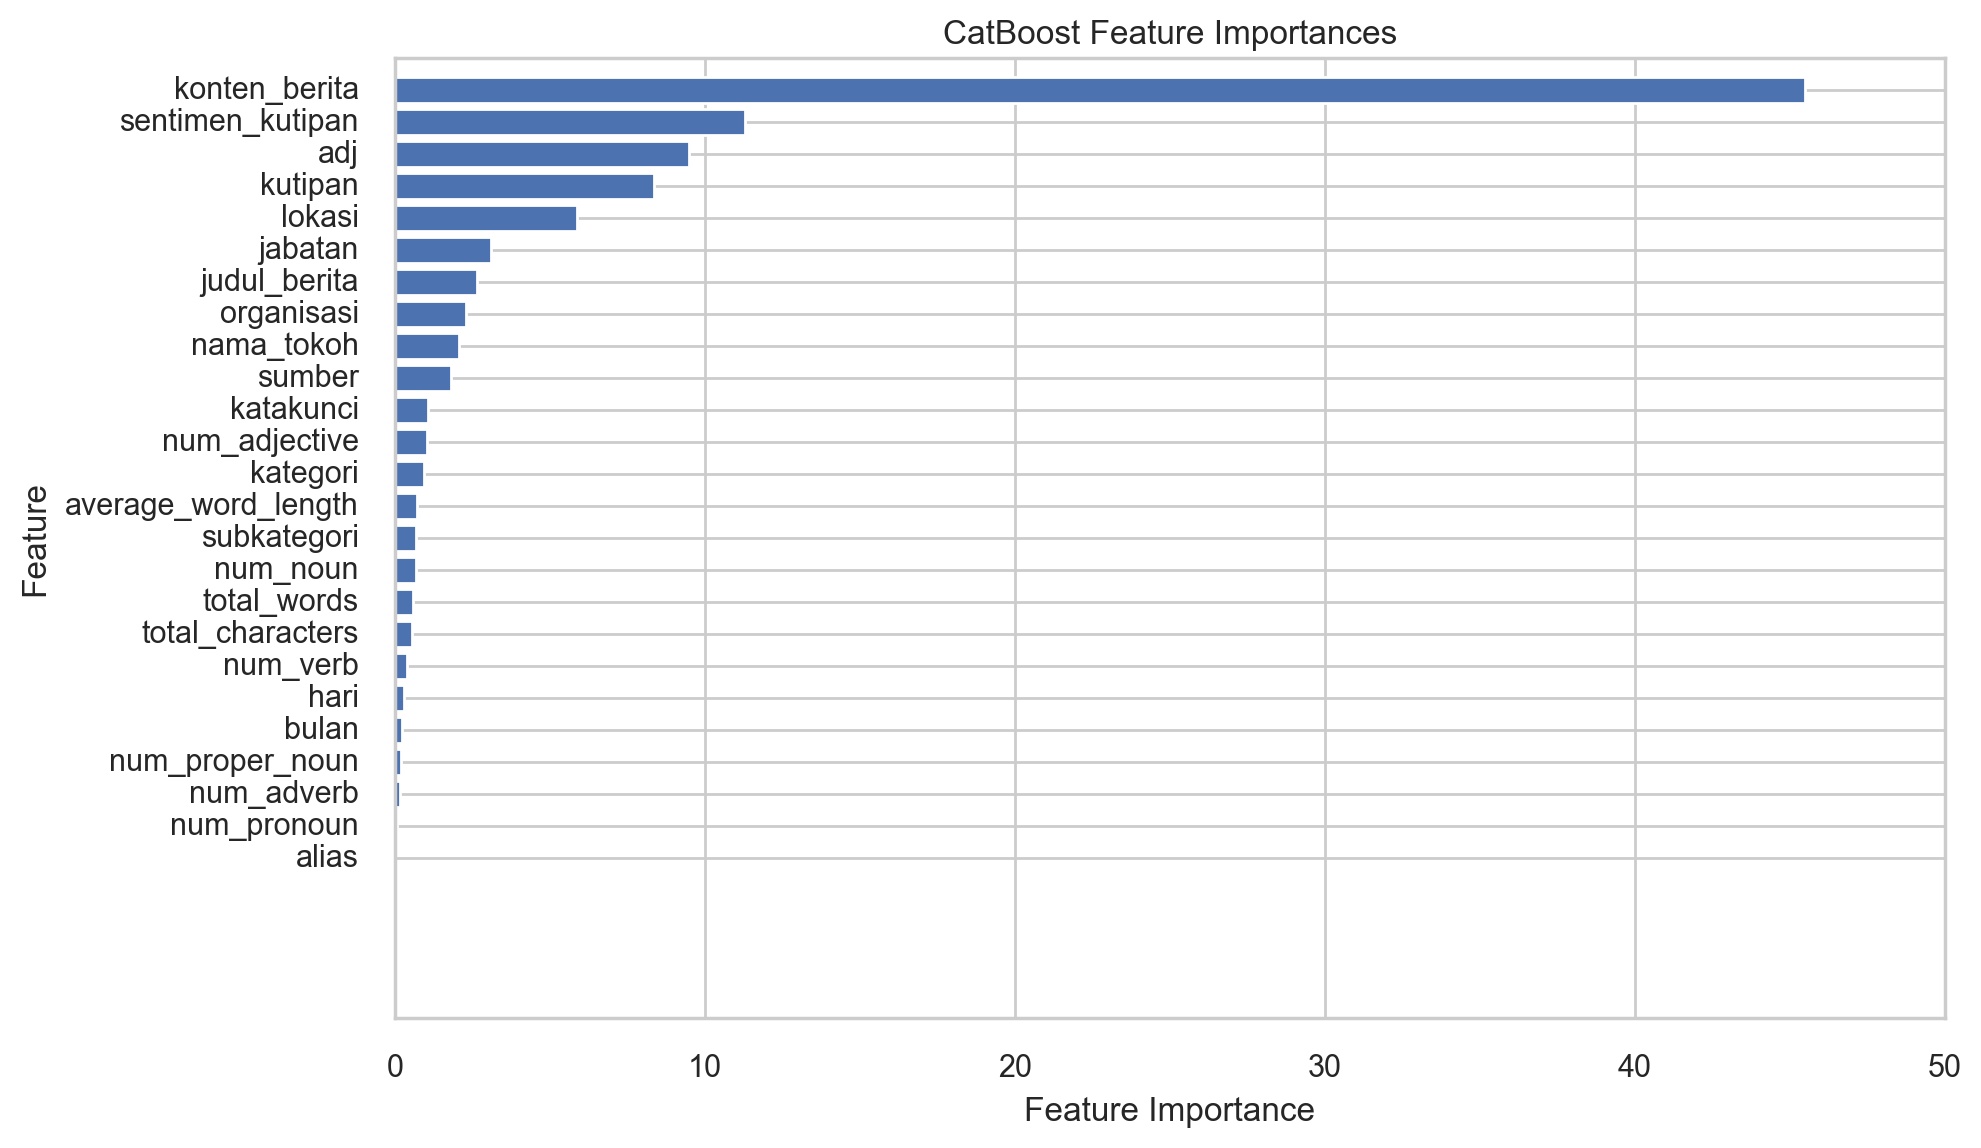

In [ ]:
feature_importances = model.get_feature_importance()
feature_names = X_train.columns
df_impo = pd.DataFrame({'feat':feature_names,'impo':feature_importances})
df_impo = df_impo.sort_values(by='impo')

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), df_impo['impo'], align='center')
plt.yticks(range(len(feature_names)), df_impo['feat'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importances')
plt.show()

In [ ]:
df_13.to_csv('clean_1_df.csv', index=False)

## Feature Engineering (2)

In [ ]:
file_url = 'https://drive.google.com/uc?id=1QUsbE7tUm3-s0XCcOTglyuQBI1EwWKqw'
output_path = 'clean_1_df.csv'

gdown.download(file_url, output_path)

Downloading...
From: https://drive.google.com/uc?id=1QUsbE7tUm3-s0XCcOTglyuQBI1EwWKqw
To: /content/clean_1_df.csv
100%|██████████| 1.93M/1.93M [00:00<00:00, 107MB/s]


'clean_1_df.csv'

In [ ]:
df_cp = pd.read_csv("df_13.csv")

In [ ]:
df_cp.head(1)

,id,sumber,kategori,subkategori,katakunci,judul_berita,konten_berita,nama_tokoh,jabatan,organisasi,lokasi,alias,kutipan,sentimen_kutipan,sentimen_berita,set,hari,bulan,clean_konten_berita,clean_judul_berita,num_noun,num_pronoun,num_verb,num_proper_noun,num_adjective,num_adverb,adj,total_characters,total_words,average_word_length
0,00e3395ef29,Antara,Informasi dan Komunikasi,Informasi dan Komunikasi,laporan keuangan,ASN penyeleweng dana infak Masjid Raya divonis...,Padang (ANTARA) - Oknum Aparatur Sipil Negara ...,rinto,hakim-ketua-yose,NaN,padang sumbar provinsi-sumbar inspektorat-sumb...,dibayar,Menyatakan terdakwa terbukti secara sah dan me...,Negatif,Negatif,train,5,2,padang oknum aparatur sipil negara asn pemprov...,asn seleweng dana infak masjid raya vonis tujuh,225,0,44,0,39,1,sipil raya sah salah lanjut putus adil putus a...,2209.0,359.0,5.155989


In [ ]:
import string

def count_punctuation(text):
    punctuation_count = 0
    for char in text:
        if char in string.punctuation:
            punctuation_count += 1
    return punctuation_count

df_cp['num_punct'] = df_cp['konten_berita'].apply(count_punctuation)

In [ ]:
import requests

# URL of the file you want to download
url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content to a local file
    with open("positive.tsv", "wb") as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")


File downloaded successfully.


In [ ]:
# Fajri Koto, and Gemala Y. Rahmaningtyas "InSet Lexicon: Evaluation of a Word List for
# Indonesian Sentiment Analysis in Microblogs". IEEE in the 21st International Conference
# on Asian Language Processing (IALP), Singapore, December 2017.
#
# The InSet Lexicon consists of 3,609 positive words and 6,609 negative words with weight ranging from -5 to +5

!wget https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv
!wget https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv

--2023-09-12 05:11:18--  https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82788 (81K) [text/plain]
Saving to: ‘negative.tsv’

negative.tsv        100%[===================>]  80.85K  --.-KB/s    in 0.03s   

2023-09-12 05:11:18 (2.87 MB/s) - ‘negative.tsv’ saved [82788/82788]

--2023-09-12 05:11:20--  https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41462 (40K) [text/plain]
Saving to: ‘positive.tsv.1

In [ ]:
# kita muat kata-kata bersentiment tersebut ke memori
# dalam bentuk python's dictionary
# key = word
# value = sentiment score

sentword_score = {}

def load_sentword(filename):
  file = open(filename, "r")
  file.readline() # skip header
  for line in file:
    word, score = line.strip().split("\t")
    score = int(score)
    sentword_score[word] = score
  file.close()

load_sentword("negative.tsv")
load_sentword("positive.tsv")

In [ ]:
from tqdm import tqdm
# kita ingin mengetahui apakah banyaknya kata positif dan banyaknya kata negatif
# di dalam sebuah dokumen bisa menjadi faktor untuk mengklasifikasikan
# the whole document sebagai positif atau negatif.

# kita coba buat scatter plot, dimana x = banyaknya kata positif
# y = banyaknya kata negatif. Lalu, untuk setiap titik (dokumen), diberi warna
# # tergantung label dokumen tersebut.
num_pos = []
num_neg = []
scores  = []

# untuk setiap dokumen
for _, row in tqdm(df_cp.iterrows(), total=df_cp.shape[0]):
  tokens = word_tokenize(row["clean_konten_berita"])
  label = row["sentimen_berita"]
  num_negative, num_positive = 0, 0

  # sekarang, bayangkan sedang di sebuah dokumen
  # untuk setiap kata di dokumen tersebut
  for token in tokens:
    if token in sentword_score:
      if (sentword_score[token] < 0):
        num_negative += 1
      elif (sentword_score[token] > 0):
        num_positive += 1
  num_pos.append(num_positive)
  num_neg.append(num_negative)
  scores.append(label)

# tambahkan kolom di dataframe
df_cp["pos_words"] = num_pos
df_cp["neg_words"] = num_neg

100% 75554/75554 [02:10<00:00, 576.96it/s]


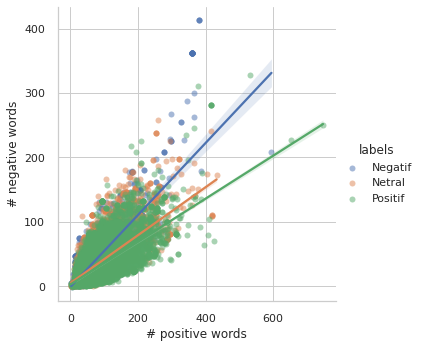

In [ ]:
# add jitters
num_pos = np.array(num_pos)
num_neg = np.array(num_neg)
num_pos = num_pos + np.random.normal(0, 0.2, len(num_pos))
num_neg = num_neg + np.random.normal(0, 0.2, len(num_neg))

# Combine data into a DataFrame
data_temp = {'num_pos': num_pos, 'num_neg': num_neg, 'scores': scores, 'labels': df_cp['sentimen_berita']}
data_temp = pd.DataFrame(data_temp)

# Create a scatter plot with regression lines using lmplot from Seaborn
sns.set(style="whitegrid")
g = sns.lmplot(x='num_pos', y='num_neg', data=data_temp, scatter_kws={'alpha': 0.5}, hue='labels')

plt.xlabel('# positive words')
plt.ylabel('# negative words')

# Customize the legend
# g.add_legend(title="Labels")

plt.show()

In [ ]:
df_cp[['clean_narasi','clean_judul']] = df_cp[['clean_narasi','clean_judul']].astype(str)

In [ ]:
df_cp.to_csv('df_13.csv', index=False)

## Topic Modelling

In [ ]:
file_url = 'https://drive.google.com/uc?id=1C2Bywr6_DwleUN5JTYchU6PrkV32j1kJ'
output_path = '/content/clean_2_df.csv'

gdown.download(file_url, output_path)

Downloading...
From: https://drive.google.com/uc?id=1C2Bywr6_DwleUN5JTYchU6PrkV32j1kJ
To: /content/clean_2_df.csv
100%|██████████| 1.95M/1.95M [00:00<00:00, 106MB/s]


'/content/clean_2_df.csv'

In [ ]:
!pip install bertopic --q

In [ ]:
df_cp = pd.read_csv("df_13.csv")
df_cp[['clean_konten_berita','clean_judul_berita']] = df_cp[['clean_konten_berita','clean_judul_berita']].astype(str)

In [ ]:
docs = df_cp.clean_konten_berita.values

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="indonesian", calculate_probabilities=True, verbose=True, top_n_words=4)
topics, probs = topic_model.fit_transform(docs)

In [ ]:
freq = topic_model.get_topic_info();
freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1651,-1_yang_orang_anak_jokowi,"[yang, orang, anak, jokowi]",[untuk info kepada teman grup jadi laki dalam ...
1,0,298,0_indonesia_jakarta_papua_dki,"[indonesia, jakarta, papua, dki]","[jokowi jual indonesia, gubernur dki jakarta a..."
2,1,238,1_ya_jokowi_enggak_aku,"[ya, jokowi, enggak, aku]",[panglima tni sudah tau arah mana makan yang y...
3,2,186,2_virus_corona_19_pasien,"[virus, corona, 19, pasien]",[animasi sebar virus corona moga jauh sakit vi...
4,3,127,3_islam_umat_muslim_masjid,"[islam, umat, muslim, masjid]",[juang tahan rumah saja hianati kah abdullah g...
...,...,...,...,...,...
57,56,12,56_jalan_gdc_arah_sekat,"[jalan, gdc, arah, sekat]",[mesin mobil mati lintas rel kereta api orang ...
58,57,12,57_kapal_tenggelam_laut_makassar,"[kapal, tenggelam, laut, makassar]",[danau toba duka innalillahi wa innaillahi roj...
59,58,11,58_stadion_suporter_arena_tiket,"[stadion, suporter, arena, tiket]",[suporter bola ngamuk tiket telat sasar giant ...
60,59,10,59_berita_artikel_alir_sesat,"[berita, artikel, alir, sesat]","[berita, berita populer nadiem makarim mendikb..."


In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.reduce_topics(docs)

2023-09-03 04:56:10,273 - BERTopic - Reduced number of topics from 62 to 20


In [ ]:
topic_model.visualize_topics()

In [ ]:
topics_post, probs_post = topic_model.transform(docs)

Batches:   0%|          | 0/133 [00:00<?, ?it/s]

2023-09-03 05:08:15,549 - BERTopic - Reduced dimensionality
2023-09-03 05:08:17,043 - BERTopic - Calculated probabilities with HDBSCAN
2023-09-03 05:08:17,044 - BERTopic - Predicted clusters


In [ ]:
freq = topic_model.get_topic_info()
freq

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1651,-1_yang_orang_anak_jokowi,"[yang, orang, anak, jokowi]",[ingat negara batas tetap 30 juli 2020 pilih o...
1,0,819,0_indonesia_china_islam_jakarta,"[indonesia, china, islam, jakarta]","[jokowi jual indonesia, indonesia siaga 1 pilk..."
2,1,811,1_hoax_presiden_yang_anak,"[hoax, presiden, yang, anak]",[depan waspada kait aman anak ajak masyarakat ...
3,2,277,2_virus_corona_covid_19,"[virus, corona, covid, 19]",[animasi sebar virus corona moga jauh sakit vi...
4,3,71,3_seleksi_2020_cpns_2019,"[seleksi, 2020, cpns, 2019]",[dasar hasil evaluasi tim seleksi lamar kerja ...
5,4,69,4_kapal_laut_binatang_hewan,"[kapal, laut, binatang, hewan]",[kapal kargo indonesia tuju china lapor tengge...
6,5,64,5_whatsapp_sim_panggil_pesan,"[whatsapp, sim, panggil, pesan]",[besok laku minggu tenang panggil catat rekam ...
7,6,64,6_rokok_mobil_bensin_paru,"[rokok, mobil, bensin, paru]",[bakar mbl pom bensin sambiroto sarang anak ma...
8,7,62,7_uang_rp_bayar_000,"[uang, rp, bayar, 000]",[malam jam 24 00 bbm premium rp 9 500 pertalit...
9,8,60,8_gempa_jembatan_matahari_laut,"[gempa, jembatan, matahari, laut]",[deputi bidang geofisika bmkg dari muhamad sad...


In [ ]:
df_cp['no_topic'] = topics_post

In [ ]:
df_cp = df_cp.merge(freq, left_on='no_topic', right_on='Topic')

In [ ]:
df_cp.to_csv("clean_2_df.csv", index=False)

## Simple EDA

In [ ]:
df_cp.head(1)

,id,sumber,kategori,subkategori,katakunci,judul_berita,konten_berita,nama_tokoh,jabatan,organisasi,lokasi,alias,kutipan,sentimen_kutipan,sentimen_berita,set,hari,bulan,clean_konten_berita,clean_judul_berita,num_noun,num_pronoun,num_verb,num_proper_noun,num_adjective,num_adverb,adj,total_characters,total_words,average_word_length,pos_words,neg_words
0,00e3395ef29,Antara,Informasi dan Komunikasi,Informasi dan Komunikasi,laporan keuangan,ASN penyeleweng dana infak Masjid Raya divonis...,Padang (ANTARA) - Oknum Aparatur Sipil Negara ...,rinto,hakim-ketua-yose,NaN,padang sumbar provinsi-sumbar inspektorat-sumb...,dibayar,Menyatakan terdakwa terbukti secara sah dan me...,Negatif,Negatif,train,5,2,padang oknum aparatur sipil negara asn pemprov...,asn seleweng dana infak masjid raya vonis tujuh,225,0,44,0,39,1,sipil raya sah salah lanjut putus adil putus a...,2209.0,359.0,5.155989,101,42


Text(0.5, 1.0, 'Jumlah Label Sentimen')

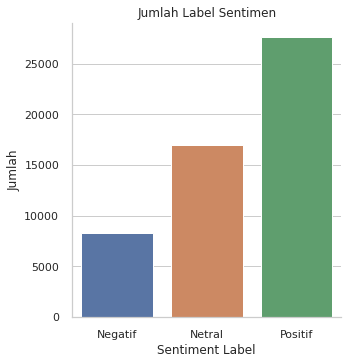

In [ ]:
ax= sns.catplot(x = "sentimen_berita", data = df_cp, \
            kind = "count")
plt.xlabel('Sentiment Label')
# ax.set_xticklabels(['False News (0)','True Fact (1)'])
plt.ylabel('Jumlah')
plt.title('Jumlah Label Sentimen')

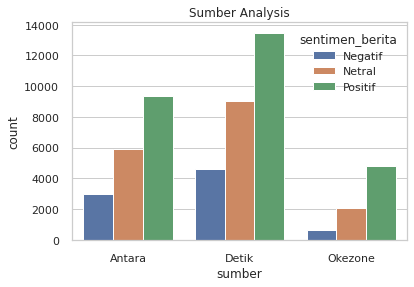

In [ ]:
ax = sns.countplot(x="sumber", data=df_cp, hue='sentimen_berita').set_title('Sumber Analysis')

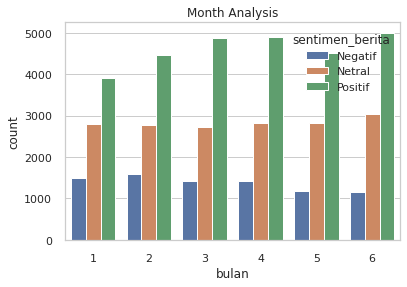

In [ ]:
ax = sns.countplot(x="bulan", data=df_cp, hue='sentimen_berita').set_title('Month Analysis')

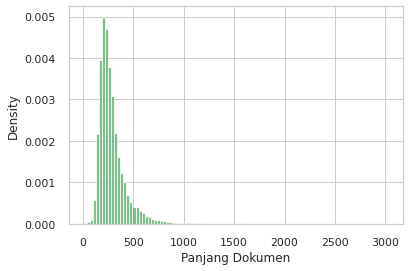

In [ ]:
n, bins, patches = plt.hist(df_cp["total_words"] , 100, density = True, facecolor = 'g', alpha = 0.75)

plt.xlabel('Panjang Dokumen')
plt.ylabel('Density')
plt.grid(True)
plt.show()

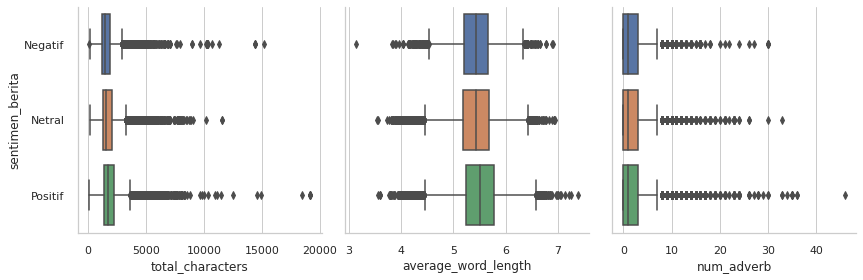

In [ ]:
g = sns.PairGrid(df_cp, y_vars = ["sentimen_berita"], \
                 x_vars = ['total_characters', 'average_word_length', 'num_adverb'], height = 4)
g.map(sns.boxplot, orient = "h")

# g.axes[0,0].set_xlim((0,100))
# g.axes[0,1].set_xlim((0,200))

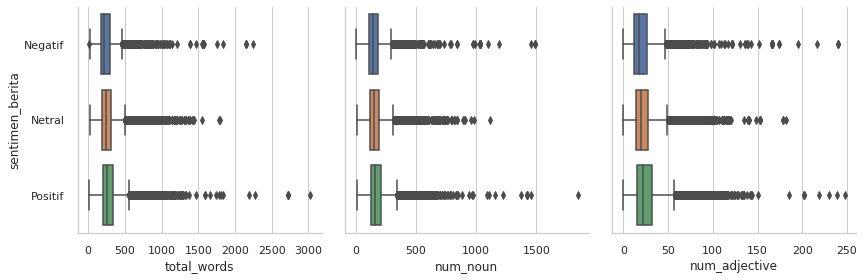

In [ ]:
g = sns.PairGrid(df_cp, y_vars = ["sentimen_berita"], \
                 x_vars = ['total_words', 'num_noun', 'num_adjective'], height = 4)
g.map(sns.boxplot, orient = "h")

# g.axes[0,0].set_xlim((0,100))
# g.axes[0,1].set_xlim((0,200))

Text(0.5, 0, 'Bulan')

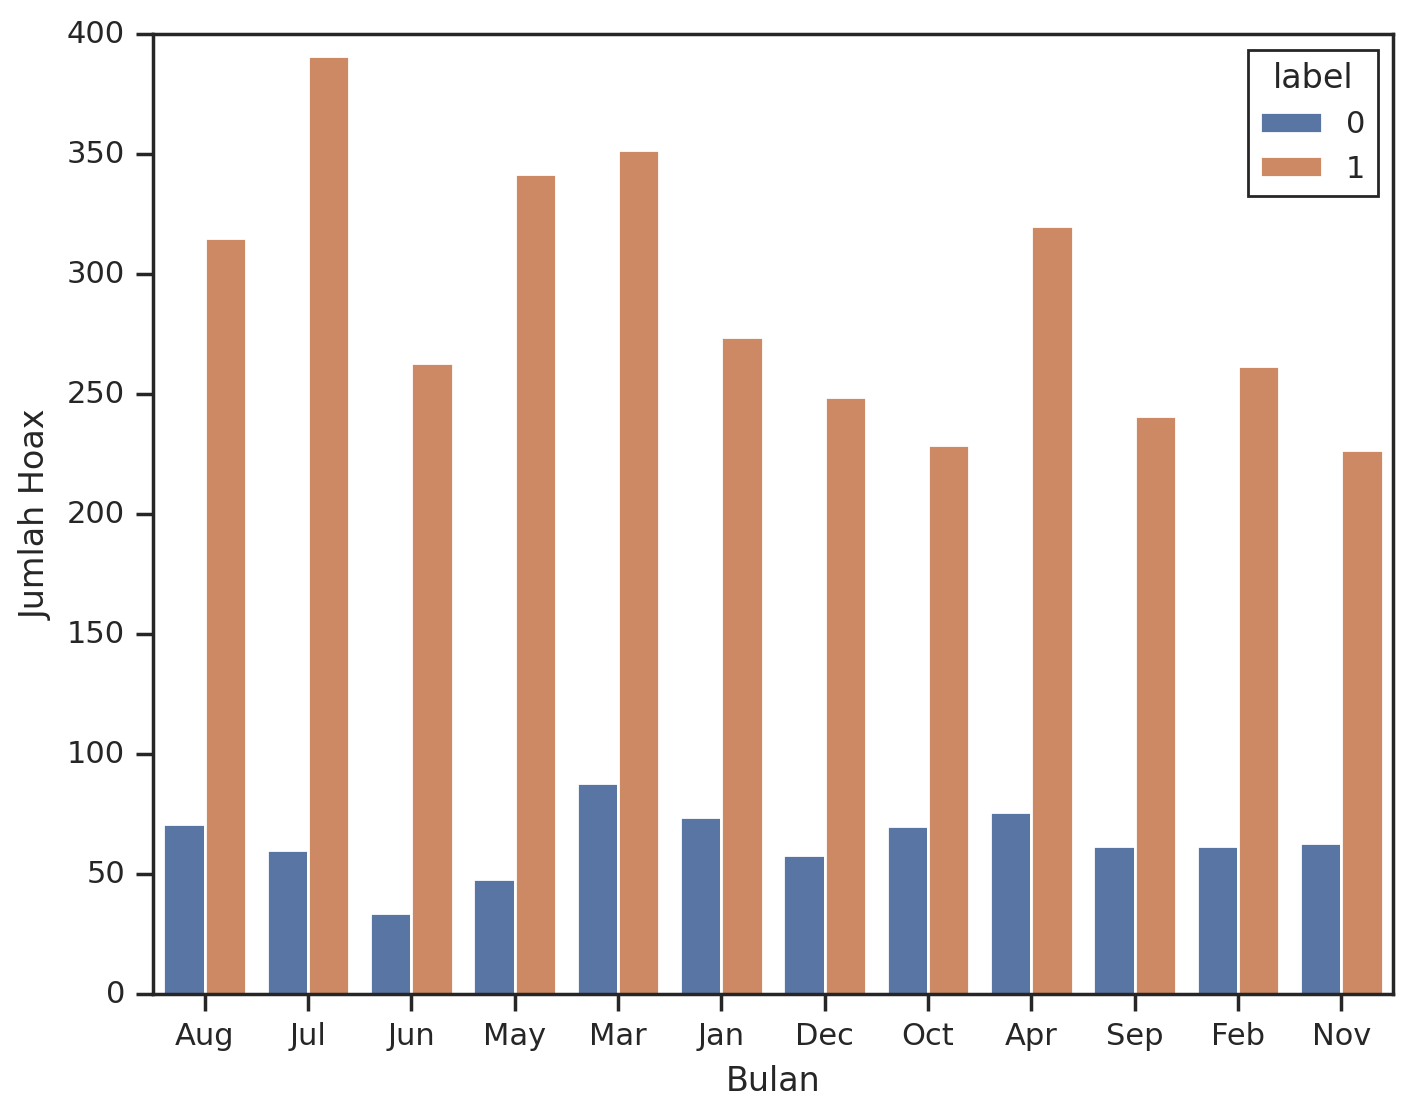

In [ ]:
sns.countplot(x='month', hue='label', data=df_cp)
plt.ylabel('Jumlah Hoax')
plt.xlabel('Bulan')

In [ ]:
df_cp_number = pd.concat([df_cp.select_dtypes("number"),
                          df_cp[LABEL].replace({'Negatif':0, 'Netral':1, 'Positif':2})], axis=1)

Text(0.5, 1.0, 'pearson correlation')

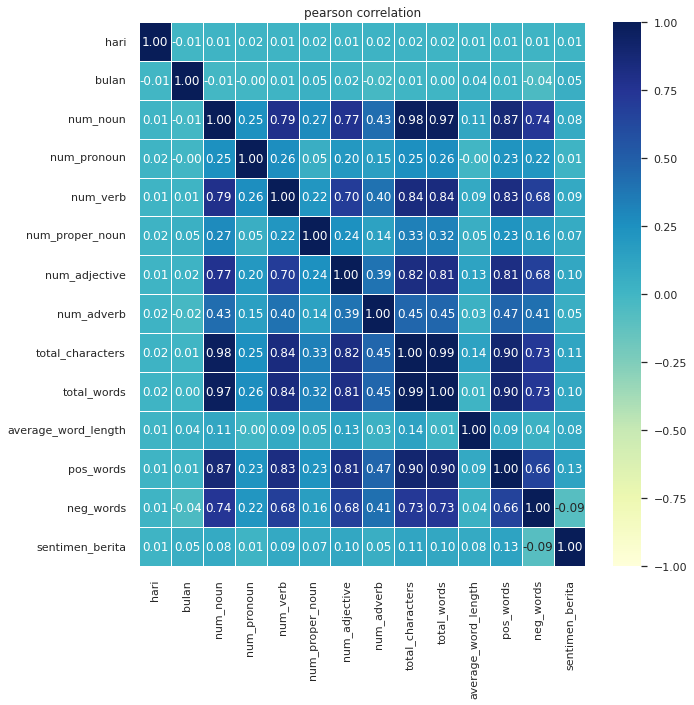

In [ ]:
plt.figure(figsize=(10,10))
corr_matrix = df_cp_number.corr(method = "pearson")
sns.heatmap(corr_matrix, vmin = -1., vmax = 1., \
            annot = True, fmt = '.2f', cmap = "YlGnBu", \
            cbar = True, linewidths = 0.5)
plt.title("pearson correlation")

In [ ]:
from nltk.tokenize import word_tokenize
import scattertext as st

scattext_df = df_cp[df_cp['sentimen_berita']!='Netral'].copy().dropna(subset='sentimen_berita').sample(1000)
# print(scattext_df.groupby('label')['konten_berita'].count())

# print("Word Count")
# scattext_df.groupby('label').apply(lambda x: x.clean_narasi.apply(lambda x: len(word_tokenize(x))).sum())
scattext_df['parsed'] = scattext_df.clean_konten_berita.astype(str).progress_apply(st.whitespace_nlp_with_sentences)
# scattext_df['label'] = scattext_df['label'].replace({1:'Hoax', 0:'Non-Hoax'})

# membuat corpus untuk scatter text
corpus = st.CorpusFromParsedDocuments(scattext_df, category_col = 'sentimen_berita', \
                                      parsed_col = 'parsed', max_snippets=100).build()

In [ ]:
scattext_df.clean_konten_berita.astype(str).progress_apply(st.whitespace_nlp_with_sentences)

  0%|          | 0/1000 [00:00<?, ?it/s]

44494    (jakarta, raksasa, teknologi, as, kabar, tuju,...
35226    (jakarta, indeks, harga, saham, gabung, ihsg, ...
49493    (jakarta, pt, mnc, teknologi, nusantara, mtn, ...
31227    (sydney, saham, saham, australia, tipis, dagan...
29029    (jakarta, tren, korea, selatan, video, makan, ...
                               ...                        
47751    (jakarta, perintah, upaya, cepat, pulih, ekono...
49492    (jakarta, orang, putus, bisnis, putus, butuh, ...
45434    (jakarta, industri, film, dalam, bioskop, sala...
31519    (jakarta, komisi, vi, dpr, ri, resmi, dukung, ...
43752    (rupiah, tutup, kuat, 39, poin, 0, 28, persen,...
Name: clean_konten_berita, Length: 1000, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize
import scattertext as st

scattext_df = df_cp[df_cp['sentimen_berita']!='Netral'].copy().dropna(subset='sentimen_berita')
# print(scattext_df.groupby('label')['konten_berita'].count())

# print("Word Count")
# scattext_df.groupby('label').apply(lambda x: x.clean_narasi.apply(lambda x: len(word_tokenize(x))).sum())
scattext_df['parsed'] = scattext_df.clean_konten_berita.astype(str).apply(st.whitespace_nlp_with_sentences)
# scattext_df['label'] = scattext_df['label'].replace({1:'Hoax', 0:'Non-Hoax'})

# membuat corpus untuk scatter text
corpus = st.CorpusFromParsedDocuments(scattext_df, category_col = 'label', \
                                      parsed_col = 'parsed', max_snippets=100).build()

html = produce_scattertext_explorer(corpus,
                                    category = 'Positif',
                                    category_name = 'Positif',
                                    not_category_name = 'Negatif',
                                    width_in_pixels = 1000,
                                    jitter = 0.1,
                                    minimum_term_frequency = 5,
                                    transform = st.Scalers.percentile)

file_name = 'HoaxDetectionScattertextRankDataJitter.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src = file_name, width = 1200, height = 700)

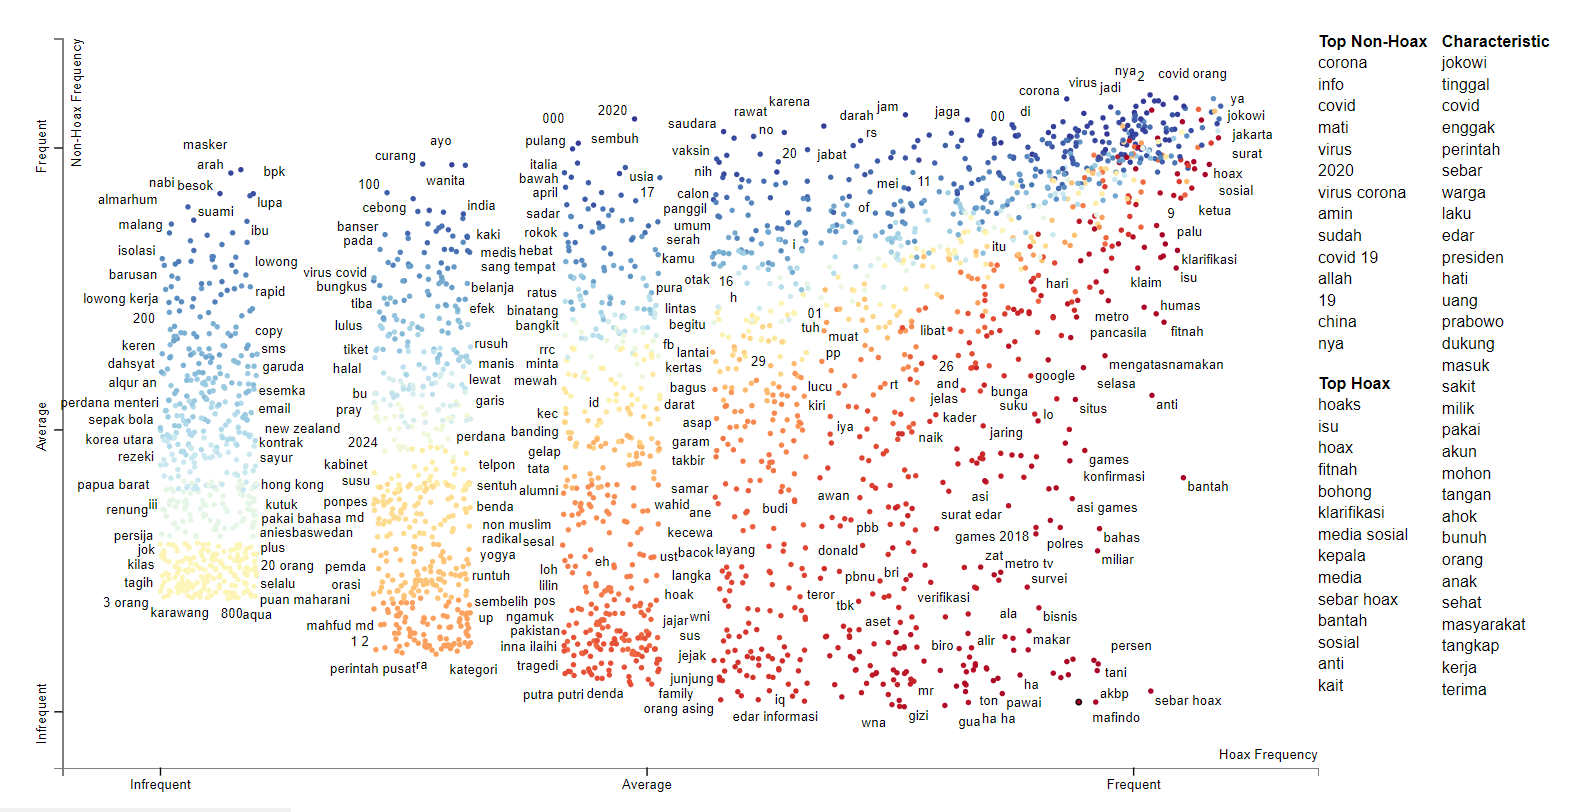

## Modelling

In [ ]:
file_url = 'https://drive.google.com/uc?id=1C2Bywr6_DwleUN5JTYchU6PrkV32j1kJ'
output_path = '/content/clean_2_df.csv'

gdown.download(file_url, output_path)

Downloading...
From: https://drive.google.com/uc?id=1C2Bywr6_DwleUN5JTYchU6PrkV32j1kJ
To: /content/clean_2_df.csv
100%|██████████| 5.51M/5.51M [00:00<00:00, 148MB/s]


'/content/clean_2_df.csv'

In [ ]:
df_cp = pd.read_csv("df_13.csv")

In [ ]:
!pip install umap --q
!pip install catboost --q

  Preparing metadata (setup.py) ... done


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# # Split the dataset into features (X) and target (y)
# X = df_cp.drop("label", axis=1)  # Replace with actual target column name
# X = X.drop(['ID','judul','narasi','Name','Count','Representation','Representative_Docs','Topic'],axis=1).fillna("None")
# y = df_cp["label"]

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### CatBoost embedding + Data FE

~18 sekon

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Initialize CatBoostClassifier
model = CatBoostClassifier(cat_features=X.select_dtypes('object').columns.tolist()+['year','no_topic'],
                           random_state=42, verbose=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the Bag of Words training data
model.fit(X_train, y_train)

# Predict on the Bag of Words test data
y_pred = model.predict(X_test)

# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9056


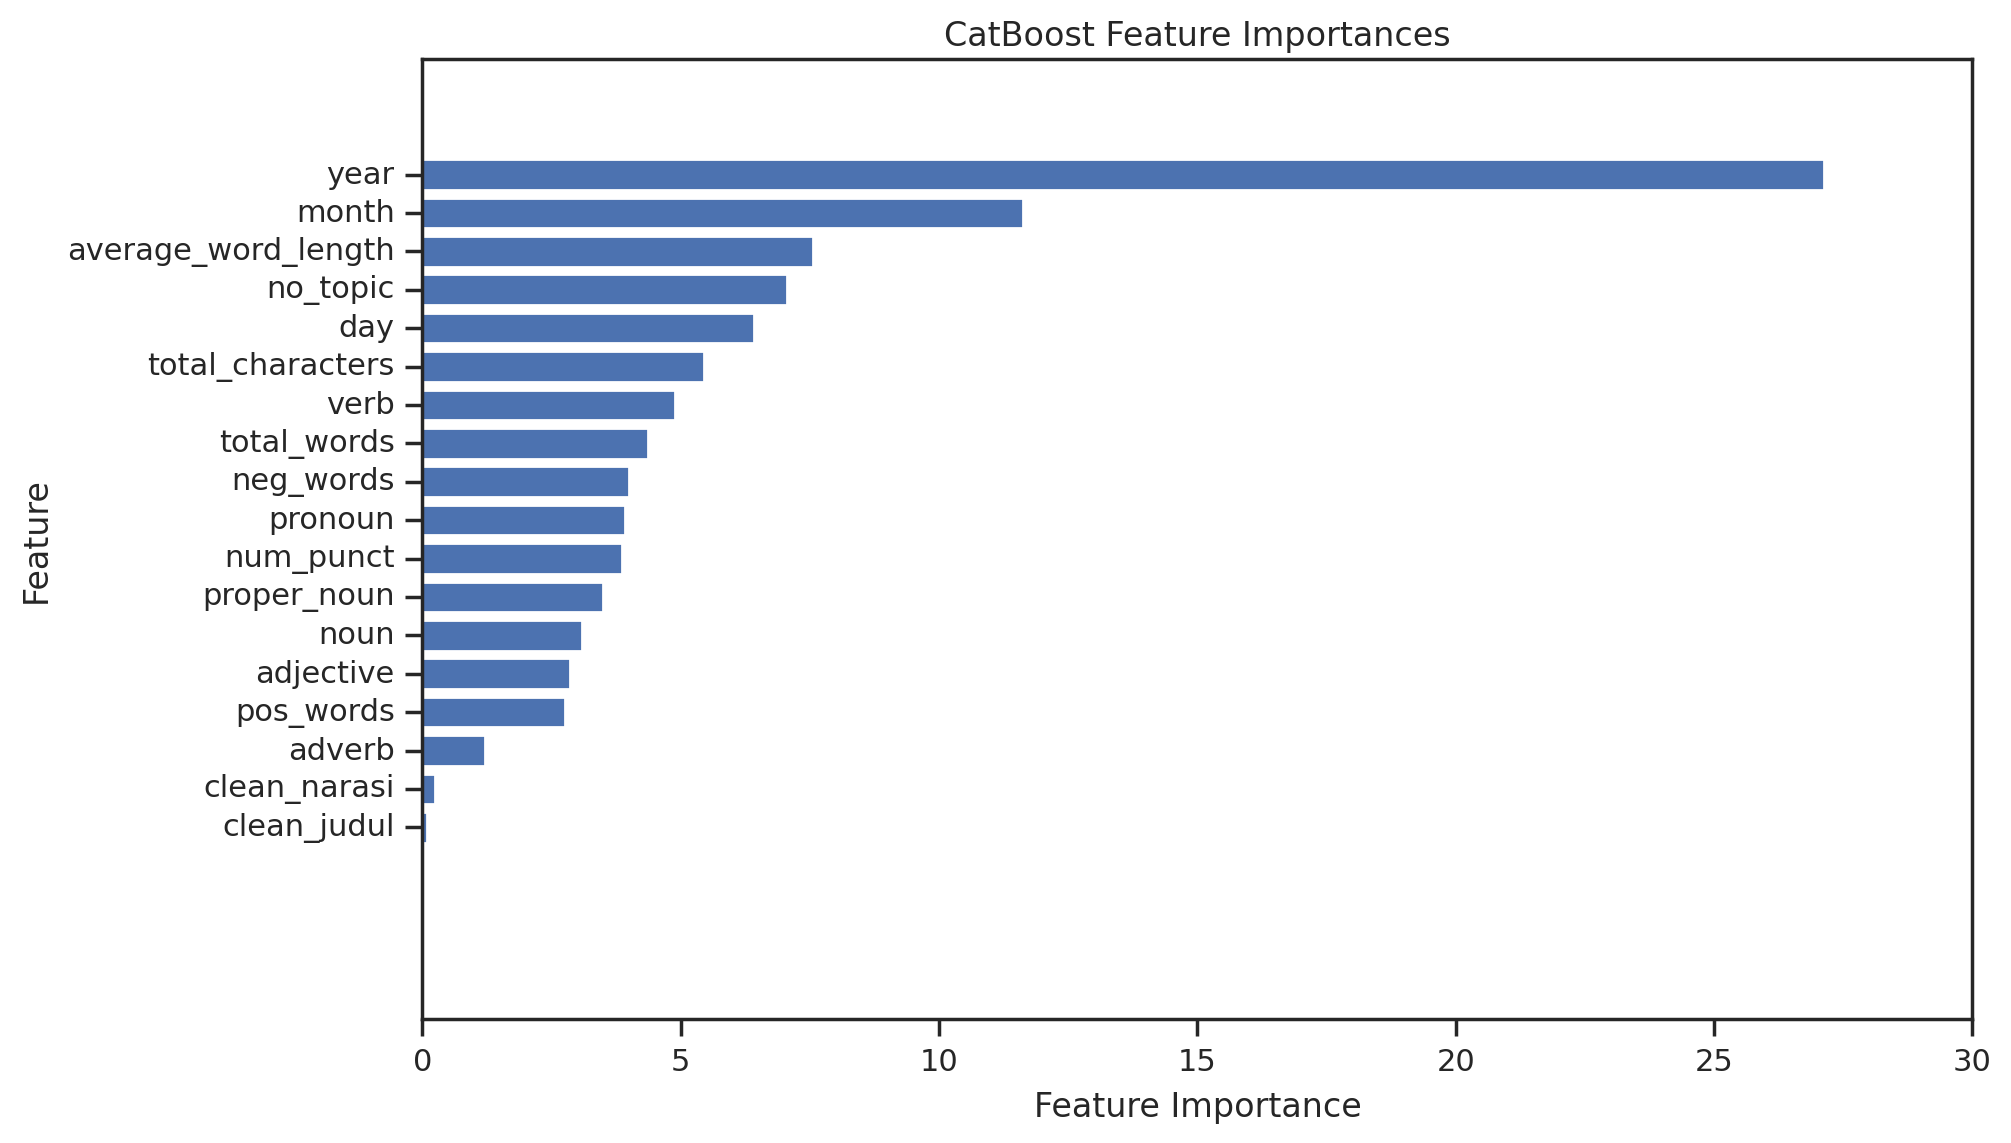

In [ ]:
model.fit(X_train, y_train)
# Plot feature importances
feature_importances = model.get_feature_importance()
feature_names = X_train.columns
df_impo = pd.DataFrame({'feat':feature_names,'impo':feature_importances})
df_impo = df_impo.sort_values(by='impo')

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), df_impo['impo'], align='center')
plt.yticks(range(len(feature_names)), df_impo['feat'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importances')
plt.show()

### CatBoost + BOW + Data FE

~3 menit

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import umap

# Initialize CountVectorizer
vectorizer = CountVectorizer(min_df=5, ngram_range=(1, 2))

# Fit and transform the training text data for narasi and judul
X_bow_narasi = vectorizer.fit_transform(X['clean_narasi'])
embedding_bow_narasi = umap.UMAP(n_components=100, metric='hellinger').fit_transform(X_bow_narasi)
df_bow_narasi = pd.DataFrame(embedding_bow_narasi, columns=[f'narasi_{i}' for i in range(100)])

X_bow_judul = vectorizer.fit_transform(X['clean_judul'])
embedding_bow_judul = umap.UMAP(n_components=100, metric='hellinger').fit_transform(X_bow_judul)
df_bow_judul = pd.DataFrame(embedding_bow_judul, columns=[f'judul_{i}' for i in range(100)])

# Concatenate the DataFrames with the tabular data
X_tabular = X.drop(['clean_narasi', 'clean_judul'], axis=1)
X_combined = pd.concat([X_tabular, df_bow_narasi, df_bow_judul], axis=1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Initialize CatBoostClassifier
model = CatBoostClassifier(cat_features=X_combined.select_dtypes('object').columns.tolist()+['year','no_topic'],
                           random_state=42, verbose=0)

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Fit the model on the Bag of Words training data
model.fit(X_train, y_train)

# Predict on the Bag of Words test data
y_pred = model.predict(X_test)

# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9138


### CatBoost + Tf-Idf + Data FE

~3 menit

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import umap

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 2))

# Fit and transform the training text data for narasi and judul
X_tfidf_narasi = vectorizer.fit_transform(X['clean_narasi'])
embedding_tfidf_narasi = umap.UMAP(n_components=100, metric='hellinger').fit_transform(X_tfidf_narasi)
df_tfidf_narasi = pd.DataFrame(embedding_tfidf_narasi, columns=[f'narasi_{i}' for i in range(100)])

X_tfidf_judul = vectorizer.fit_transform(X['clean_judul'])
embedding_tfidf_judul = umap.UMAP(n_components=100, metric='hellinger').fit_transform(X_tfidf_judul)
df_tfidf_judul = pd.DataFrame(embedding_tfidf_judul, columns=[f'judul_{i}' for i in range(100)])

# Concatenate the DataFrames with the tabular data
X_tabular = X.drop(['clean_narasi', 'clean_judul'], axis=1)
X_combined = pd.concat([X_tabular, df_tfidf_narasi, df_tfidf_judul], axis=1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Initialize CatBoostClassifier
model = CatBoostClassifier(cat_features=X_combined.select_dtypes('object').columns.tolist()+['year','no_topic'],
                           random_state=42, verbose=0)

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Fit the model on the TF IDF training data
model.fit(X_train, y_train)

# Predict on the TF IDF test data
y_pred = model.predict(X_test)

# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9152


### CatBoost + W2Vec + Data FE

~1 menit

In [ ]:
!pip install gensim --q

In [ ]:
# Function to generate average vector for a text
def get_avg_word_vector(words, model, vector_size):
    vector_sum = sum([model.wv[word] for word in words if word in model.wv])
    if isinstance(vector_sum, np.ndarray):
        return vector_sum / len(words)
    else:
        return np.zeros(vector_size)

In [ ]:
from gensim.models import Word2Vec

# Tokenize the text data into sentences (assuming you have preprocessed text data)
narasi_sentences = [sentence.split() for sentence in X['clean_narasi']]
w2v_model = Word2Vec(narasi_sentences, vector_size=100, window=5, min_count=3, sg=0)

X_w2v_narasi = [get_avg_word_vector(sentence.split(), w2v_model, vector_size=100) for sentence in X['clean_narasi']]
X_w2v_narasi = np.array(X_w2v_narasi)
df_w2v_narasi = pd.DataFrame(X_w2v_narasi, columns=[f'narasi_{i}' for i in range(100)])

judul_sentences = [sentence.split() for sentence in X['clean_judul']]
w2v_model = Word2Vec(judul_sentences, vector_size=100, window=5, min_count=3, sg=0)

X_w2v_judul = [get_avg_word_vector(sentence.split(), w2v_model, vector_size=100) for sentence in X['clean_judul']]
X_w2v_judul = np.array(X_w2v_judul)
df_w2v_judul = pd.DataFrame(X_w2v_judul, columns=[f'judul_{i}' for i in range(100)])

# Concatenate the DataFrames with the tabular data
X_tabular = X.drop(['clean_narasi', 'clean_judul'], axis=1)
X_combined = pd.concat([X_tabular, df_w2v_narasi, df_w2v_judul], axis=1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Initialize CatBoostClassifier
model = CatBoostClassifier(cat_features=X_combined.select_dtypes('object').columns.tolist()+['year','no_topic'],
                           random_state=42, verbose=0)

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Fit the model on the W2Vec training data
model.fit(X_train, y_train)

# Predict on the W2Vec test data
y_pred = model.predict(X_test)

# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9102


### CatBoost + Transformers Embedding + Data Raw

In [ ]:
!pip install sentence_transformers --q

In [ ]:
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer("firqaaa/indo-sentence-bert-base")

In [ ]:
embeddings = sentence_model.encode(["haloo nama gw bryan tjandra, lu siapa?"], show_progress_bar=True)

from sklearn.preprocessing import normalize
normalized_embeddings = normalize(embeddings)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
X_new = df_cp[df_cp['set']=='train'].drop(['set','id',"clean_judul_berita","clean_konten_berita"],axis=1).sample(20000)
y_new = X_new[LABEL].replace({'Negatif':0, 'Netral':1, 'Positif':2})
X_new.drop(LABEL, axis=1, inplace=True)

In [ ]:
# X_new = df_cp.drop("sentimen_berita", axis=1)  # Replace with actual target column name
# X_new = X_new.drop(['ID','clean_judul','clean_narasi','Name','Count','Representation','Representative_Docs','Topic'],axis=1).fillna("None")
# y = df_cp["sentimen_berita"]

In [ ]:
from tqdm import tqdm

# Create an empty list to store the results
results_embeddings = []

# Batch size
batch_size = 64

# Get the total number of samples
total_samples = len(X_new['judul_berita'].values.tolist())

# Iterate over the data in batches
for i in tqdm(range(0, total_samples, batch_size)):
    batch = X_new['judul_berita'].values.tolist()[i:i+batch_size]
    embeddings_batch = sentence_model.encode(batch)
    results_embeddings.extend(embeddings_batch)

# Now, results_embeddings contains the embeddings for all data in batches of 32


100%|██████████| 313/313 [08:51<00:00,  1.70s/it]


In [ ]:
X_tabular = X_new.drop(['narasi', 'judul'], axis=1)
X_embed = pd.DataFrame(results_embeddings,columns=[f'narasi_{i}' for i in range(768)])
X_combined = pd.concat([X_tabular, X_embed], axis=1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Initialize CatBoostClassifier
model = CatBoostClassifier(cat_features=X_combined.select_dtypes('object').columns.tolist()+['year','no_topic'],
                           random_state=42, verbose=0)

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Fit the model on the W2Vec training data
model.fit(X_train, y_train)

# Predict on the W2Vec test data
y_pred = model.predict(X_test)

# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9158


### CatBoost + LSTM + Data FE

In [ ]:
X = df_13[df_13['set']=='train'].drop(['set','id',"judul_berita","konten_berita"],axis=1).sample(10000)
y = X[LABEL].replace({'Negatif':0, 'Netral':1, 'Positif':2})
X.drop(LABEL, axis=1, inplace=True)

In [ ]:
# LSTM and CNN for sequence classification in the IMDB dataset
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional

top_words = 1000

# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset but only keep the top n words, zero the rest
X_train, X_test, y_train, y_test = train_test_split(X['clean_konten_berita'], y, test_size=0.2, random_state=42)
# Create a tokenizer and fit it on the text data
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)

# Convert text sequences to integer sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train.astype(str))

# Convert text sequences to integer sequences
X_test_sequences = tokenizer.texts_to_sequences(X_test.astype(str))

# truncate and pad input sequences
max_review_length = 300
X_train = sequence.pad_sequences(X_train_sequences, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test_sequences, maxlen=max_review_length)

# top_words = X_train.max()+1

<AxesSubplot: ylabel='Count'>

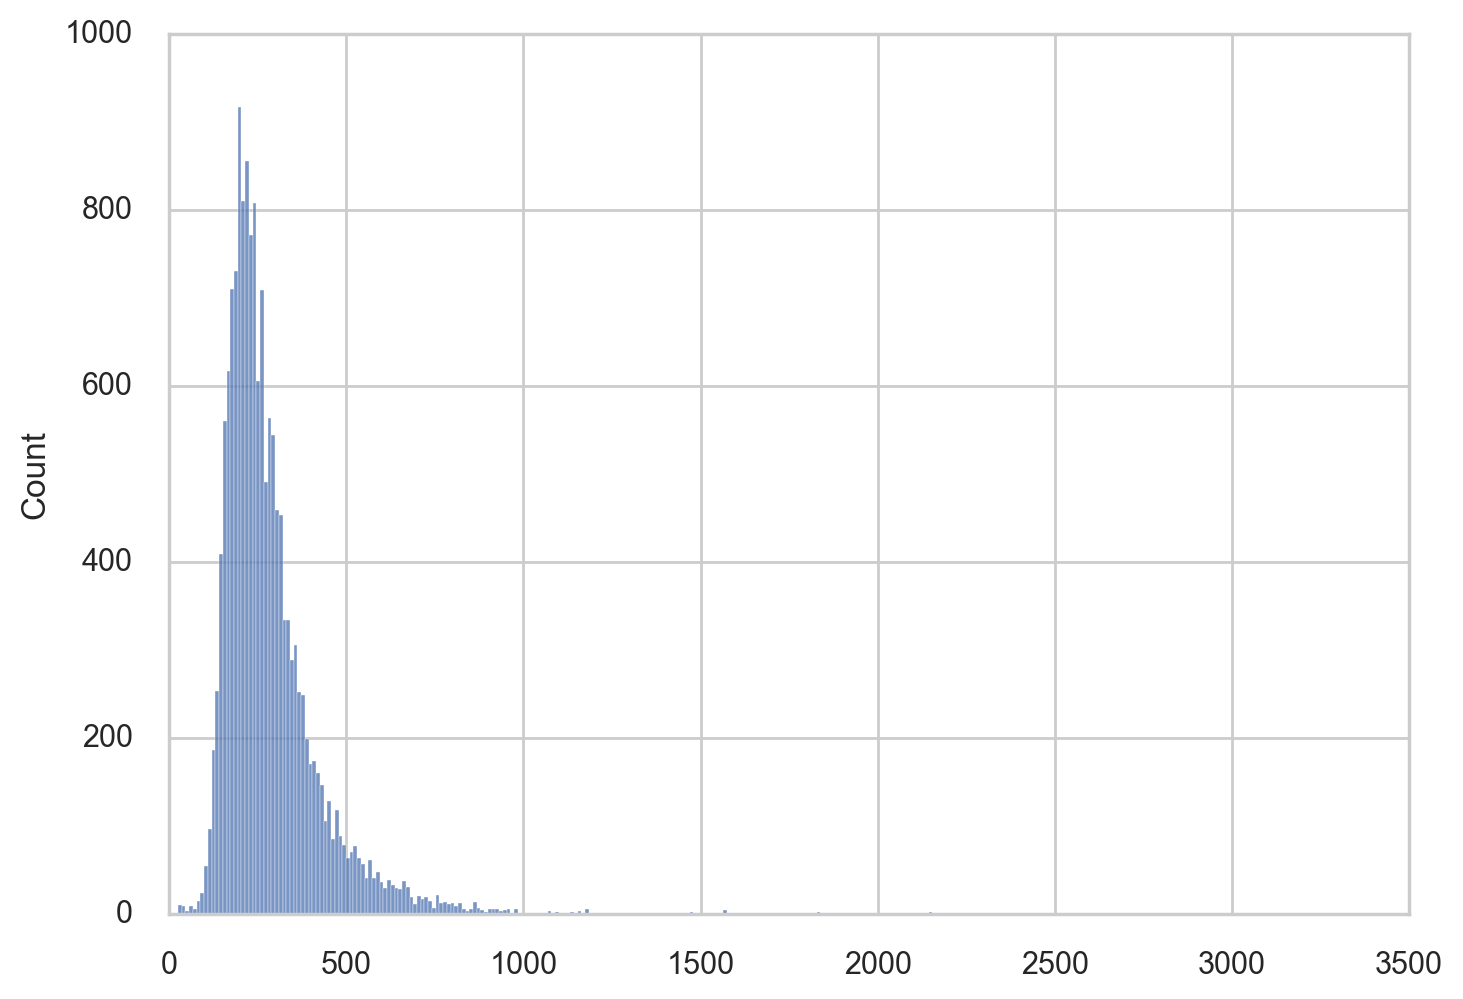

In [ ]:
lengths = []
for i in X_train_sequences:
  lengths.append(len(i))
sns.histplot(lengths)

In [ ]:
y_train_cat = pd.get_dummies(y_train)
labels = y_train_cat.columns
y_train_cat = y_train_cat.values

y_test_cat = pd.get_dummies(y_test)
labels = y_test_cat.columns
y_test_cat = y_test_cat.values

In [ ]:
random_seed = 42
tf.random.set_seed(random_seed)

# create the model
embedding_vecor_length = 100
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

model.add(Bidirectional(LSTM(64, dropout=0.2,return_sequences=True)))
model.add(LSTM(32, dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 300, 100)          100000    
                                                                 
 bidirectional_6 (Bidirectio  (None, 300, 128)         84480     
 nal)                                                            
                                                                 
 lstm_14 (LSTM)              (None, 32)                20608     
                                                                 
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                      

In [ ]:
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_data=(X_test, y_test_cat))
# Final evaluation of the model
scores = model.evaluate(X_test, y_test_cat, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
125/125 [==============================] - 71s 523ms/step - loss: 0.9661 - accuracy: 0.5316 - val_loss: 0.8733 - val_accuracy: 0.5840
Epoch 2/10
125/125 [==============================] - 62s 499ms/step - loss: 0.8820 - accuracy: 0.5717 - val_loss: 0.8738 - val_accuracy: 0.5710
Epoch 3/10
125/125 [==============================] - 62s 497ms/step - loss: 0.8492 - accuracy: 0.5914 - val_loss: 0.8411 - val_accuracy: 0.6115
Epoch 4/10
125/125 [==============================] - 60s 478ms/step - loss: 0.8131 - accuracy: 0.6202 - val_loss: 0.8368 - val_accuracy: 0.6275
Epoch 5/10
125/125 [==============================] - 60s 477ms/step - loss: 0.7829 - accuracy: 0.6361 - val_loss: 0.8511 - val_accuracy: 0.6025
Epoch 6/10
125/125 [==============================] - 60s 477ms/step - loss: 0.7528 - accuracy: 0.6637 - val_loss: 0.8633 - val_accuracy: 0.6040
Epoch 7/10
125/125 [==============================] - 60s 478ms/step - loss: 0.7110 - accuracy: 0.6908 - val_loss: 0.8846 - val_ac

In [ ]:
# random_seed = 42
# tf.random.set_seed(random_seed)

# # create the model
# embedding_vecor_length = 150
# model = Sequential()
# model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(LSTM(100))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# # model.add(Dense(16, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())

# model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
# # Final evaluation of the model
# scores = model.evaluate(X_test, y_test, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

### BERT + CatBoost Fusion

~13 menit

In [ ]:
!pip install transformers --q
!pip install evaluate --q
!pip install accelerate --q

In [ ]:
X_new = df_13[df_13['set']=='train'].drop(['set','id',"clean_judul_berita","clean_konten_berita"],axis=1).sample(10000)
y = X_new[LABEL].replace({'Negatif':0, 'Netral':1, 'Positif':2})
X_new.drop(LABEL, axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

In [ ]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification
# MODEL_NAME = 'indolem/indobert-base-uncased'
MODEL_NAME = 'ilos-vigil/bigbird-small-indonesian'
model_name = MODEL_NAME
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME,num_labels=3)
train_encodings = tokenizer(X_train.konten_berita.tolist(), truncation=True,return_token_type_ids=True, padding='max_length', max_length=512)
val_encodings = tokenizer(X_test.konten_berita.tolist(), truncation=True, return_token_type_ids=True,padding='max_length', max_length=512)

Some weights of the model checkpoint at ilos-vigil/bigbird-small-indonesian were not used when initializing BigBirdForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BigBirdForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BigBirdForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint 

In [ ]:
import torch

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = MyDataset(train_encodings, y_train.values)
val_dataset = MyDataset(val_encodings, y_test.values)

In [ ]:
import evaluate
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return acc_metric.compute(predictions=predictions, references=labels, average="weighted")

f1_metric = evaluate.load("f1", average="weighted")
acc_metric = evaluate.load("accuracy")
clf_metrics = evaluate.combine(["accuracy", f1_metric])

In [ ]:
from transformers import (
    BigBirdTokenizerFast,
    BigBirdForSequenceClassification,
    DataCollatorWithPadding,
    TrainingArguments,
    Trainer
)
tokenizer = BigBirdTokenizerFast.from_pretrained(MODEL_NAME)
model = BigBirdForSequenceClassification.from_pretrained(MODEL_NAME)

Some weights of the model checkpoint at ilos-vigil/bigbird-small-indonesian were not used when initializing BigBirdForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BigBirdForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BigBirdForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint 

In [ ]:
from transformers import Trainer, TrainingArguments
from multiprocessing import cpu_count

SEED = 42
EPOCH = 10
BATCH_SIZE = 8
LEARNING_RATE = 1e-5
CHECKPOINT_DIR = f'checkpoint-{MODEL_NAME}'

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
training_args = TrainingArguments(
    # checkpoint
    output_dir=CHECKPOINT_DIR,
    save_strategy='epoch',
    save_total_limit=EPOCH,
    logging_strategy='steps',
    logging_first_step=True,
    logging_steps=50,
    # train
    num_train_epochs=EPOCH,
    per_device_train_batch_size=BATCH_SIZE,
    learning_rate=LEARNING_RATE,
    dataloader_num_workers=cpu_count(),
    # misc.
    evaluation_strategy='epoch',
    seed=SEED,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics = compute_metrics,
)

trainer.train()

***** Running training *****
  Num examples = 8000
  Num Epochs = 10
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 10000
  Number of trainable parameters = 30595074


  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
def preprocess_function(examples, tokenizer):
    return tokenizer(
        examples['narasi'], examples['judul'],
        truncation=True, return_token_type_ids=True,
        padding='max_length', max_length=512
    )

def test_predict(data):

    tokenized_data = data.map(
        preprocess_function,
        batched=True,
        load_from_cache_file=True,
        num_proc=1,
        remove_columns=['narasi', 'judul'],  # all except 'label'
        fn_kwargs={'tokenizer': tokenizer}
    )

    test_result = trainer.predict(tokenized_data['train'])
    return test_result

In [ ]:
from datasets import Dataset, DatasetDict

# Combine the lists into a dictionary with the appropriate keys
data_dict = {
    "narasi": X_test.narasi.values.tolist(),
    "judul": X_test.judul.values.tolist(),
    "label": [0] * len(X_test.narasi.values.tolist())
}

# Create a Dataset object from the dictionary
dataset = Dataset.from_dict(data_dict)

# Create a DatasetDict object with the 'train' split
dataset_dict = DatasetDict({
    'train': dataset
})

In [ ]:
result = test_predict(dataset_dict)

In [ ]:
# Your prediction logits
logits = result[0]

# Apply the softmax function to obtain probabilities
probabilities = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)

print(probabilities)
print(np.argmax(probabilities))

[[0.02611045 0.9738895 ]
 [0.04587982 0.9541202 ]
 [0.01339914 0.9866008 ]
 ...
 [0.02467162 0.9753283 ]
 [0.01732515 0.98267484]
 [0.02185617 0.9781438 ]]
353


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize a list to store accuracy scores for each fold
fold_accuracies = []
fold_predictions = []
fold_true = []
fold_idxs = []

X_copy = X_new.reset_index(drop=True).copy()
y_copy = y.reset_index(drop=True).copy()

# Iterate over the folds
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_copy, y_copy)):
    print(f"Fold {fold_idx + 1}:")

    # Split the data into training and validation sets for the current fold
    X_train, X_test = X_new.loc[train_idx], X_new.loc[val_idx]
    y_train, y_test = y.loc[train_idx], y.loc[val_idx]

    train_encodings = tokenizer(X_train.narasi.tolist(), X_train.judul.tolist(), truncation=True,return_token_type_ids=True, padding='max_length', max_length=512)
    val_encodings = tokenizer(X_test.narasi.tolist(), X_test.judul.tolist(), truncation=True, return_token_type_ids=True,padding='max_length', max_length=512)

    train_dataset = MyDataset(train_encodings, y_train.values)
    val_dataset = MyDataset(val_encodings, y_test.values)

    SEED = 42
    EPOCH = 3
    BATCH_SIZE = 8
    LEARNING_RATE = 1e-5
    CHECKPOINT_DIR = f'checkpoint-{MODEL_NAME}-{fold_idx+1}'

    tokenizer = BigBirdTokenizerFast.from_pretrained(MODEL_NAME)
    model = BigBirdForSequenceClassification.from_pretrained(MODEL_NAME)

    data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
    training_args = TrainingArguments(
        # checkpoint
        output_dir=CHECKPOINT_DIR,
        save_strategy='epoch',
        save_total_limit=EPOCH,
        logging_strategy='steps',
        logging_first_step=True,
        logging_steps=50,
        # train
        num_train_epochs=EPOCH,
        per_device_train_batch_size=BATCH_SIZE,
        learning_rate=LEARNING_RATE,
        dataloader_num_workers=cpu_count(),
        # misc.
        evaluation_strategy='epoch',
        seed=SEED,
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics = compute_metrics,
    )

    trainer.train()

    # Combine the lists into a dictionary with the appropriate keys
    data_dict = {
        "narasi": X_test.narasi.values.tolist(),
        "judul": X_test.judul.values.tolist(),
        "label": [0] * len(X_test.narasi.values.tolist())
    }

    # Create a Dataset object from the dictionary
    dataset = Dataset.from_dict(data_dict)

    # Create a DatasetDict object with the 'train' split
    dataset_dict = DatasetDict({
        'train': dataset
    })

    result = test_predidct(dataset_dict)

    # Your prediction logits
    logits = result[0]

    # Apply the softmax function to obtain probabilities
    probabilities = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)

    preds = np.argmax(probabilities, axis=1)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(y_test, preds)
    fold_accuracies.append(fold_accuracy)

    fold_predictions.extend(preds.tolist())
    fold_true.extend(y_test.values.tolist())
    fold_idxs.extend(val_idx.values.tolist())

    print(f"Accuracy: {fold_accuracy:.2f}")

# Calculate and print the mean and standard deviation of accuracies
mean_accuracy = sum(fold_accuracies) / num_folds
std_accuracy = np.std(fold_accuracies)
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")


In [ ]:
X_fusion = X_new.loc[fold_idxs].copy()
X_fusion = X_fusion.drop(['judul','narasi'],axis=1)
X_fusion['fusion'] = fold_predictions
y_fusion = fold_true.copy()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Initialize CatBoostClassifier
model = CatBoostClassifier(cat_features=X_fusion.select_dtypes('object').columns.tolist()+['year','no_topic'],
                           random_state=42, verbose=0)

X_train, X_test, y_train, y_test = train_test_split(X_fusion, y_fusion, test_size=0.2, random_state=42)

# Fit the model on the Bag of Words training data
model.fit(X_train, y_train)

# Predict on the Bag of Words test data
y_pred = model.predict(X_test)

# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9039


## Fusion LSTM + CatBoost

In [ ]:
df_13 = pd.read_csv("df_13.csv")

In [ ]:
train = df_13[df_13['set']=='train']
test = df_13[df_13['set']=='test']

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

max_features = 2000
max_length = 300

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df_13['clean_konten_berita'].values)
X = tokenizer.texts_to_sequences(train['clean_konten_berita'].values)
X = pad_sequences(X, padding='post', maxlen=max_length)

def onehot_encoder(label):
  if label == "Positif":
    return [1, 0, 0]
  elif label == "Negatif":
    return [0, 1, 0]
  else:
    return [0, 0, 1]

y = train['sentimen_berita'].progress_apply(onehot_encoder)
y = y.tolist()
y = np.array(y)

  0%|          | 0/52889 [00:00<?, ?it/s]

In [ ]:
test_tokenize = tokenizer.texts_to_sequences(test['clean_konten_berita'].values)
test_tokenize = pad_sequences(test_tokenize, padding='post', maxlen=max_length)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Model

num_folds = 3
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize a list to store accuracy scores for each fold
fold_accuracies = []
fold_predictions = []
fold_true = []
fold_idxs = []
test_predictions = []

X_copy = X.copy()
y_copy = y.copy()

max_features = 2000
max_length = 300
num_output= 3
embed_dim = 150

# Iterate over the folds
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_copy, y_copy)):

        print(f"Fold {fold_idx + 1}:")

        # Split the data into training and validation sets for the current fold
        X_train, X_test = X_copy[train_idx], X_copy[val_idx]
        y_train, y_test = y_copy[train_idx], y_copy[val_idx]

        model = Sequential()
        model.add(Embedding(max_features, embed_dim, input_length=X_copy.shape[1]))
        model.add(Bidirectional(LSTM(256, dropout=0.2,return_sequences=True)))
        model.add(LSTM(128, dropout=0.2))
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(num_output, activation='softmax'))
        batch_size = 32
        model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])

        history = model.fit(X_train, y_train, epochs=7, batch_size=batch_size, validation_data=(X_test, y_test),
                        verbose=1)

        mypreds = model.predict(X_test)
        test_prediction = model.predict(test_tokenize)

        fold_predictions.extend(mypreds.tolist())
        fold_true.extend(y_test.tolist())
        fold_idxs.extend(val_idx.tolist())
        test_predictions.append(test_prediction.tolist())

Fold 1:
Epoch 1/7


2023-09-12 09:41:44.512654: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302
2023-09-12 09:41:44.819857: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1102/1102 [==============================] - 89s 73ms/step - loss: 0.9850 - accuracy: 0.5245 - val_loss: 0.9895 - val_accuracy: 0.5268
Epoch 2/7
1102/1102 [==============================] - 114s 103ms/step - loss: 0.9280 - accuracy: 0.5535 - val_loss: 0.8424 - val_accuracy: 0.6015
Epoch 3/7
1102/1102 [==============================] - 136s 123ms/step - loss: 0.8039 - accuracy: 0.6257 - val_loss: 0.7784 - val_accuracy: 0.6431
Epoch 4/7
1102/1102 [==============================] - 136s 123ms/step - loss: 0.7445 - accuracy: 0.6626 - val_loss: 0.7430 - val_accuracy: 0.6618
Epoch 5/7
1102/1102 [==============================] - 135s 123ms/step - loss: 0.7040 - accuracy: 0.6885 - val_loss: 0.7530 - val_accuracy: 0.6635
Epoch 6/7
1102/1102 [==============================] - 135s 122ms/step - loss: 0.6630 - accuracy: 0.7121 - val_loss: 0.7220 - val_accuracy: 0.6831
Epoch 7/7
1102/1102 [==============================] - 133s 120ms/step - loss: 0.6228 - accuracy: 0.7388 - val_loss: 0.7233 - val_

In [ ]:
df_13[['prob_0','prob_1','prob_2']] = np.NaN

In [ ]:
df_13.loc[fold_idxs, 'prob_0'] = [i[0] for i in fold_predictions]
df_13.loc[fold_idxs, 'prob_1'] = [i[1] for i in fold_predictions]
df_13.loc[fold_idxs, 'prob_2'] = [i[2] for i in fold_predictions]

In [ ]:
idx_test = df_13[df_13['prob_2'].isnull()].index.tolist()

In [ ]:
mean_preds = np.array(test_predictions).mean(axis=0)

In [ ]:
df_13.loc[idx_test, 'prob_0'] = [i[0] for i in mean_preds.tolist()]
df_13.loc[idx_test, 'prob_1'] = [i[1] for i in mean_preds.tolist()]
df_13.loc[idx_test, 'prob_2'] = [i[2] for i in mean_preds.tolist()]

In [ ]:
# X_train, X_test = X[train_idx], X[val_idx]
# y_train, y_test = y[train_idx], y[val_idx]

# model1 = Sequential()
# model1.add(Embedding(max_features, embed_dim, input_length=X_copy.shape[1]))
# model1.add(Bidirectional(LSTM(256, dropout=0.2,return_sequences=True)))
# model1.add(LSTM(128, dropout=0.2))
# model1.add(Dense(128, activation='relu'))
# model1.add(Dropout(0.5))
# model1.add(Dense(64, activation='relu'))
# model1.add(Dense(num_output, activation='softmax'))
# batch_size = 32
# model1.compile(loss='categorical_crossentropy',
#           optimizer='adam', metrics=['accuracy'])

# history = model1.fit(X_train, y_train, epochs=7, batch_size=batch_size, validation_data=(X_test, y_test),
#                 verbose=1)

In [ ]:
df_13.head()

,id,sumber,kategori,subkategori,katakunci,judul_berita,konten_berita,nama_tokoh,jabatan,organisasi,lokasi,alias,kutipan,sentimen_kutipan,sentimen_berita,set,hari,bulan,clean_konten_berita,clean_judul_berita,num_noun,num_pronoun,num_verb,num_proper_noun,num_adjective,num_adverb,adj,total_characters,total_words,average_word_length,pos_words,neg_words,prob_0,prob_1,prob_2
0,00e3395ef29,Antara,Informasi dan Komunikasi,Informasi dan Komunikasi,laporan keuangan,ASN penyeleweng dana infak Masjid Raya divonis...,Padang (ANTARA) - Oknum Aparatur Sipil Negara ...,rinto,hakim-ketua-yose,NaN,padang sumbar provinsi-sumbar inspektorat-sumb...,dibayar,Menyatakan terdakwa terbukti secara sah dan me...,Negatif,Negatif,train,5,2,padang oknum aparatur sipil negara asn pemprov...,asn seleweng dana infak masjid raya vonis tujuh,225,0,44,0,39,1,sipil raya sah salah lanjut putus adil putus a...,2209.0,359.0,5.155989,101,42,0.007649,0.882687,0.109664
1,019a47ed0bc,Detik,"Pertanian, Kehutanan, dan Perikanan",Kehutanan dan Penebangan Kayu,hasil hutan,10 Alasan MK Kategorikan Ganja Hidroponik seba...,Jakarta -\n\nMahkamah Konstitusi (MK) memasukk...,dengler recommended-methods-for i,NaN,mahkamah-konstitusi-mk mk kbbi-pohonpo-hon-n-1...,jakarta yogyakarta manual,NaN,NaN,Netral,Negatif,train,19,1,jakarta mahkamah konstitusi maka masuk ganja h...,10 alas maka kategori ganja hidroponik pohon k...,406,0,87,9,49,3,mahkamah sesuai cegah rusak tinggi sesuai putu...,4077.0,663.0,5.150830,145,117,0.034653,0.705171,0.260176
2,01eb3258ed4,Antara,Pengadaan Listrik dan Gas,Ketenagalistrikan,listrik pln,Angkasa Pura minta maaf atas mati listrik di ...,Padang (ANTARA) - PT Angkasa Pura II selaku pe...,ikhwan-wahyudi adi-lazuardi,NaN,pt-angkasa-pura-ii pln bim 1,padang sumbar kota-padang kabupaten-padang,NaN,Kami menyampaikan permohonan maaf yang sebesar...,Negatif,Negatif,train,31,3,padang pt angkasa pura ii kelola bandara inter...,angkasa pura maaf mati listrik bandara minangk...,137,0,30,0,17,0,internasional besar penting internasional norm...,1438.0,214.0,5.724299,49,21,0.377505,0.148272,0.474223
3,02319ba7dbc,Okezone,Informasi dan Komunikasi,Informasi dan Komunikasi,jumlah penonton,"Liga 1 2021 Digelar dengan Kehadiran Penonton,...","JAKARTA ‚Äì Direktur Utama PT LIB, Akhmad Hadi...",akhmad-hadian-lukita akhmad akhmad-hadian joko...,direktur-utama-pt-lib presiden,the-jakmania kementerian-pemuda-olahraga-kemen...,indonesia jakarta,NaN,Kajian terus kami lakukan dan itu tidak gampan...,Netral,Negatif,train,7,5,jakarta direktur utama pt lib akhmad had lukit...,liga 1 2021 gelar hadir tonton pt lib gampang,173,0,50,7,29,5,utama mudah gampang sesuai salah rumit sehat t...,1954.0,321.0,5.090343,79,50,0.590895,0.065438,0.343668
4,026dd5917f6,Detik,Informasi dan Komunikasi,Informasi dan Komunikasi,laporan keuangan,"Bill Gates Kuasai Tanah Pertanian, Netizen Ket...",Jakarta -\n\nAda hal baru yang mungkin belum b...,offut gates michael-larson donald-trump-pengha...,NaN,NaN,jakarta amerika-serikat amerika afrika as,NaN,Tak boleh ada seseorang atau perusahaan bisa m...,Negatif,Negatif,train,23,1,jakarta harta bill gates diri microsoft milik ...,bill gates kuasa tanah tani netizen takut,130,1,35,0,16,0,besar takut umum sama besar sabar besar takut ...,1273.0,202.0,5.306931,41,14,0.122899,0.411645,0.465456


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

LABEL = 'sentimen_berita'
X_feat = df_13[df_13['set']=='train'].drop(['set','id','konten_berita','judul_berita'],axis=1).fillna("")
y_feat = X_feat[LABEL].replace({'Negatif':0, 'Netral':1, 'Positif':2})
X_feat.drop(LABEL, axis=1, inplace=True)

text_feat = ['clean_konten_berita','clean_judul_berita']
model = CatBoostClassifier(cat_features=X_feat.select_dtypes('object').columns.drop(text_feat).tolist(),
                           text_features = text_feat,
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_feat, y_feat, test_size=0.2, random_state=42)

# Fit the model on the Bag of Words training data
model.fit(X_train, y_train)

# Predict on the Bag of Words test data
y_pred = model.predict(X_test)

print('2m 38s -- 20K data')
# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.4f}")

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")

Learning rate set to 0.095779
0:	learn: 1.0405087	total: 676ms	remaining: 11m 15s
1:	learn: 0.9932162	total: 1.1s	remaining: 9m 8s
2:	learn: 0.9533794	total: 1.51s	remaining: 8m 22s
3:	learn: 0.9208850	total: 1.82s	remaining: 7m 34s
4:	learn: 0.8959164	total: 2.14s	remaining: 7m 5s
5:	learn: 0.8731687	total: 2.51s	remaining: 6m 55s
6:	learn: 0.8541542	total: 2.85s	remaining: 6m 44s
7:	learn: 0.8375050	total: 3.21s	remaining: 6m 38s
8:	learn: 0.8234676	total: 3.53s	remaining: 6m 28s
9:	learn: 0.8113163	total: 3.89s	remaining: 6m 24s
10:	learn: 0.7998201	total: 4.25s	remaining: 6m 22s
11:	learn: 0.7917300	total: 4.55s	remaining: 6m 15s
12:	learn: 0.7847018	total: 4.84s	remaining: 6m 7s
13:	learn: 0.7606535	total: 5.23s	remaining: 6m 8s
14:	learn: 0.7418104	total: 5.54s	remaining: 6m 3s
15:	learn: 0.7260546	total: 5.82s	remaining: 5m 57s
16:	learn: 0.7123192	total: 6.12s	remaining: 5m 54s
17:	learn: 0.7010419	total: 6.39s	remaining: 5m 48s
18:	learn: 0.6911856	total: 6.6s	remaining: 5m 40

In [ ]:
preds_akhir = model.predict(df_13[df_13['set']=='test'].drop(['set','id','konten_berita','judul_berita','sentimen_berita'],axis=1).fillna(""))
subs = pd.DataFrame({"id":df_13[df_13['set']=='test']['id'].values, "sentimen_berita":preds_akhir.flatten()})
subs['sentimen_berita'] = subs['sentimen_berita'].replace({0:'Negatif', 1:'Netral', 2:'Positif'})
subs.to_csv('test_baseline.csv', index=False)

## Explainability

In [ ]:
!pip install shap --q

In [ ]:
df_13 = pd.read_csv("df_13.csv")

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

X = df_13[df_13['set']=='train'].drop(['set','id',"judul_berita","konten_berita"],axis=1).sample(10000)
y = X[LABEL].replace({'Negatif':0, 'Netral':1, 'Positif':2})
X.drop(LABEL, axis=1, inplace=True)
X = X.fillna("")

text_feat = ['clean_judul_berita', 'clean_konten_berita', 'kutipan']
# 'adj',
# Initialize CatBoostRegressor
model = CatBoostRegressor(cat_features=X.select_dtypes('object').columns.drop(text_feat).tolist(),
                           text_features=text_feat,
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X.fillna(""), y, test_size=0.2, random_state=42)

# Fit the model on the Bag of Words training data
model.fit(X_train, y_train)

# Predict on the Bag of Words test data
y_pred = model.predict(X_test)

print('1m 56s -- 20K data')
# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred.round(), average='macro')
print(f"F1 Score: {f1:.4f}")

acc = accuracy_score(y_test, y_pred.round())
print(f"Accuracy Score: {acc:.4f}")

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

X = df_13[df_13['set']=='train'].drop(['set','id',"judul_berita","konten_berita"],axis=1).sample(10000)
y = X[LABEL].replace({'Negatif':0, 'Netral':1, 'Positif':2})
X.drop(LABEL, axis=1, inplace=True)
X = X.fillna("")

# text_feat = ['clean_judul_berita', 'clean_konten_berita', 'kutipan']
# 'adj',
# Initialize CatBoostRegressor
model1 = CatBoostRegressor(cat_features=X.select_dtypes('object').columns.drop([]).tolist(),
                           text_features=text_feat,
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X.fillna(""), y, test_size=0.2, random_state=42)

# Fit the model1 on the Bag of Words training data
model1.fit(X_train, y_train)

# Predict on the Bag of Words test data
y_pred = model1.predict(X_test)

print('1m 56s -- 20K data')
# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred.round(), average='macro')
print(f"F1 Score: {f1:.4f}")

acc = accuracy_score(y_test, y_pred.round())
print(f"Accuracy Score: {acc:.4f}")

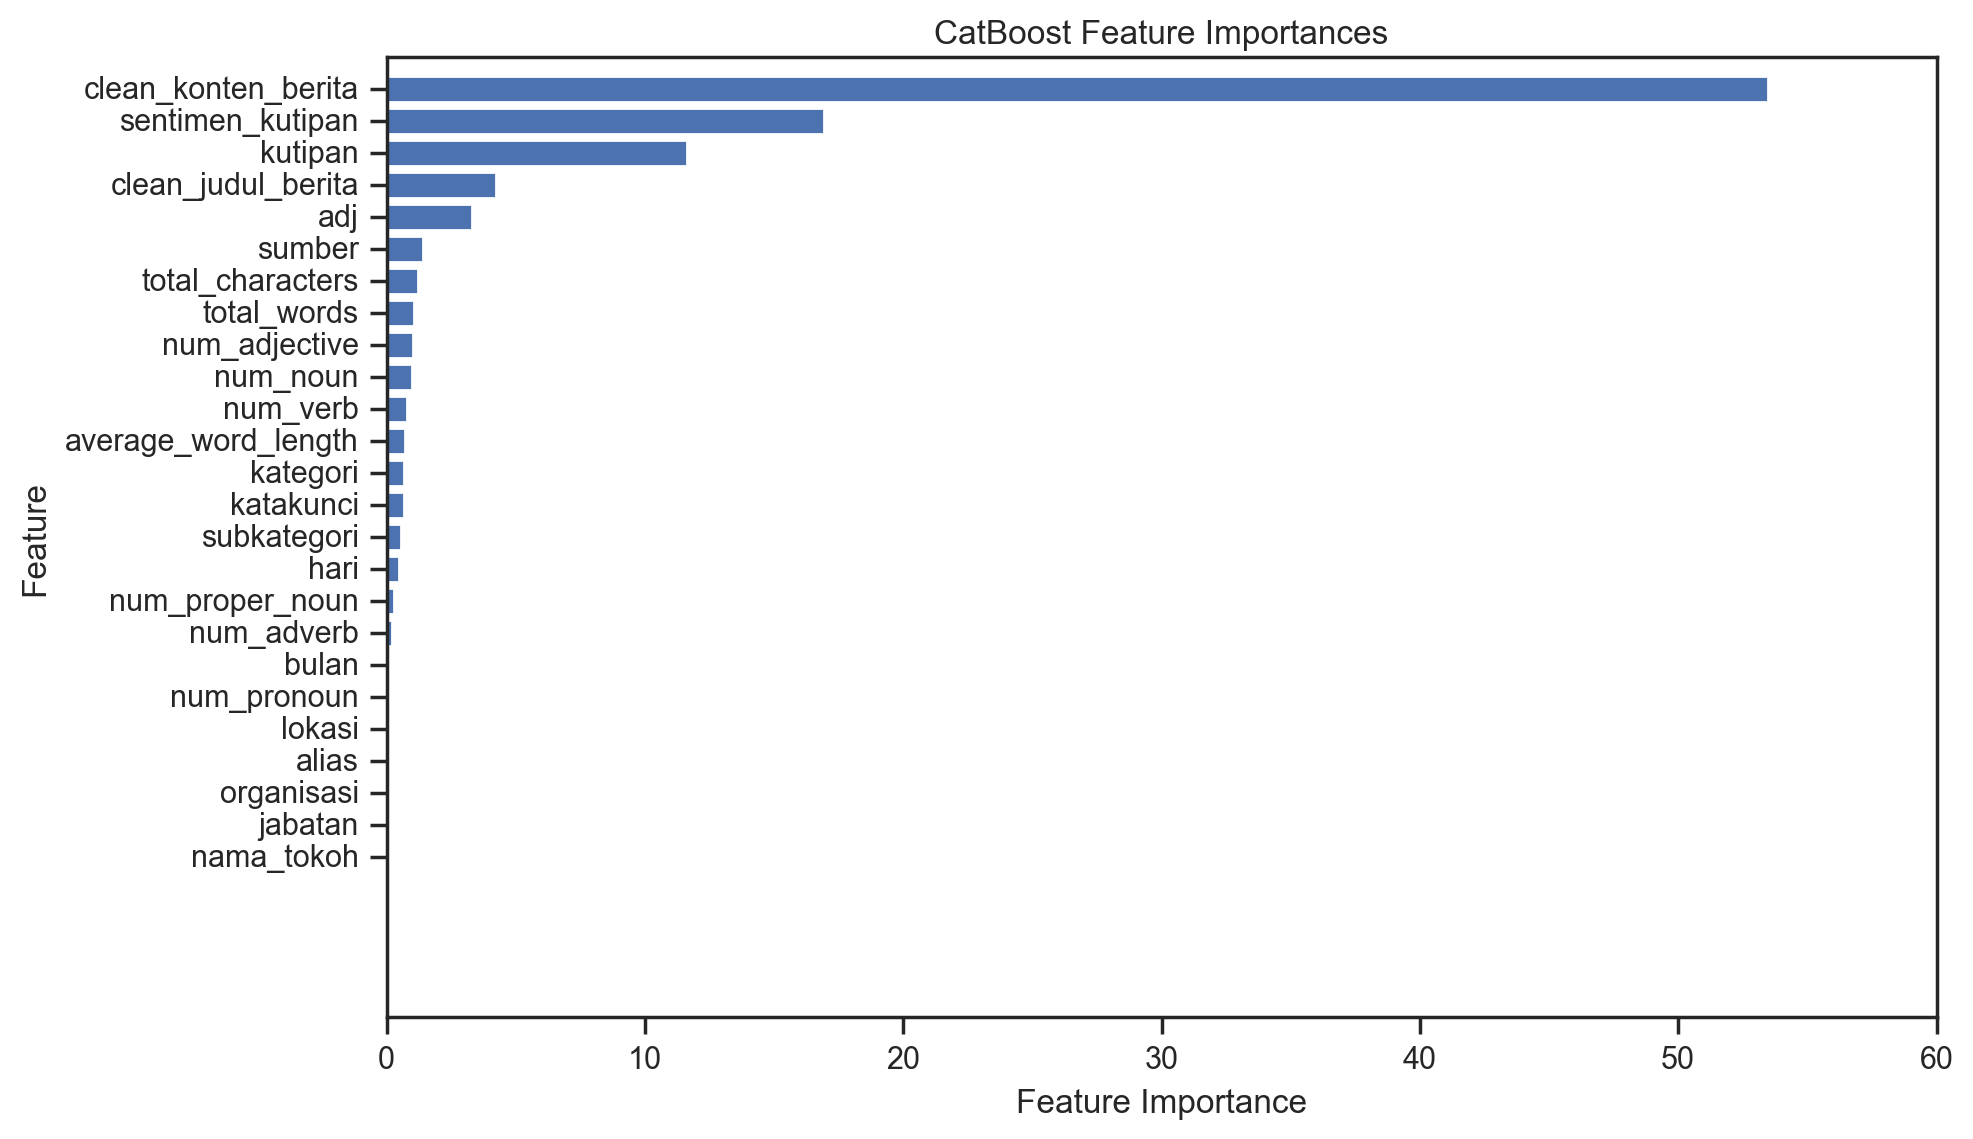

In [ ]:
feature_importances = model.get_feature_importance()
feature_names = X_train.columns
df_impo = pd.DataFrame({'feat':feature_names,'impo':feature_importances})
df_impo = df_impo.sort_values(by='impo')

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), df_impo['impo'], align='center')
plt.yticks(range(len(feature_names)), df_impo['feat'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importances')
plt.show()

In [ ]:
from catboost import Pool
import shap

explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(X)
# Pool(X.fillna(""), y,
#                            cat_features=X.select_dtypes('object').columns.drop(text_feat).tolist(),
#                            text_features=text_feat)

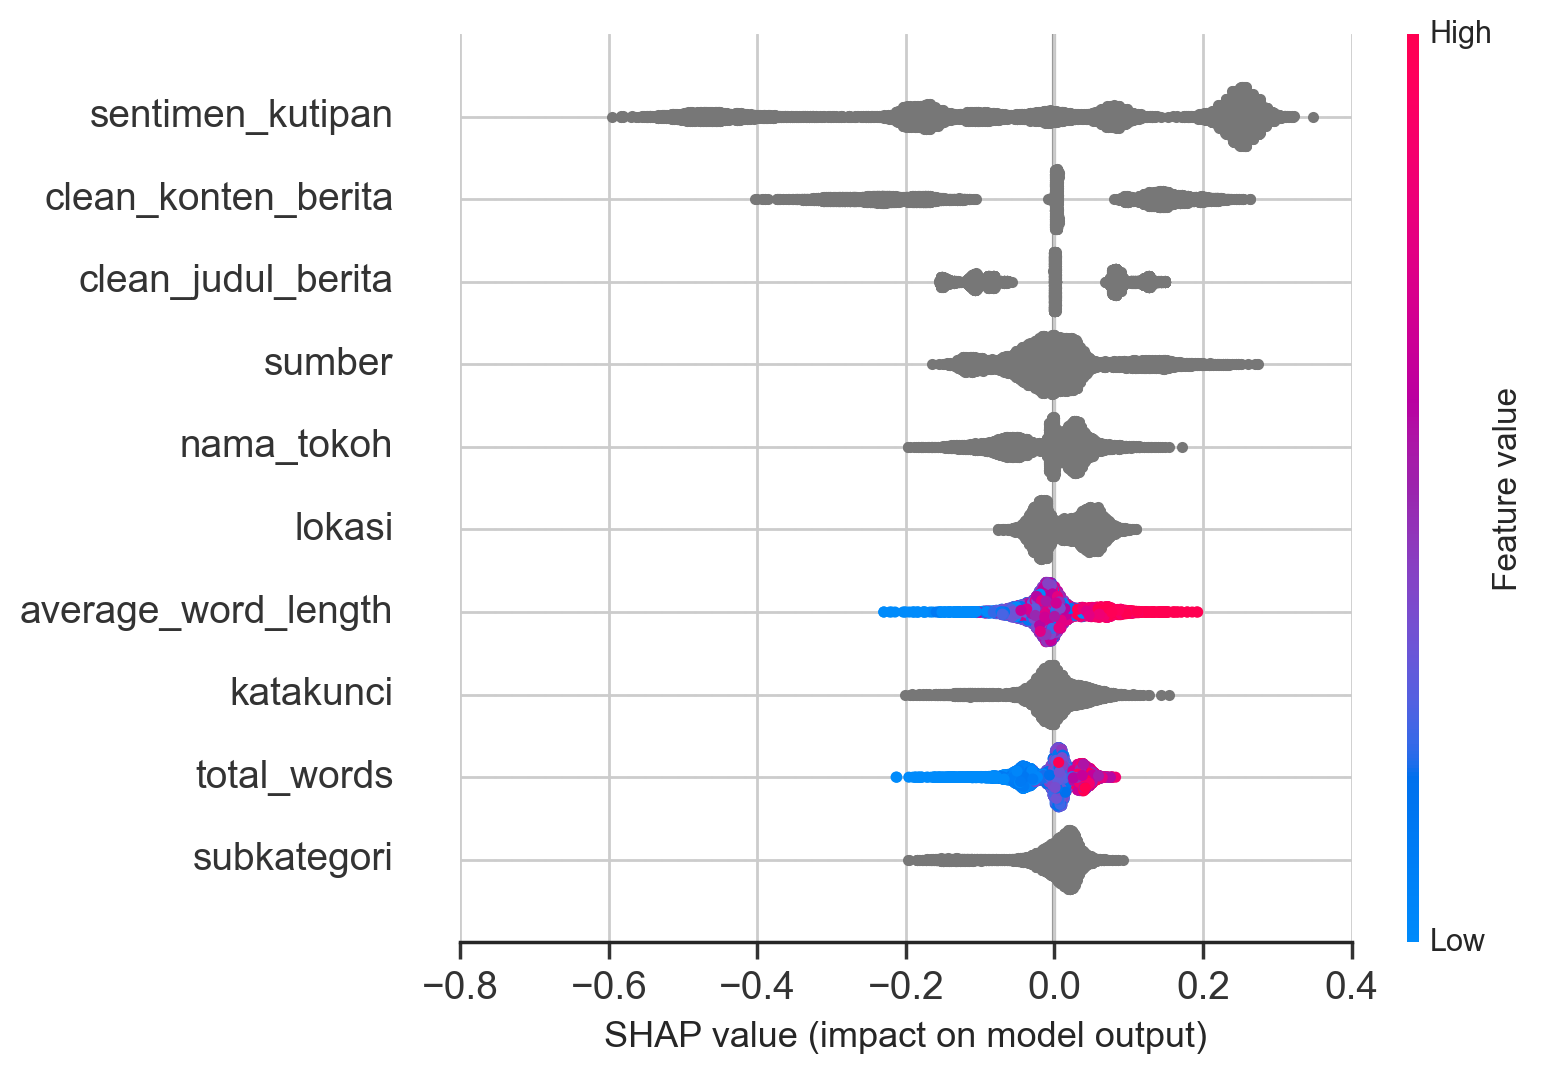

In [ ]:
# Pake yang text feature kalo bisa
fig=plt.gcf()
shap.summary_plot(shap_values, X.fillna(""), max_display=10, show=False, plot_type="dot")
plt.tick_params(axis='both', which='major', labelsize=14)
ax = plt.gca()
ax.grid()
# fig.savefig('shap.pdf')
plt.show()

In [ ]:
sv = explainer(X)

In [ ]:
max_length = 50
for i in range(len(sv[0].data)):
    text = sv[0].data[i]
    if (type(text) == str) & (len(str(text)) > max_length):
        text = text[:max_length] + '...'
        sv[0].data[i] = text

In [ ]:
# temp = X.values[0]
# max_length = 50
# for i in range(len(temp)):
#     text = temp[i]
#     if (type(text) == str) & (len(str(text)) > max_length):
#         text = text[:max_length] + '...'
#         temp[i] = text

In [ ]:
# sv.data = [temp]
# list_name = ['clean_judul_berita','clean_konten_berita','kutipan',
#                     'total_characters','num_adjective']
# sv.feature_names = list_name + ['empty']*(temp.shape[0]-len(list_name))

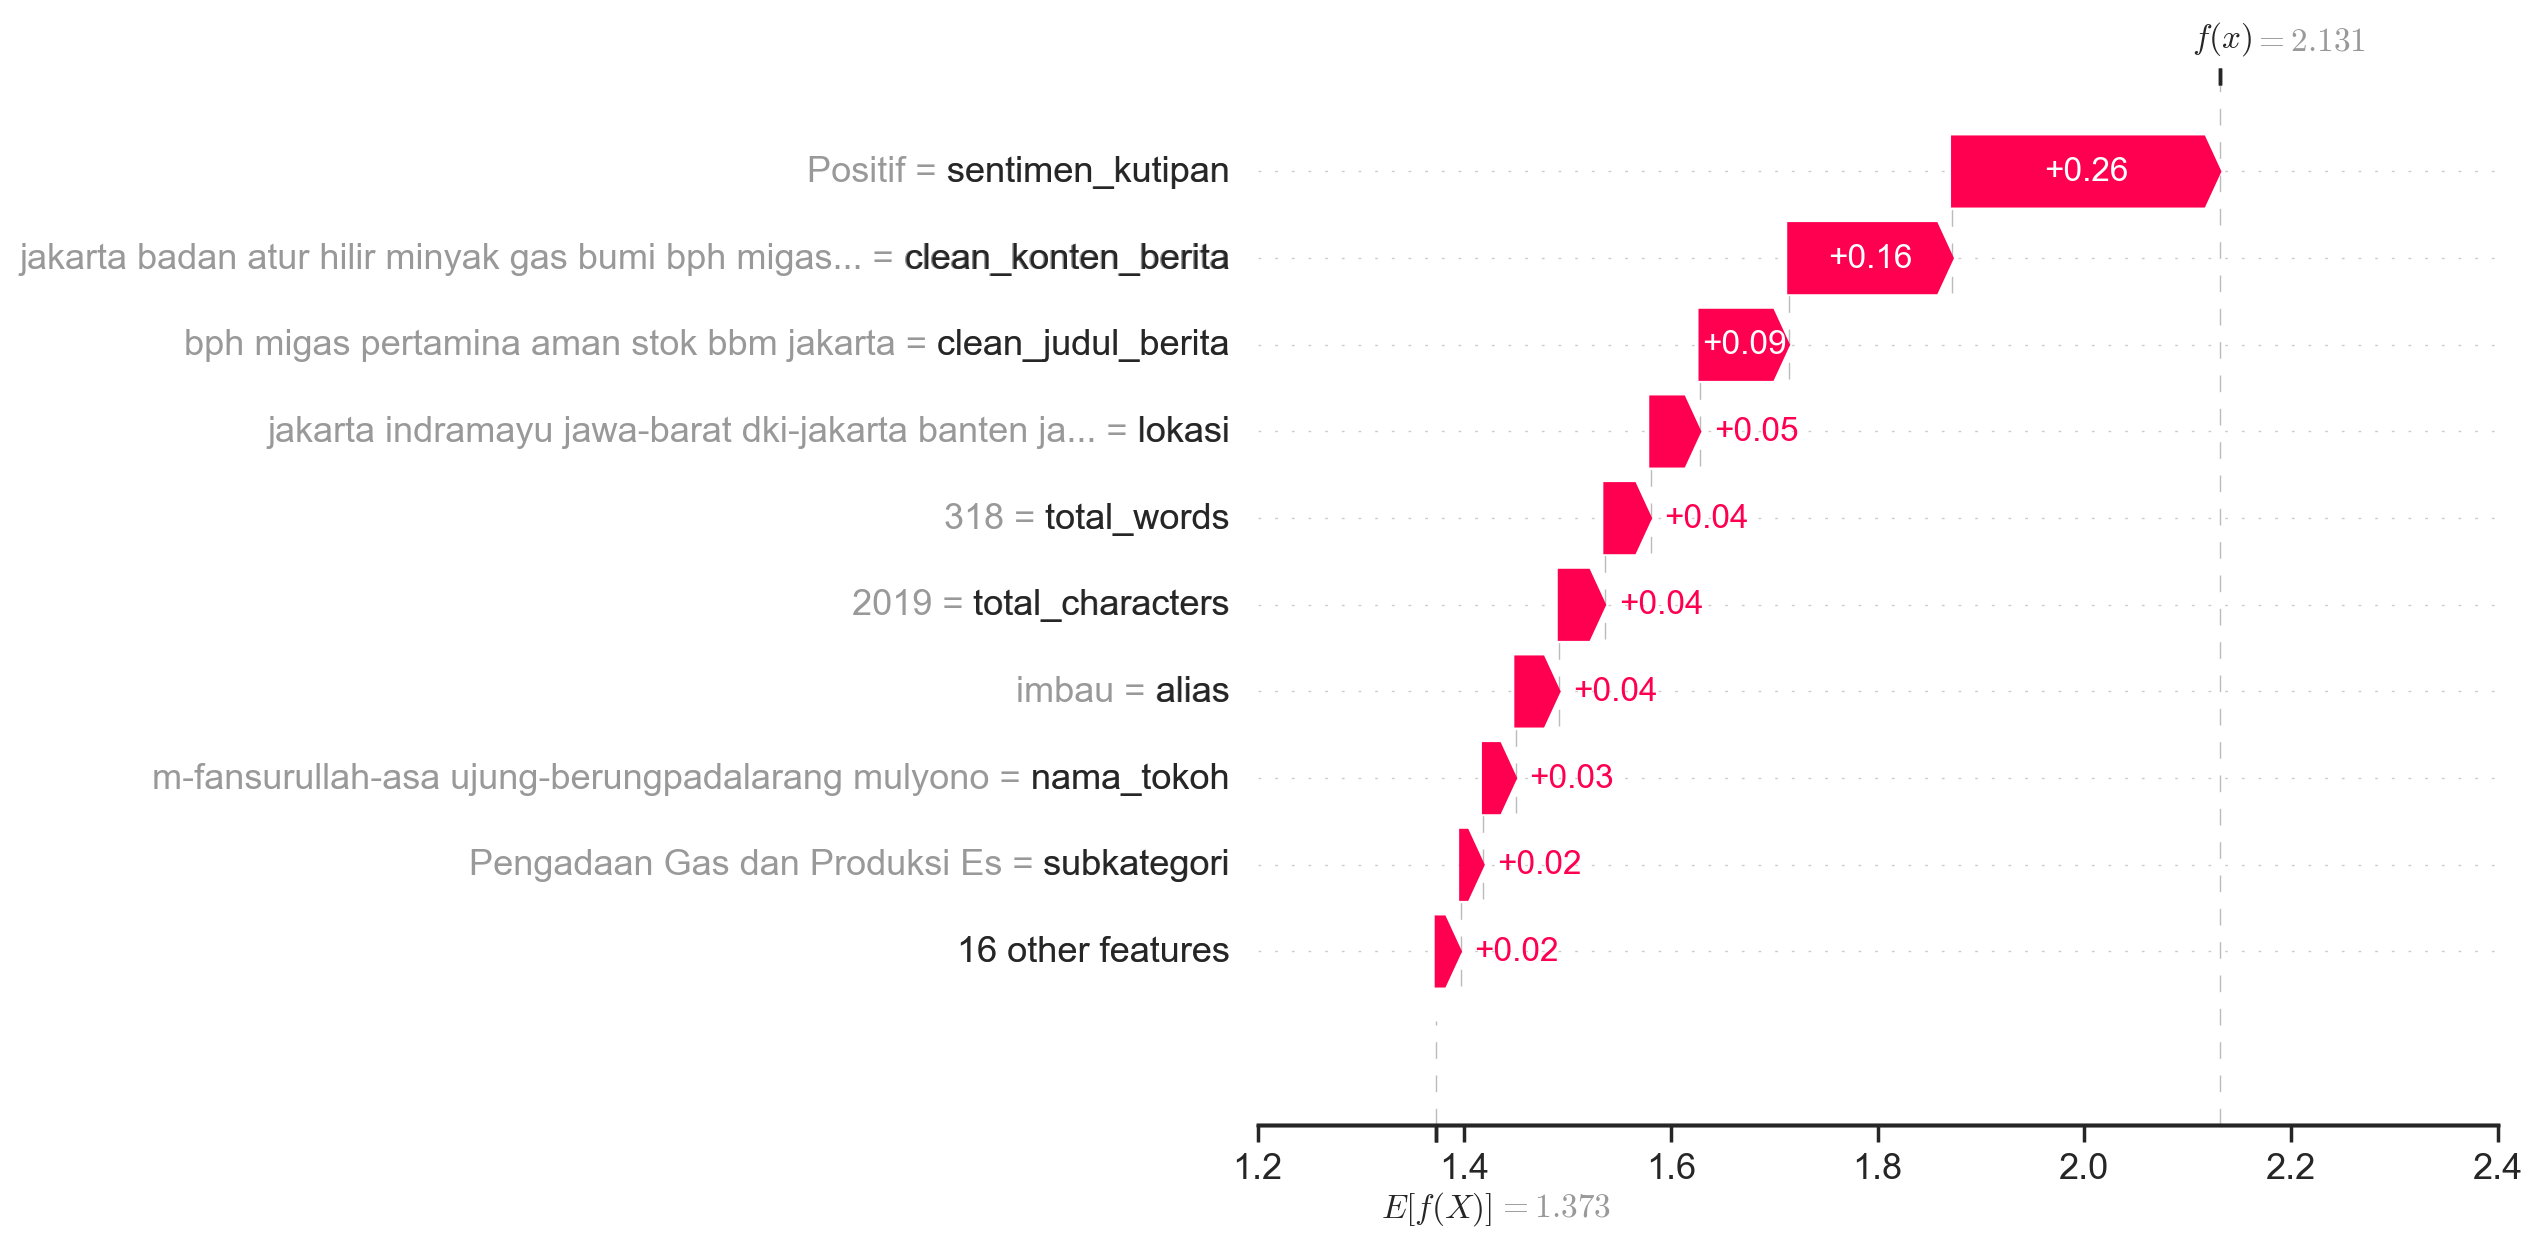

In [ ]:
shap.plots.waterfall(sv[0])

https://colab.research.google.com/drive/1pJ_CYsNKU2Wty4nwqyZ3PTsay-oSdTze#scrollTo=N_l4kKoCeN-W

## Multi Label Classifier

In [ ]:
df_13 = pd.read_csv('df_13.csv')
df_13.head(1)

,id,sumber,kategori,subkategori,katakunci,judul_berita,konten_berita,nama_tokoh,jabatan,organisasi,lokasi,alias,kutipan,sentimen_kutipan,sentimen_berita,set,hari,bulan,clean_konten_berita,clean_judul_berita,num_noun,num_pronoun,num_verb,num_proper_noun,num_adjective,num_adverb,adj,total_characters,total_words,average_word_length
0,00e3395ef29,Antara,Informasi dan Komunikasi,Informasi dan Komunikasi,laporan keuangan,ASN penyeleweng dana infak Masjid Raya divonis...,Padang (ANTARA) - Oknum Aparatur Sipil Negara ...,rinto,hakim-ketua-yose,NaN,padang sumbar provinsi-sumbar inspektorat-sumb...,dibayar,Menyatakan terdakwa terbukti secara sah dan me...,Negatif,Negatif,train,5,2,padang oknum aparatur sipil negara asn pemprov...,asn seleweng dana infak masjid raya vonis tujuh,225,0,44,0,39,1,sipil raya sah salah lanjut putus adil putus a...,2209.0,359.0,5.155989


In [ ]:
def multi_output(x, weight_initializer):
    return tf.keras.layers.Dense(3,
                              activation = 'softmax',
                              kernel_initializer = weight_initializer,
                              bias_initializer = 'zeros',
                              name = 'out_sentimen_berita',
                              kernel_regularizer = tf.keras.regularizers.L1(l1 = 1e-3),
                              bias_regularizer = tf.keras.regularizers.L1(1e-3))(x)

In [ ]:
LEARNING_RATE = 1e-4
EMBEDDING_DIM = 128
RANDOM_STATE = 42

weight_initializer = tf.keras.initializers.GlorotNormal(seed = RANDOM_STATE)

# input dari auxilliary features (fitur NON-TEKS)
aux_input = tf.keras.Input(shape = (X_aux_tr.shape[1],), \
                           name = 'aux_features')
hidden_aux = tf.keras.layers.Dense(16,
                                   activation = 'relu',
                                   kernel_initializer = weight_initializer,
                                   bias_initializer = 'zeros',
                                   kernel_regularizer = tf.keras.regularizers.L1(l1 = 1e-3),
                                   bias_regularizer = tf.keras.regularizers.L1(1e-3))(aux_input)

# input dari text langsung (fitur di-ekstrak secara otomatis oleh arsitektur Deep Learning-nya)
text_input = tf.keras.Input(shape = (1,),
                            dtype = tf.string,
                            name = 'text')
ints = vectorize_layer(text_input)
# + 1 karena TokenVectorizer menambahkan OOV token ke Vocab
embeds = tf.keras.layers.Embedding(VOCAB_SIZE + 1, \
                                   EMBEDDING_DIM, \
                                   trainable = True)(ints)
hidden_out1 = tf.keras.layers.Dropout(0.1)(embeds)
time_distributed_hidden_out = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32,
                                                                                kernel_regularizer = tf.keras.regularizers.L1(l1 = 1e-3),
                                                                                recurrent_regularizer = tf.keras.regularizers.L1(1e-3),
                                                                                return_sequences = True))(hidden_out1)
hidden_out2 = tf.keras.layers.Dense(16,
                                    activation = 'relu',
                                    kernel_initializer = weight_initializer,
                                    bias_initializer = 'zeros',
                                    kernel_regularizer = tf.keras.regularizers.L1(l1 = 1e-3),
                                    bias_regularizer = tf.keras.regularizers.L1(1e-3))(time_distributed_hidden_out)
hidden_text = tf.keras.layers.GlobalAveragePooling1D()(hidden_out2)

# digabung hidden_aux dan hidden_text
concat_features = tf.keras.layers.concatenate([hidden_aux, hidden_text], axis = 1)

output_label1 = multi_output(concat_features, weight_initializer)
output_label2 = multi_output(concat_features, weight_initializer)
output_label3 = multi_output(concat_features, weight_initializer)
# .. sesuaikan dengan jumlah output

model = tf.keras.Model([text_input, aux_input], [output_label1, output_label2, output_label3])